In [16]:
import pandas as pd
import numpy as np
from scipy import stats
import sys
print(sys.version)

3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]


In [17]:
def my_custom_loss_func(y_true, y_pred):
    cm = confusion_matrix(y_true,y_pred)
    print(cm)
    tn, fp, fn, tp = cm.ravel()
    score = ((-25)*fp + (-5)*fn + 5*tp) / len(y_true)
    return (score)

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer




from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

def normalization(train):
    feature_scaler = MinMaxScaler()
    X_scaled = pd.DataFrame(feature_scaler.fit_transform(train.values), columns=train.columns, index=train.index)
    return X_scaled


In [1]:
#!pip install keras
#!pip install tensorflow

from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



train_pure= normalization(pd.read_csv('train.csv',sep=',',index_col=0))

col=train_pure.columns

fraud_train=  train_pure[train_pure['fraud']==1]

x_pure= fraud_train.drop('fraud',axis=1)


x_train= normalization(x_pure)

Using TensorFlow backend.


NameError: name 'normalization' is not defined

In [20]:
x_train.shape

(104, 20)

In [21]:
import GAN_171103

# For reloading after making changes
import importlib
importlib.reload(GAN_171103) 
from GAN_171103 import *

In [26]:
rand_dim = x_train.shape[1] # 32 # needs to be ~data_dim
base_n_count = 128 # 128

nb_steps = 500 + 1 # 50000 # Add one for logging of the last interval
batch_size = 128 # 64

k_d = 1  # number of critic network updates per adversarial training step
k_g = 1  # number of generator network updates per adversarial training step
critic_pre_train_steps = 100 # 100  # number of steps to pre-train the critic before starting adversarial training
log_interval = 100 # 100  # interval (in steps) at which to log loss summaries and save plots of image samples to disc
learning_rate = 5e-4 # 5e-5
data_dir = 'cache/'
generator_model_path, discriminator_model_path, loss_pickle_path = None, None, None

# show = False
show = True 

# train = create_toy_spiral_df(1000)
# train = create_toy_df(n=1000,n_dim=2,n_classes=4,seed=0)
train = train_pure.copy().reset_index(drop=True) # fraud only with labels from classification


# train = pd.get_dummies(train, columns=['Class'], prefix='Class', drop_first=True)
label_cols = [ i for i in train.columns if 'fraud' in i ]
data_cols = [ i for i in train.columns if i not in label_cols ]
train[ data_cols ] = train[ data_cols ] / 10 # scale to random noise size, one less thing to learn
train_no_label = train[ data_cols ]
train_no_label

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,scannedLineItems,pricePerScannedLineItem,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro
0,0.08,0.057518,0.054717,0.063636,0.00,0.06,0.000405,0.000137,0.002194,9.655172e-02,0.001972,0.000000,0.002069,0.000221,0.000000,0.000142,1.306336e-05,0.000013,0.000000,0.000082
1,0.04,0.005796,0.027364,0.045455,0.02,0.08,0.001936,0.000669,0.003247,4.482759e-02,0.002044,0.001429,0.005714,0.001543,0.000412,0.001852,2.661889e-06,0.000018,0.000009,0.000219
2,0.04,0.082777,0.062181,0.027273,0.10,0.10,0.000120,0.000108,0.002098,4.137931e-02,0.005002,0.007692,0.007692,0.000066,0.000147,0.000165,1.653922e-05,0.000005,0.000020,0.000121
3,0.10,0.097813,0.092346,0.072727,0.04,0.08,0.000235,0.000136,0.002508,9.655172e-02,0.003329,0.001379,0.002759,0.000149,0.000050,0.000112,1.315384e-05,0.000009,0.000005,0.000065
4,0.08,0.023401,0.081561,0.027273,0.07,0.04,0.000934,0.000501,0.001010,8.965517e-02,0.003158,0.002593,0.001481,0.000233,0.000362,0.000233,3.562612e-06,0.000004,0.000011,0.000037
5,0.00,0.041990,0.011086,0.100000,0.05,0.04,0.000498,0.000038,0.003846,8.620690e-02,0.000445,0.001923,0.001538,0.000476,0.000144,0.000130,4.711848e-05,0.000099,0.000056,0.000271
6,0.04,0.015965,0.055648,0.018182,0.07,0.02,0.000553,0.000500,0.001653,3.448276e-02,0.005290,0.006364,0.001818,0.000227,0.000529,0.000170,3.569934e-06,0.000004,0.000016,0.000027
7,0.02,0.084363,0.022801,0.000000,0.08,0.08,0.000089,0.000039,0.000000,3.103448e-02,0.002384,0.008000,0.008000,0.000000,0.000115,0.000129,4.598558e-05,0.000000,0.000044,0.000263
8,0.10,0.052488,0.065463,0.063636,0.00,0.04,0.000413,0.000180,0.002357,8.965517e-02,0.002535,0.000000,0.001481,0.000243,0.000000,0.000104,9.962040e-06,0.000011,0.000000,0.000046
9,0.02,0.039530,0.041091,0.090909,0.02,0.08,0.000550,0.000150,0.003367,8.965517e-02,0.001591,0.000741,0.002963,0.000460,0.000061,0.000276,1.196340e-05,0.000024,0.000006,0.000146


data_dim:  20
data_cols:  ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition', 'scannedLineItems', 'pricePerScannedLineItem', 'scansWithoutRegistrationPerScannedLineItem', 'quantityModificationsPerScannedLineItem', 'lineItemVoidsPerSecond', 'scansWithoutRegistrationPerSecond', 'quantityModificationsPerSecond', 'secondsPerEuro', 'lineItemVoidsPerEuro', 'scansWithoutRegistrationPerEuro', 'quantityModificationsPerEuro']
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 20)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 128)               2688      
_________________________________________________________________
dense_58 (Dense)             (None, 

C:\Users\ahuem\Anaconda3\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Step: 0 of 501.
Losses: G, D Gen, D Real, Xgb: 0.6775, 0.7347, 0.6887, 1.0000
D Real - D Gen: -0.0461


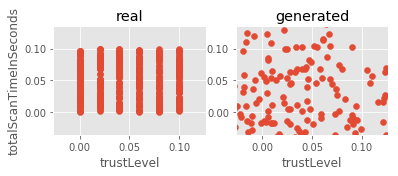

Step: 100 of 501.
Losses: G, D Gen, D Real, Xgb: 0.6889, 0.7093, 0.6660, 0.9878
D Real - D Gen: -0.0433


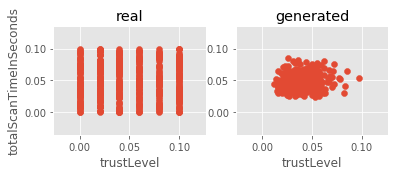

Step: 200 of 501.
Losses: G, D Gen, D Real, Xgb: 0.7485, 0.6876, 0.6556, 0.9980
D Real - D Gen: -0.0320


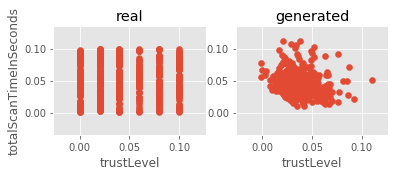

Step: 300 of 501.
Losses: G, D Gen, D Real, Xgb: 0.7127, 0.7180, 0.6702, 0.9939
D Real - D Gen: -0.0477


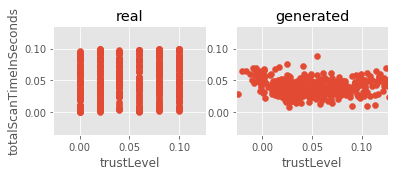

Step: 400 of 501.
Losses: G, D Gen, D Real, Xgb: 0.7285, 0.7111, 0.6027, 1.0000
D Real - D Gen: -0.1084


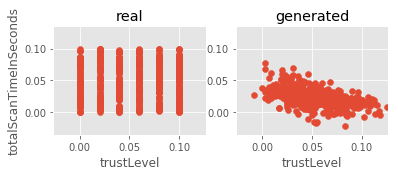

Step: 500 of 501.
Losses: G, D Gen, D Real, Xgb: 0.6603, 0.7868, 0.6798, 0.9858
D Real - D Gen: -0.1070


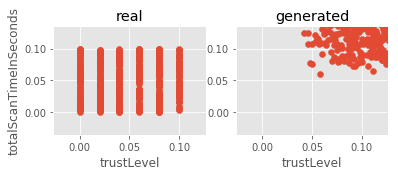

In [27]:
k_d = 1  # number of critic network updates per adversarial training step
learning_rate = 5e-4 # 5e-5
arguments = [rand_dim, nb_steps, batch_size, 
             k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
            data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

adversarial_training_GAN(arguments, train_no_label, data_cols ) # GAN

In [29]:
# Let's look at some of the generated data
# First create the networks locally and load the weights

import GAN_171103
import importlib
importlib.reload(GAN_171103) # For reloading after making changes
from GAN_171103 import *

seed = 17

train = fraud_train.copy().reset_index(drop=True) # fraud only with labels from classification

# train = pd.get_dummies(train, columns=['Class'], prefix='Class', drop_first=True)
label_cols = [ i for i in train.columns if 'fraud' in i ]
data_cols = [ i for i in train.columns if i not in label_cols ]
train[ data_cols ] = train[ data_cols ] / 10 # scale to random noise size, one less thing to learn
train_no_label = train[ data_cols ]

data_dim = len(data_cols)
label_dim = len(label_cols)
with_class = False
if label_dim > 0: with_class = True
np.random.seed(seed)

# define network models

# generator_model, discriminator_model, combined_model = define_models_CGAN(rand_dim, data_dim, label_dim, base_n_count, type='Wasserstein')
# generator_model.load_weights('cache/WCGAN_generator_model_weights_step_4800.h5')
#generator_model, discriminator_model, combined_model = define_models_CGAN(rand_dim, data_dim, label_dim, base_n_count)
#generator_model.load_weights('cache/CGAN_generator_model_weights_step_500.h5')


# with_class = False
# train = train_no_label
# label_cols = []
# # generator_model, discriminator_model, combined_model = define_models_GAN(rand_dim, data_dim, base_n_count, type='Wasserstein')
# # generator_model.load_weights('cache/WGAN_generator_model_weights_step_4800.h5')

generator_model, discriminator_model, combined_model = define_models_GAN(rand_dim, data_dim, base_n_count)
generator_model.load_weights('cache/GAN_generator_model_weights_step_500.h5')

In [30]:
# Now generate some new data

test_size = 492 # Equal to all of the fraud cases

x = train_pure
z = np.random.normal(size=(test_size, rand_dim))
labels = x.iloc[:,-label_dim]
g_z = generator_model.predict([z])


In [31]:
g_z.shape
train_fake = pd.DataFrame(data=g_z,columns= col.drop('fraud'))
train_fake['fraud']= 1.0

cols= col.tolist()
cols.remove('fraud')
cols.append('fraud')
train_pure= train_pure[cols]

In [32]:
concat =np.concatenate((train_pure,train_fake)) 
train_fake = pd.DataFrame(data=concat,columns=cols)

x_pure= train_fake.drop('fraud',axis=1)
y_pure= train_fake['fraud']

x_train, x_holdout, y_train, y_holdout = train_test_split(x_pure, y_pure, test_size=0.2, random_state=324)
col

Index(['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids',
       'scansWithoutRegistration', 'quantityModifications',
       'scannedLineItemsPerSecond', 'valuePerSecond',
       'lineItemVoidsPerPosition', 'fraud', 'scannedLineItems',
       'pricePerScannedLineItem', 'scansWithoutRegistrationPerScannedLineItem',
       'quantityModificationsPerScannedLineItem', 'lineItemVoidsPerSecond',
       'scansWithoutRegistrationPerSecond', 'quantityModificationsPerSecond',
       'secondsPerEuro', 'lineItemVoidsPerEuro',
       'scansWithoutRegistrationPerEuro', 'quantityModificationsPerEuro'],
      dtype='object')

In [33]:
train_fake

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,scannedLineItems,...,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro,fraud
0,0.800000,0.575178,0.547174,0.636364,0.000000,0.600000,0.004045,0.001370,0.021944,9.655172e-01,...,0.000000,0.020690,0.002214,0.000000,0.001423,0.000131,0.000128,0.000000,0.000823,0.0
1,0.400000,0.057955,0.273637,0.454545,0.200000,0.800000,0.019364,0.006689,0.032468,4.482759e-01,...,0.014286,0.057143,0.015432,0.004115,0.018519,0.000027,0.000183,0.000091,0.002193,0.0
2,0.400000,0.827775,0.621811,0.272727,1.000000,1.000000,0.001204,0.001083,0.020979,4.137931e-01,...,0.076923,0.076923,0.000660,0.001466,0.001649,0.000165,0.000048,0.000201,0.001207,0.0
3,1.000000,0.978130,0.923462,0.727273,0.400000,0.800000,0.002347,0.001361,0.025078,9.655172e-01,...,0.013793,0.027586,0.001489,0.000496,0.001117,0.000132,0.000087,0.000054,0.000650,0.0
4,0.800000,0.234008,0.815608,0.272727,0.700000,0.400000,0.009337,0.005007,0.010101,8.965517e-01,...,0.025926,0.014815,0.002326,0.003618,0.002326,0.000036,0.000037,0.000107,0.000368,0.0
5,0.000000,0.419902,0.110855,1.000000,0.500000,0.400000,0.004983,0.000380,0.038462,8.620690e-01,...,0.019231,0.015385,0.004762,0.001443,0.001299,0.000471,0.000992,0.000564,0.002705,1.0
6,0.400000,0.159650,0.556478,0.181818,0.700000,0.200000,0.005531,0.004996,0.016529,3.448276e-01,...,0.063636,0.018182,0.002268,0.005291,0.001701,0.000036,0.000036,0.000157,0.000270,0.0
7,0.200000,0.843630,0.228014,0.000000,0.800000,0.800000,0.000889,0.000390,0.000000,3.103448e-01,...,0.080000,0.080000,0.000000,0.001151,0.001294,0.000460,0.000000,0.000439,0.002632,0.0
8,1.000000,0.524877,0.654627,0.636364,0.000000,0.400000,0.004128,0.001796,0.023569,8.965517e-01,...,0.000000,0.014815,0.002426,0.000000,0.001040,0.000100,0.000107,0.000000,0.000458,0.0
9,0.200000,0.395298,0.410905,0.909091,0.200000,0.800000,0.005504,0.001496,0.033670,8.965517e-01,...,0.007407,0.029630,0.004598,0.000613,0.002759,0.000120,0.000243,0.000061,0.001461,0.0


In [34]:
attr_dim= x_holdout.shape[1]
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=attr_dim))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train, y_train, nb_epoch=256, validation_data=(x_holdout, y_holdout),verbose=1)

history.history


C:\Users\ahuem\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 1896 samples, validate on 475 samples
Epoch 1/256
1896/1896 [==============================] - 0s 263us/step - loss: 0.7825 - acc: 0.2242 - val_loss: 0.7324 - val_acc: 0.3263
Epoch 2/256
1896/1896 [==============================] - 0s 19us/step - loss: 0.6904 - acc: 0.4678 - val_loss: 0.6525 - val_acc: 0.5726
Epoch 3/256
1896/1896 [==============================] - 0s 18us/step - loss: 0.6147 - acc: 0.6719 - val_loss: 0.5861 - val_acc: 0.7137
Epoch 4/256
1896/1896 [==============================] - 0s 19us/step - loss: 0.5545 - acc: 0.7431 - val_loss: 0.5353 - val_acc: 0.7389
Epoch 5/256
1896/1896 [==============================] - 0s 19us/step - loss: 0.5091 - acc: 0.7474 - val_loss: 0.4971 - val_acc: 0.7474
Epoch 6/256
1896/1896 [==============================] - 0s 19us/step - loss: 0.4752 - acc: 0.7489 - val_loss: 0.4694 - val_acc: 0.7474
Epoch 7/256
1896/1896 [==============================] - 0s 18us/step - loss: 0.4503 - acc: 0.7489 - val_loss: 0.4487 - val_acc: 0.7474


Epoch 120/256
1896/1896 [==============================] - 0s 18us/step - loss: 0.1703 - acc: 0.9420 - val_loss: 0.1893 - val_acc: 0.9389
Epoch 121/256
1896/1896 [==============================] - 0s 18us/step - loss: 0.1699 - acc: 0.9420 - val_loss: 0.1890 - val_acc: 0.9389
Epoch 122/256
1896/1896 [==============================] - 0s 19us/step - loss: 0.1697 - acc: 0.9420 - val_loss: 0.1887 - val_acc: 0.9389
Epoch 123/256
1896/1896 [==============================] - 0s 19us/step - loss: 0.1694 - acc: 0.9420 - val_loss: 0.1885 - val_acc: 0.9389
Epoch 124/256
1896/1896 [==============================] - 0s 18us/step - loss: 0.1691 - acc: 0.9420 - val_loss: 0.1882 - val_acc: 0.9389
Epoch 125/256
1896/1896 [==============================] - 0s 18us/step - loss: 0.1688 - acc: 0.9409 - val_loss: 0.1880 - val_acc: 0.9389
Epoch 126/256
1896/1896 [==============================] - 0s 18us/step - loss: 0.1684 - acc: 0.9404 - val_loss: 0.1877 - val_acc: 0.9389
Epoch 127/256
1896/1896 [=========

1896/1896 [==============================] - 0s 19us/step - loss: 0.1509 - acc: 0.9399 - val_loss: 0.1721 - val_acc: 0.9305
Epoch 239/256
1896/1896 [==============================] - 0s 19us/step - loss: 0.1508 - acc: 0.9399 - val_loss: 0.1720 - val_acc: 0.9305
Epoch 240/256
1896/1896 [==============================] - 0s 19us/step - loss: 0.1507 - acc: 0.9404 - val_loss: 0.1719 - val_acc: 0.9305
Epoch 241/256
1896/1896 [==============================] - 0s 18us/step - loss: 0.1506 - acc: 0.9404 - val_loss: 0.1718 - val_acc: 0.9347
Epoch 242/256
1896/1896 [==============================] - 0s 18us/step - loss: 0.1506 - acc: 0.9409 - val_loss: 0.1718 - val_acc: 0.9347
Epoch 243/256
1896/1896 [==============================] - 0s 18us/step - loss: 0.1505 - acc: 0.9404 - val_loss: 0.1717 - val_acc: 0.9326
Epoch 244/256
1896/1896 [==============================] - 0s 18us/step - loss: 0.1504 - acc: 0.9404 - val_loss: 0.1717 - val_acc: 0.9347
Epoch 245/256
1896/1896 [=======================

{'val_loss': [0.732397185375816,
  0.6524631650824296,
  0.5860839837475826,
  0.5352711004959909,
  0.4970838963358026,
  0.4694229666810287,
  0.448710655162209,
  0.43275846242904664,
  0.42052241714377153,
  0.41064211312093235,
  0.40149683632348715,
  0.3935134307961715,
  0.3862630524133381,
  0.37918097841112236,
  0.3723223777193772,
  0.3660544150126608,
  0.3602845567778537,
  0.35414934641436524,
  0.3483761754161433,
  0.34243842545308567,
  0.33685298141680264,
  0.3313264001043219,
  0.3265138253412749,
  0.32164801679159466,
  0.31690416310962877,
  0.3122749002356278,
  0.30791404485702517,
  0.30379872830290544,
  0.29972426734472574,
  0.29566957003191896,
  0.2919749726119794,
  0.28854469343235617,
  0.28497343207660475,
  0.2816028645164088,
  0.27817787107668424,
  0.2748054179392363,
  0.2717287822146165,
  0.2687968117312381,
  0.2660387142708427,
  0.26338040333045154,
  0.2605623006193261,
  0.25821722149848936,
  0.25585965752601625,
  0.2535499297945123,
  

In [35]:
y_pred = model.predict(x_holdout).astype(int)

validation_accuracy= my_custom_loss_func(y_holdout,y_pred)
validation_accuracy

[[355   0]
 [120   0]]


-1.263157894736842

In [36]:
from keras.optimizers import Adam
from keras.regularizers import l1_l2
cost=[]
val_cost=[]
num_iters = [50,500]
best_val = -100
regularization_strengths = [1e-1,1e1,1e2, 1e3, 1e4, 1e5]
learning_rates = [1e-2, 1e-3, 1e-4, 1e-5]
for l_rate in learning_rates:
    for r in regularization_strengths:
        for iterations in num_iters:
            reg = l1_l2(l1=r, l2=r)
            model = Sequential()
            model.add(Dense(1, activation='sigmoid', W_regularizer=reg, input_dim=attr_dim))
            opt= Adam(lr=l_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
            model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])
            history=model.fit(x_train, y_train, nb_epoch=iterations,  batch_size=256,validation_data=(x_holdout, y_holdout))
           
            y_pred = model.predict(x_holdout).astype(int)
            validation_cost= my_custom_loss_func(y_holdout,y_pred)
            val_cost.append(validation_cost)
            
            y_pred = model.predict(x_train).astype(int)
            train_cost= my_custom_loss_func(y_train,y_pred)
            cost.append(train_cost)
            
            if validation_cost > best_val:
                best_cost= cost
                best_val_cost = val_cost
                best_history=history
                best_reg=r
                best_iter=iterations
                best_lr=l_rate
                best_val = validation_cost 
                best_model = model


C:\Users\ahuem\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", input_dim=20, kernel_regularizer=<keras.reg...)`
  
C:\Users\ahuem\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1896 samples, validate on 475 samples
Epoch 1/50
1896/1896 [==============================] - 1s 271us/step - loss: 1.4424 - acc: 0.2468 - val_loss: 1.2659 - val_acc: 0.3979
Epoch 2/50
1896/1896 [==============================] - 0s 4us/step - loss: 1.1866 - acc: 0.4947 - val_loss: 1.0636 - val_acc: 0.6716
Epoch 3/50
1896/1896 [==============================] - 0s 3us/step - loss: 1.0038 - acc: 0.6951 - val_loss: 0.9003 - val_acc: 0.7474
Epoch 4/50
1896/1896 [==============================] - 0s 3us/step - loss: 0.8538 - acc: 0.7458 - val_loss: 0.7765 - val_acc: 0.7474
Epoch 5/50
1896/1896 [==============================] - 0s 4us/step - loss: 0.7406 - acc: 0.7489 - val_loss: 0.6931 - val_acc: 0.7474
Epoch 6/50
1896/1896 [==============================] - 0s 4us/step - loss: 0.6667 - acc: 0.7489 - val_loss: 0.6366 - val_acc: 0.7474
Epoch 7/50
1896/1896 [==============================] - 0s 4us/step - loss: 0.6233 - acc: 0.7489 - val_loss: 0.6168 - val_acc: 0.7474
Epoch 8/50
18

1896/1896 [==============================] - 0s 4us/step - loss: 0.5662 - acc: 0.7489 - val_loss: 0.5677 - val_acc: 0.7474
Epoch 71/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5660 - acc: 0.7489 - val_loss: 0.5676 - val_acc: 0.7474
Epoch 72/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5654 - acc: 0.7489 - val_loss: 0.5666 - val_acc: 0.7474
Epoch 73/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5653 - acc: 0.7489 - val_loss: 0.5676 - val_acc: 0.7474
Epoch 74/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5655 - acc: 0.7489 - val_loss: 0.5675 - val_acc: 0.7474
Epoch 75/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5659 - acc: 0.7489 - val_loss: 0.5682 - val_acc: 0.7474
Epoch 76/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5661 - acc: 0.7489 - val_loss: 0.5673 - val_acc: 0.7474
Epoch 77/500
1896/1896 [==============================] - 0s 

Epoch 190/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5659 - acc: 0.7489 - val_loss: 0.5676 - val_acc: 0.7474
Epoch 191/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5660 - acc: 0.7489 - val_loss: 0.5673 - val_acc: 0.7474
Epoch 192/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5663 - acc: 0.7489 - val_loss: 0.5673 - val_acc: 0.7474
Epoch 193/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5656 - acc: 0.7489 - val_loss: 0.5677 - val_acc: 0.7474
Epoch 194/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5657 - acc: 0.7489 - val_loss: 0.5675 - val_acc: 0.7474
Epoch 195/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5658 - acc: 0.7489 - val_loss: 0.5669 - val_acc: 0.7474
Epoch 196/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5653 - acc: 0.7489 - val_loss: 0.5671 - val_acc: 0.7474
Epoch 197/500
1896/1896 [================

Epoch 250/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5660 - acc: 0.7489 - val_loss: 0.5674 - val_acc: 0.7474
Epoch 251/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5659 - acc: 0.7489 - val_loss: 0.5679 - val_acc: 0.7474
Epoch 252/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5660 - acc: 0.7489 - val_loss: 0.5676 - val_acc: 0.7474
Epoch 253/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5658 - acc: 0.7489 - val_loss: 0.5674 - val_acc: 0.7474
Epoch 254/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5658 - acc: 0.7489 - val_loss: 0.5671 - val_acc: 0.7474
Epoch 255/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5655 - acc: 0.7489 - val_loss: 0.5672 - val_acc: 0.7474
Epoch 256/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5659 - acc: 0.7489 - val_loss: 0.5671 - val_acc: 0.7474
Epoch 257/500
1896/1896 [================

Epoch 310/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5658 - acc: 0.7489 - val_loss: 0.5676 - val_acc: 0.7474
Epoch 311/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5656 - acc: 0.7489 - val_loss: 0.5676 - val_acc: 0.7474
Epoch 312/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5658 - acc: 0.7489 - val_loss: 0.5676 - val_acc: 0.7474
Epoch 313/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5656 - acc: 0.7489 - val_loss: 0.5673 - val_acc: 0.7474
Epoch 314/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5653 - acc: 0.7489 - val_loss: 0.5668 - val_acc: 0.7474
Epoch 315/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5656 - acc: 0.7489 - val_loss: 0.5674 - val_acc: 0.7474
Epoch 316/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5657 - acc: 0.7489 - val_loss: 0.5671 - val_acc: 0.7474
Epoch 317/500
1896/1896 [================

Epoch 370/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5661 - acc: 0.7489 - val_loss: 0.5674 - val_acc: 0.7474
Epoch 371/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5658 - acc: 0.7489 - val_loss: 0.5675 - val_acc: 0.7474
Epoch 372/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5658 - acc: 0.7489 - val_loss: 0.5679 - val_acc: 0.7474
Epoch 373/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5659 - acc: 0.7489 - val_loss: 0.5673 - val_acc: 0.7474
Epoch 374/500
1896/1896 [==============================] - 0s 6us/step - loss: 0.5659 - acc: 0.7489 - val_loss: 0.5679 - val_acc: 0.7474
Epoch 375/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5662 - acc: 0.7489 - val_loss: 0.5679 - val_acc: 0.7474
Epoch 376/500
1896/1896 [==============================] - 0s 9us/step - loss: 0.5660 - acc: 0.7489 - val_loss: 0.5676 - val_acc: 0.7474
Epoch 377/500
1896/1896 [================

Epoch 430/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5656 - acc: 0.7489 - val_loss: 0.5670 - val_acc: 0.7474
Epoch 431/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5658 - acc: 0.7489 - val_loss: 0.5682 - val_acc: 0.7474
Epoch 432/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5660 - acc: 0.7489 - val_loss: 0.5678 - val_acc: 0.7474
Epoch 433/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5662 - acc: 0.7489 - val_loss: 0.5675 - val_acc: 0.7474
Epoch 434/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5657 - acc: 0.7489 - val_loss: 0.5673 - val_acc: 0.7474
Epoch 435/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5658 - acc: 0.7489 - val_loss: 0.5678 - val_acc: 0.7474
Epoch 436/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5661 - acc: 0.7489 - val_loss: 0.5675 - val_acc: 0.7474
Epoch 437/500
1896/1896 [================

Epoch 490/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5659 - acc: 0.7489 - val_loss: 0.5678 - val_acc: 0.7474
Epoch 491/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5659 - acc: 0.7489 - val_loss: 0.5673 - val_acc: 0.7474
Epoch 492/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5660 - acc: 0.7489 - val_loss: 0.5682 - val_acc: 0.7474
Epoch 493/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5658 - acc: 0.7489 - val_loss: 0.5673 - val_acc: 0.7474
Epoch 494/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5659 - acc: 0.7489 - val_loss: 0.5673 - val_acc: 0.7474
Epoch 495/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5655 - acc: 0.7489 - val_loss: 0.5673 - val_acc: 0.7474
Epoch 496/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5659 - acc: 0.7489 - val_loss: 0.5681 - val_acc: 0.7474
Epoch 497/500
1896/1896 [================

Epoch 50/50
1896/1896 [==============================] - 0s 3us/step - loss: 0.7874 - acc: 0.7489 - val_loss: 0.7788 - val_acc: 0.7474
[[355   0]
 [120   0]]
[[1420    0]
 [ 476    0]]
Train on 1896 samples, validate on 475 samples
Epoch 1/500
1896/1896 [==============================] - 1s 310us/step - loss: 71.2207 - acc: 0.4757 - val_loss: 57.6198 - val_acc: 0.5116
Epoch 2/500
1896/1896 [==============================] - 0s 4us/step - loss: 49.0531 - acc: 0.5185 - val_loss: 36.9026 - val_acc: 0.5811
Epoch 3/500
1896/1896 [==============================] - 0s 4us/step - loss: 30.4081 - acc: 0.5928 - val_loss: 22.1433 - val_acc: 0.6653
Epoch 4/500
1896/1896 [==============================] - 0s 3us/step - loss: 18.0405 - acc: 0.6967 - val_loss: 13.3607 - val_acc: 0.7474
Epoch 5/500
1896/1896 [==============================] - 0s 3us/step - loss: 11.0988 - acc: 0.7484 - val_loss: 7.4402 - val_acc: 0.7474
Epoch 6/500
1896/1896 [==============================] - 0s 3us/step - loss: 5.213

Epoch 119/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7901 - acc: 0.7489 - val_loss: 0.7675 - val_acc: 0.7474
Epoch 120/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.7975 - acc: 0.7489 - val_loss: 0.7962 - val_acc: 0.7474
Epoch 121/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.7830 - acc: 0.7489 - val_loss: 0.8257 - val_acc: 0.7474
Epoch 122/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7990 - acc: 0.7489 - val_loss: 0.8422 - val_acc: 0.7474
Epoch 123/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.8088 - acc: 0.7489 - val_loss: 0.7541 - val_acc: 0.7474
Epoch 124/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.7806 - acc: 0.7489 - val_loss: 0.8056 - val_acc: 0.7474
Epoch 125/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.8012 - acc: 0.7489 - val_loss: 0.7879 - val_acc: 0.7474
Epoch 126/500
1896/1896 [================

Epoch 179/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.8143 - acc: 0.7489 - val_loss: 0.7850 - val_acc: 0.7474
Epoch 180/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7966 - acc: 0.7489 - val_loss: 0.7732 - val_acc: 0.7474
Epoch 181/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.7894 - acc: 0.7489 - val_loss: 0.8200 - val_acc: 0.7474
Epoch 182/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.7899 - acc: 0.7489 - val_loss: 0.7947 - val_acc: 0.7474
Epoch 183/500
1896/1896 [==============================] - 0s 5us/step - loss: 0.7947 - acc: 0.7489 - val_loss: 0.7830 - val_acc: 0.7474
Epoch 184/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7868 - acc: 0.7489 - val_loss: 0.7688 - val_acc: 0.7474
Epoch 185/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7836 - acc: 0.7489 - val_loss: 0.7869 - val_acc: 0.7474
Epoch 186/500
1896/1896 [================

Epoch 239/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8109 - acc: 0.7489 - val_loss: 0.8402 - val_acc: 0.7474
Epoch 240/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8341 - acc: 0.7489 - val_loss: 0.7798 - val_acc: 0.7474
Epoch 241/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7884 - acc: 0.7489 - val_loss: 0.8389 - val_acc: 0.7474
Epoch 242/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8065 - acc: 0.7489 - val_loss: 0.8096 - val_acc: 0.7474
Epoch 243/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7918 - acc: 0.7489 - val_loss: 0.7756 - val_acc: 0.7474
Epoch 244/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.7967 - acc: 0.7489 - val_loss: 0.8598 - val_acc: 0.7474
Epoch 245/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.8249 - acc: 0.7489 - val_loss: 0.7492 - val_acc: 0.7474
Epoch 246/500
1896/1896 [================

Epoch 299/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.7930 - acc: 0.7489 - val_loss: 0.8055 - val_acc: 0.7474
Epoch 300/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8099 - acc: 0.7489 - val_loss: 0.8006 - val_acc: 0.7474
Epoch 301/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.7821 - acc: 0.7489 - val_loss: 0.8316 - val_acc: 0.7474
Epoch 302/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8152 - acc: 0.7489 - val_loss: 0.8958 - val_acc: 0.7474
Epoch 303/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.8003 - acc: 0.7489 - val_loss: 0.7512 - val_acc: 0.7474
Epoch 304/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.7856 - acc: 0.7489 - val_loss: 0.8164 - val_acc: 0.7474
Epoch 305/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8088 - acc: 0.7489 - val_loss: 0.7838 - val_acc: 0.7474
Epoch 306/500
1896/1896 [================

Epoch 359/500
1896/1896 [==============================] - ETA: 0s - loss: 0.8210 - acc: 0.761 - 0s 3us/step - loss: 0.8211 - acc: 0.7489 - val_loss: 0.8529 - val_acc: 0.7474
Epoch 360/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8001 - acc: 0.7489 - val_loss: 0.7929 - val_acc: 0.7474
Epoch 361/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8149 - acc: 0.7489 - val_loss: 0.8464 - val_acc: 0.7474
Epoch 362/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7923 - acc: 0.7489 - val_loss: 0.7834 - val_acc: 0.7474
Epoch 363/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.7960 - acc: 0.7489 - val_loss: 0.7720 - val_acc: 0.7474
Epoch 364/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.7902 - acc: 0.7489 - val_loss: 0.8110 - val_acc: 0.7474
Epoch 365/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7899 - acc: 0.7489 - val_loss: 0.7946 - val_acc: 0.7474
Epo

Epoch 478/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8217 - acc: 0.7489 - val_loss: 0.7931 - val_acc: 0.7474
Epoch 479/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8134 - acc: 0.7489 - val_loss: 0.8099 - val_acc: 0.7474
Epoch 480/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7937 - acc: 0.7489 - val_loss: 0.7960 - val_acc: 0.7474
Epoch 481/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7936 - acc: 0.7489 - val_loss: 0.7848 - val_acc: 0.7474
Epoch 482/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.7651 - acc: 0.7489 - val_loss: 0.8265 - val_acc: 0.7474
Epoch 483/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.8069 - acc: 0.7489 - val_loss: 0.7765 - val_acc: 0.7474
Epoch 484/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.7942 - acc: 0.7489 - val_loss: 0.8107 - val_acc: 0.7474
Epoch 485/500
1896/1896 [================

1896/1896 [==============================] - 0s 3us/step - loss: 2.9610 - acc: 0.7489 - val_loss: 2.8053 - val_acc: 0.7474
Epoch 47/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.9368 - acc: 0.7489 - val_loss: 2.8448 - val_acc: 0.7474
Epoch 48/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.6276 - acc: 0.7489 - val_loss: 2.9310 - val_acc: 0.7474
Epoch 49/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.9654 - acc: 0.7489 - val_loss: 2.7501 - val_acc: 0.7474
Epoch 50/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.9431 - acc: 0.7489 - val_loss: 3.4084 - val_acc: 0.7474
Epoch 51/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.8985 - acc: 0.7489 - val_loss: 2.8661 - val_acc: 0.7474
Epoch 52/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.6183 - acc: 0.7489 - val_loss: 3.1439 - val_acc: 0.7474
Epoch 53/500
1896/1896 [==============================] - 0s 

Epoch 166/500
1896/1896 [==============================] - 0s 4us/step - loss: 3.1970 - acc: 0.7489 - val_loss: 2.7014 - val_acc: 0.7474
Epoch 167/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.7701 - acc: 0.7489 - val_loss: 3.1997 - val_acc: 0.7474
Epoch 168/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.9742 - acc: 0.7489 - val_loss: 3.0378 - val_acc: 0.7474
Epoch 169/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.9614 - acc: 0.7489 - val_loss: 3.2075 - val_acc: 0.7474
Epoch 170/500
1896/1896 [==============================] - 0s 3us/step - loss: 3.1412 - acc: 0.7489 - val_loss: 3.1358 - val_acc: 0.7474
Epoch 171/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.6869 - acc: 0.7489 - val_loss: 2.8765 - val_acc: 0.7474
Epoch 172/500
1896/1896 [==============================] - 0s 3us/step - loss: 3.0584 - acc: 0.7489 - val_loss: 3.1342 - val_acc: 0.7474
Epoch 173/500
1896/1896 [================

Epoch 226/500
1896/1896 [==============================] - 0s 4us/step - loss: 3.0227 - acc: 0.7489 - val_loss: 3.0209 - val_acc: 0.7474
Epoch 227/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.8743 - acc: 0.7489 - val_loss: 2.9967 - val_acc: 0.7474
Epoch 228/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.8719 - acc: 0.7489 - val_loss: 3.0318 - val_acc: 0.7474
Epoch 229/500
1896/1896 [==============================] - 0s 3us/step - loss: 3.2422 - acc: 0.7489 - val_loss: 2.7454 - val_acc: 0.7474
Epoch 230/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.7934 - acc: 0.7489 - val_loss: 3.0619 - val_acc: 0.7474
Epoch 231/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.9533 - acc: 0.7489 - val_loss: 3.0804 - val_acc: 0.7474
Epoch 232/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.9312 - acc: 0.7489 - val_loss: 3.4002 - val_acc: 0.7474
Epoch 233/500
1896/1896 [================

Epoch 286/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.7587 - acc: 0.7489 - val_loss: 2.8007 - val_acc: 0.7474
Epoch 287/500
1896/1896 [==============================] - 0s 4us/step - loss: 3.0695 - acc: 0.7489 - val_loss: 3.3743 - val_acc: 0.7474
Epoch 288/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.9103 - acc: 0.7489 - val_loss: 3.0848 - val_acc: 0.7474
Epoch 289/500
1896/1896 [==============================] - 0s 4us/step - loss: 3.0657 - acc: 0.7489 - val_loss: 3.0630 - val_acc: 0.7474
Epoch 290/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.8959 - acc: 0.7489 - val_loss: 2.8579 - val_acc: 0.7474
Epoch 291/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.8494 - acc: 0.7489 - val_loss: 3.0718 - val_acc: 0.7474
Epoch 292/500
1896/1896 [==============================] - 0s 4us/step - loss: 3.2105 - acc: 0.7489 - val_loss: 2.9359 - val_acc: 0.7474
Epoch 293/500
1896/1896 [================

Epoch 346/500
1896/1896 [==============================] - 0s 3us/step - loss: 3.0224 - acc: 0.7489 - val_loss: 2.6717 - val_acc: 0.7474
Epoch 347/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.8724 - acc: 0.7489 - val_loss: 3.2066 - val_acc: 0.7474
Epoch 348/500
1896/1896 [==============================] - 0s 3us/step - loss: 3.1209 - acc: 0.7489 - val_loss: 2.9925 - val_acc: 0.7474
Epoch 349/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.8009 - acc: 0.7489 - val_loss: 2.8425 - val_acc: 0.7474
Epoch 350/500
1896/1896 [==============================] - 0s 3us/step - loss: 3.0904 - acc: 0.7489 - val_loss: 3.2353 - val_acc: 0.7474
Epoch 351/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.8871 - acc: 0.7489 - val_loss: 3.1250 - val_acc: 0.7474
Epoch 352/500
1896/1896 [==============================] - 0s 3us/step - loss: 3.0332 - acc: 0.7489 - val_loss: 3.2537 - val_acc: 0.7474
Epoch 353/500
1896/1896 [================

Epoch 406/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.9696 - acc: 0.7489 - val_loss: 3.1170 - val_acc: 0.7474
Epoch 407/500
1896/1896 [==============================] - 0s 3us/step - loss: 3.0724 - acc: 0.7489 - val_loss: 3.2438 - val_acc: 0.7474
Epoch 408/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.8444 - acc: 0.7489 - val_loss: 3.1473 - val_acc: 0.7474
Epoch 409/500
1896/1896 [==============================] - 0s 3us/step - loss: 3.0644 - acc: 0.7489 - val_loss: 2.7134 - val_acc: 0.7474
Epoch 410/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.8928 - acc: 0.7489 - val_loss: 3.0672 - val_acc: 0.7474
Epoch 411/500
1896/1896 [==============================] - 0s 3us/step - loss: 3.0975 - acc: 0.7489 - val_loss: 3.0312 - val_acc: 0.7474
Epoch 412/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.7683 - acc: 0.7489 - val_loss: 3.0310 - val_acc: 0.7474
Epoch 413/500
1896/1896 [================

Epoch 24/50
1896/1896 [==============================] - 0s 3us/step - loss: 28.1116 - acc: 0.7489 - val_loss: 26.5507 - val_acc: 0.7474
Epoch 25/50
1896/1896 [==============================] - 0s 3us/step - loss: 29.2595 - acc: 0.7489 - val_loss: 26.8805 - val_acc: 0.7474
Epoch 26/50
1896/1896 [==============================] - 0s 3us/step - loss: 29.8336 - acc: 0.7489 - val_loss: 22.4744 - val_acc: 0.7474
Epoch 27/50
1896/1896 [==============================] - 0s 3us/step - loss: 28.5209 - acc: 0.7489 - val_loss: 25.8259 - val_acc: 0.7474
Epoch 28/50
1896/1896 [==============================] - 0s 3us/step - loss: 29.3324 - acc: 0.7489 - val_loss: 30.2449 - val_acc: 0.7474
Epoch 29/50
1896/1896 [==============================] - 0s 3us/step - loss: 29.0976 - acc: 0.7489 - val_loss: 20.6794 - val_acc: 0.7474
Epoch 30/50
1896/1896 [==============================] - 0s 3us/step - loss: 29.2666 - acc: 0.7489 - val_loss: 30.2511 - val_acc: 0.7474
Epoch 31/50
1896/1896 [==================

1896/1896 [==============================] - 0s 4us/step - loss: 28.2241 - acc: 0.7489 - val_loss: 31.9288 - val_acc: 0.7474
Epoch 92/500
1896/1896 [==============================] - 0s 3us/step - loss: 27.5920 - acc: 0.7489 - val_loss: 26.8941 - val_acc: 0.7474
Epoch 93/500
1896/1896 [==============================] - 0s 4us/step - loss: 27.8051 - acc: 0.7489 - val_loss: 25.5550 - val_acc: 0.7474
Epoch 94/500
1896/1896 [==============================] - 0s 4us/step - loss: 28.7630 - acc: 0.7489 - val_loss: 20.0374 - val_acc: 0.7474
Epoch 95/500
1896/1896 [==============================] - 0s 4us/step - loss: 25.7872 - acc: 0.7489 - val_loss: 27.3028 - val_acc: 0.7474
Epoch 96/500
1896/1896 [==============================] - 0s 4us/step - loss: 28.7336 - acc: 0.7489 - val_loss: 31.3801 - val_acc: 0.7474
Epoch 97/500
1896/1896 [==============================] - 0s 3us/step - loss: 27.6026 - acc: 0.7489 - val_loss: 27.5300 - val_acc: 0.7474
Epoch 98/500
1896/1896 [=======================

1896/1896 [==============================] - 0s 4us/step - loss: 28.8689 - acc: 0.7489 - val_loss: 26.3104 - val_acc: 0.7474
Epoch 151/500
1896/1896 [==============================] - 0s 3us/step - loss: 27.4331 - acc: 0.7489 - val_loss: 24.4601 - val_acc: 0.7474
Epoch 152/500
1896/1896 [==============================] - 0s 4us/step - loss: 28.2086 - acc: 0.7489 - val_loss: 26.5008 - val_acc: 0.7474
Epoch 153/500
1896/1896 [==============================] - 0s 3us/step - loss: 27.4186 - acc: 0.7489 - val_loss: 28.9369 - val_acc: 0.7474
Epoch 154/500
1896/1896 [==============================] - 0s 3us/step - loss: 28.3741 - acc: 0.7489 - val_loss: 32.1144 - val_acc: 0.7474
Epoch 155/500
1896/1896 [==============================] - 0s 3us/step - loss: 27.7370 - acc: 0.7489 - val_loss: 27.0143 - val_acc: 0.7474
Epoch 156/500
1896/1896 [==============================] - 0s 3us/step - loss: 27.9505 - acc: 0.7489 - val_loss: 25.6711 - val_acc: 0.7474
Epoch 157/500
1896/1896 [================

1896/1896 [==============================] - 0s 4us/step - loss: 27.7482 - acc: 0.7489 - val_loss: 28.3455 - val_acc: 0.7474
Epoch 210/500
1896/1896 [==============================] - 0s 3us/step - loss: 28.0686 - acc: 0.7489 - val_loss: 28.8899 - val_acc: 0.7474
Epoch 211/500
1896/1896 [==============================] - 0s 3us/step - loss: 29.1480 - acc: 0.7489 - val_loss: 25.0291 - val_acc: 0.7474
Epoch 212/500
1896/1896 [==============================] - 0s 4us/step - loss: 26.2072 - acc: 0.7489 - val_loss: 27.3772 - val_acc: 0.7474
Epoch 213/500
1896/1896 [==============================] - 0s 4us/step - loss: 28.9390 - acc: 0.7489 - val_loss: 26.3651 - val_acc: 0.7474
Epoch 214/500
1896/1896 [==============================] - 0s 3us/step - loss: 27.4868 - acc: 0.7489 - val_loss: 24.5113 - val_acc: 0.7474
Epoch 215/500
1896/1896 [==============================] - 0s 3us/step - loss: 28.2770 - acc: 0.7489 - val_loss: 26.5503 - val_acc: 0.7474
Epoch 216/500
1896/1896 [================

1896/1896 [==============================] - 0s 3us/step - loss: 27.7722 - acc: 0.7489 - val_loss: 24.3802 - val_acc: 0.7474
Epoch 269/500
1896/1896 [==============================] - 0s 4us/step - loss: 28.2978 - acc: 0.7489 - val_loss: 21.3714 - val_acc: 0.7474
Epoch 270/500
1896/1896 [==============================] - 0s 3us/step - loss: 27.2095 - acc: 0.7489 - val_loss: 25.8364 - val_acc: 0.7474
Epoch 271/500
1896/1896 [==============================] - 0s 3us/step - loss: 28.2828 - acc: 0.7489 - val_loss: 31.4032 - val_acc: 0.7474
Epoch 272/500
1896/1896 [==============================] - 0s 4us/step - loss: 27.7786 - acc: 0.7489 - val_loss: 28.3711 - val_acc: 0.7474
Epoch 273/500
1896/1896 [==============================] - 0s 3us/step - loss: 28.0995 - acc: 0.7489 - val_loss: 28.9132 - val_acc: 0.7474
Epoch 274/500
1896/1896 [==============================] - 0s 4us/step - loss: 29.1800 - acc: 0.7489 - val_loss: 25.0510 - val_acc: 0.7474
Epoch 275/500
1896/1896 [================

1896/1896 [==============================] - 0s 3us/step - loss: 27.9362 - acc: 0.7489 - val_loss: 28.1027 - val_acc: 0.7474
Epoch 328/500
1896/1896 [==============================] - 0s 4us/step - loss: 29.1538 - acc: 0.7489 - val_loss: 26.3517 - val_acc: 0.7474
Epoch 329/500
1896/1896 [==============================] - 0s 3us/step - loss: 26.3113 - acc: 0.7489 - val_loss: 30.6122 - val_acc: 0.7474
Epoch 330/500
1896/1896 [==============================] - 0s 4us/step - loss: 29.1665 - acc: 0.7489 - val_loss: 31.2722 - val_acc: 0.7474
Epoch 331/500
1896/1896 [==============================] - 0s 4us/step - loss: 27.7873 - acc: 0.7489 - val_loss: 24.3918 - val_acc: 0.7474
Epoch 332/500
1896/1896 [==============================] - 0s 3us/step - loss: 28.3162 - acc: 0.7489 - val_loss: 21.3867 - val_acc: 0.7474
Epoch 333/500
1896/1896 [==============================] - 0s 4us/step - loss: 27.2245 - acc: 0.7489 - val_loss: 25.8488 - val_acc: 0.7474
Epoch 334/500
1896/1896 [================

1896/1896 [==============================] - 0s 4us/step - loss: 28.5032 - acc: 0.7489 - val_loss: 26.2582 - val_acc: 0.7474
Epoch 387/500
1896/1896 [==============================] - 0s 3us/step - loss: 27.4953 - acc: 0.7489 - val_loss: 25.7034 - val_acc: 0.7474
Epoch 388/500
1896/1896 [==============================] - 0s 3us/step - loss: 28.3011 - acc: 0.7489 - val_loss: 26.2333 - val_acc: 0.7474
Epoch 389/500
1896/1896 [==============================] - 0s 3us/step - loss: 27.5191 - acc: 0.7489 - val_loss: 25.2266 - val_acc: 0.7474
Epoch 390/500
1896/1896 [==============================] - 0s 4us/step - loss: 27.9455 - acc: 0.7489 - val_loss: 28.1085 - val_acc: 0.7474
Epoch 391/500
1896/1896 [==============================] - 0s 3us/step - loss: 29.1639 - acc: 0.7489 - val_loss: 26.3592 - val_acc: 0.7474
Epoch 392/500
1896/1896 [==============================] - 0s 3us/step - loss: 26.3194 - acc: 0.7489 - val_loss: 30.6237 - val_acc: 0.7474
Epoch 393/500
1896/1896 [================

1896/1896 [==============================] - 0s 3us/step - loss: 28.8853 - acc: 0.7489 - val_loss: 23.1996 - val_acc: 0.7474
Epoch 446/500
1896/1896 [==============================] - 0s 3us/step - loss: 26.1462 - acc: 0.7489 - val_loss: 29.8066 - val_acc: 0.7474
Epoch 447/500
1896/1896 [==============================] - 0s 4us/step - loss: 29.1411 - acc: 0.7489 - val_loss: 32.5764 - val_acc: 0.7474
Epoch 448/500
1896/1896 [==============================] - 0s 4us/step - loss: 27.8672 - acc: 0.7489 - val_loss: 27.5876 - val_acc: 0.7474
Epoch 449/500
1896/1896 [==============================] - 0s 3us/step - loss: 28.5099 - acc: 0.7489 - val_loss: 26.2630 - val_acc: 0.7474
Epoch 450/500
1896/1896 [==============================] - 0s 4us/step - loss: 27.5004 - acc: 0.7489 - val_loss: 25.7080 - val_acc: 0.7474
Epoch 451/500
1896/1896 [==============================] - 0s 3us/step - loss: 28.3067 - acc: 0.7489 - val_loss: 26.2408 - val_acc: 0.7474
Epoch 452/500
1896/1896 [================

1896/1896 [==============================] - 0s 4us/step - loss: 354.9841 - acc: 0.7489 - val_loss: 282.2618 - val_acc: 0.7474
Epoch 12/500
1896/1896 [==============================] - 0s 4us/step - loss: 316.0585 - acc: 0.7489 - val_loss: 373.8692 - val_acc: 0.7474
Epoch 13/500
1896/1896 [==============================] - 0s 3us/step - loss: 302.6704 - acc: 0.7489 - val_loss: 228.0147 - val_acc: 0.7474
Epoch 14/500
1896/1896 [==============================] - 0s 4us/step - loss: 269.7354 - acc: 0.7489 - val_loss: 254.8420 - val_acc: 0.7474
Epoch 15/500
1896/1896 [==============================] - 0s 3us/step - loss: 272.3145 - acc: 0.7489 - val_loss: 314.5046 - val_acc: 0.7474
Epoch 16/500
1896/1896 [==============================] - 0s 3us/step - loss: 274.3883 - acc: 0.7489 - val_loss: 274.0105 - val_acc: 0.7474
Epoch 17/500
1896/1896 [==============================] - 0s 3us/step - loss: 249.2714 - acc: 0.7489 - val_loss: 257.1021 - val_acc: 0.7474
Epoch 18/500
1896/1896 [=========

1896/1896 [==============================] - 0s 4us/step - loss: 253.8327 - acc: 0.7489 - val_loss: 225.6403 - val_acc: 0.7474
Epoch 128/500
1896/1896 [==============================] - 0s 4us/step - loss: 241.3461 - acc: 0.7489 - val_loss: 265.6087 - val_acc: 0.7474
Epoch 129/500
1896/1896 [==============================] - 0s 4us/step - loss: 248.4981 - acc: 0.7489 - val_loss: 279.3110 - val_acc: 0.7474
Epoch 130/500
1896/1896 [==============================] - 0s 3us/step - loss: 257.4868 - acc: 0.7489 - val_loss: 226.8520 - val_acc: 0.7474
Epoch 131/500
1896/1896 [==============================] - 0s 3us/step - loss: 243.7774 - acc: 0.7489 - val_loss: 257.3322 - val_acc: 0.7474
Epoch 132/500
1896/1896 [==============================] - 0s 3us/step - loss: 250.2963 - acc: 0.7489 - val_loss: 260.3069 - val_acc: 0.7474
Epoch 133/500
1896/1896 [==============================] - 0s 3us/step - loss: 252.4546 - acc: 0.7489 - val_loss: 238.6165 - val_acc: 0.7474
Epoch 134/500
1896/1896 [==

Epoch 242/500
1896/1896 [==============================] - 0s 4us/step - loss: 244.9092 - acc: 0.7489 - val_loss: 262.2219 - val_acc: 0.7474
Epoch 243/500
1896/1896 [==============================] - 0s 4us/step - loss: 254.2661 - acc: 0.7489 - val_loss: 246.6661 - val_acc: 0.7474
Epoch 244/500
1896/1896 [==============================] - 0s 4us/step - loss: 252.9885 - acc: 0.7489 - val_loss: 239.4814 - val_acc: 0.7474
Epoch 245/500
1896/1896 [==============================] - 0s 4us/step - loss: 244.0095 - acc: 0.7489 - val_loss: 269.3714 - val_acc: 0.7474
Epoch 246/500
1896/1896 [==============================] - 0s 4us/step - loss: 250.0763 - acc: 0.7489 - val_loss: 285.1252 - val_acc: 0.7474
Epoch 247/500
1896/1896 [==============================] - 0s 3us/step - loss: 257.3696 - acc: 0.7489 - val_loss: 223.5741 - val_acc: 0.7474
Epoch 248/500
1896/1896 [==============================] - 0s 4us/step - loss: 246.2578 - acc: 0.7489 - val_loss: 242.9976 - val_acc: 0.7474
Epoch 249/500

Epoch 358/500
1896/1896 [==============================] - 0s 4us/step - loss: 253.8994 - acc: 0.7489 - val_loss: 239.8801 - val_acc: 0.7474
Epoch 359/500
1896/1896 [==============================] - 0s 3us/step - loss: 243.1719 - acc: 0.7489 - val_loss: 275.3427 - val_acc: 0.7474
Epoch 360/500
1896/1896 [==============================] - 0s 4us/step - loss: 256.0892 - acc: 0.7489 - val_loss: 249.4606 - val_acc: 0.7474
Epoch 361/500
1896/1896 [==============================] - 0s 4us/step - loss: 253.7819 - acc: 0.7489 - val_loss: 244.5830 - val_acc: 0.7474
Epoch 362/500
1896/1896 [==============================] - 0s 3us/step - loss: 243.0095 - acc: 0.7489 - val_loss: 265.3309 - val_acc: 0.7474
Epoch 363/500
1896/1896 [==============================] - 0s 3us/step - loss: 251.7614 - acc: 0.7489 - val_loss: 269.8146 - val_acc: 0.7474
Epoch 364/500
1896/1896 [==============================] - 0s 3us/step - loss: 255.6543 - acc: 0.7489 - val_loss: 236.6524 - val_acc: 0.7474
Epoch 365/500

Epoch 416/500
1896/1896 [==============================] - 0s 3us/step - loss: 241.4933 - acc: 0.7489 - val_loss: 282.9676 - val_acc: 0.7474
Epoch 417/500
1896/1896 [==============================] - 0s 3us/step - loss: 252.0140 - acc: 0.7489 - val_loss: 267.9510 - val_acc: 0.7474
Epoch 418/500
1896/1896 [==============================] - 0s 4us/step - loss: 257.5754 - acc: 0.7489 - val_loss: 225.8272 - val_acc: 0.7474
Epoch 419/500
1896/1896 [==============================] - 0s 3us/step - loss: 244.7587 - acc: 0.7489 - val_loss: 254.2314 - val_acc: 0.7474
Epoch 420/500
1896/1896 [==============================] - 0s 4us/step - loss: 253.0597 - acc: 0.7489 - val_loss: 266.0367 - val_acc: 0.7474
Epoch 421/500
1896/1896 [==============================] - 0s 4us/step - loss: 252.5928 - acc: 0.7489 - val_loss: 255.6015 - val_acc: 0.7474
Epoch 422/500
1896/1896 [==============================] - 0s 3us/step - loss: 245.2839 - acc: 0.7489 - val_loss: 262.6244 - val_acc: 0.7474
Epoch 423/500

Epoch 474/500
1896/1896 [==============================] - 0s 3us/step - loss: 249.7341 - acc: 0.7489 - val_loss: 274.4726 - val_acc: 0.7474
Epoch 475/500
1896/1896 [==============================] - 0s 4us/step - loss: 255.5264 - acc: 0.7489 - val_loss: 242.4719 - val_acc: 0.7474
Epoch 476/500
1896/1896 [==============================] - 0s 4us/step - loss: 243.7448 - acc: 0.7489 - val_loss: 280.2420 - val_acc: 0.7474
Epoch 477/500
1896/1896 [==============================] - 0s 4us/step - loss: 254.8858 - acc: 0.7489 - val_loss: 245.1562 - val_acc: 0.7474
Epoch 478/500
1896/1896 [==============================] - 0s 4us/step - loss: 255.2801 - acc: 0.7489 - val_loss: 229.0398 - val_acc: 0.7474
Epoch 479/500
1896/1896 [==============================] - 0s 4us/step - loss: 241.0716 - acc: 0.7489 - val_loss: 278.2436 - val_acc: 0.7474
Epoch 480/500
1896/1896 [==============================] - 0s 4us/step - loss: 253.3743 - acc: 0.7489 - val_loss: 272.3777 - val_acc: 0.7474
Epoch 481/500

1896/1896 [==============================] - 0s 4us/step - loss: 2669.9611 - acc: 0.7489 - val_loss: 2219.9506 - val_acc: 0.7474
Epoch 39/500
1896/1896 [==============================] - 0s 3us/step - loss: 2483.9475 - acc: 0.7489 - val_loss: 2858.1786 - val_acc: 0.7474
Epoch 40/500
1896/1896 [==============================] - 0s 4us/step - loss: 2652.5622 - acc: 0.7489 - val_loss: 2577.3285 - val_acc: 0.7474
Epoch 41/500
1896/1896 [==============================] - 0s 4us/step - loss: 2530.5027 - acc: 0.7489 - val_loss: 2404.0475 - val_acc: 0.7474
Epoch 42/500
1896/1896 [==============================] - 0s 4us/step - loss: 2551.8686 - acc: 0.7489 - val_loss: 2769.0232 - val_acc: 0.7474
Epoch 43/500
1896/1896 [==============================] - 0s 4us/step - loss: 2649.2554 - acc: 0.7489 - val_loss: 2282.3483 - val_acc: 0.7474
Epoch 44/500
1896/1896 [==============================] - 0s 4us/step - loss: 2567.0567 - acc: 0.7489 - val_loss: 2654.8379 - val_acc: 0.7474
Epoch 45/500
1896/1

Epoch 96/500
1896/1896 [==============================] - 0s 4us/step - loss: 2775.7003 - acc: 0.7489 - val_loss: 2581.9809 - val_acc: 0.7474
Epoch 97/500
1896/1896 [==============================] - 0s 4us/step - loss: 2523.6834 - acc: 0.7489 - val_loss: 2227.4689 - val_acc: 0.7474
Epoch 98/500
1896/1896 [==============================] - 0s 4us/step - loss: 2595.6514 - acc: 0.7489 - val_loss: 2811.4654 - val_acc: 0.7474
Epoch 99/500
1896/1896 [==============================] - 0s 4us/step - loss: 2730.0365 - acc: 0.7489 - val_loss: 2632.2688 - val_acc: 0.7474
Epoch 100/500
1896/1896 [==============================] - 0s 4us/step - loss: 2529.7715 - acc: 0.7489 - val_loss: 2417.7217 - val_acc: 0.7474
Epoch 101/500
1896/1896 [==============================] - 0s 4us/step - loss: 2694.3020 - acc: 0.7489 - val_loss: 2420.1514 - val_acc: 0.7474
Epoch 102/500
1896/1896 [==============================] - 0s 4us/step - loss: 2555.0737 - acc: 0.7489 - val_loss: 2855.6479 - val_acc: 0.7474
Epo

1896/1896 [==============================] - 0s 4us/step - loss: 2588.2335 - acc: 0.7489 - val_loss: 2713.4878 - val_acc: 0.7474
Epoch 211/500
1896/1896 [==============================] - 0s 4us/step - loss: 2739.9254 - acc: 0.7489 - val_loss: 2678.2436 - val_acc: 0.7474
Epoch 212/500
1896/1896 [==============================] - 0s 4us/step - loss: 2542.7971 - acc: 0.7489 - val_loss: 2352.3359 - val_acc: 0.7474
Epoch 213/500
1896/1896 [==============================] - 0s 4us/step - loss: 2700.3847 - acc: 0.7489 - val_loss: 2629.2288 - val_acc: 0.7474
Epoch 214/500
1896/1896 [==============================] - 0s 4us/step - loss: 2614.5587 - acc: 0.7489 - val_loss: 2429.8332 - val_acc: 0.7474
Epoch 215/500
1896/1896 [==============================] - 0s 4us/step - loss: 2676.2054 - acc: 0.7489 - val_loss: 2645.4923 - val_acc: 0.7474
Epoch 216/500
1896/1896 [==============================] - 0s 4us/step - loss: 2616.9333 - acc: 0.7489 - val_loss: 2553.8640 - val_acc: 0.7474
Epoch 217/500

1896/1896 [==============================] - 0s 4us/step - loss: 2704.9230 - acc: 0.7489 - val_loss: 2313.1775 - val_acc: 0.7474
Epoch 325/500
1896/1896 [==============================] - 0s 4us/step - loss: 2520.1339 - acc: 0.7489 - val_loss: 2451.0647 - val_acc: 0.7474
Epoch 326/500
1896/1896 [==============================] - 0s 4us/step - loss: 2737.1539 - acc: 0.7489 - val_loss: 2563.3402 - val_acc: 0.7474
Epoch 327/500
1896/1896 [==============================] - 0s 4us/step - loss: 2660.5866 - acc: 0.7489 - val_loss: 2540.0873 - val_acc: 0.7474
Epoch 328/500
1896/1896 [==============================] - 0s 3us/step - loss: 2617.2616 - acc: 0.7489 - val_loss: 2593.4029 - val_acc: 0.7474
Epoch 329/500
1896/1896 [==============================] - 0s 4us/step - loss: 2538.5387 - acc: 0.7489 - val_loss: 2583.9139 - val_acc: 0.7474
Epoch 330/500
1896/1896 [==============================] - 0s 4us/step - loss: 2839.2769 - acc: 0.7489 - val_loss: 2671.4349 - val_acc: 0.7474
Epoch 331/500

1896/1896 [==============================] - 0s 3us/step - loss: 2768.6413 - acc: 0.7489 - val_loss: 2760.6331 - val_acc: 0.7474
Epoch 439/500
1896/1896 [==============================] - 0s 4us/step - loss: 2679.7597 - acc: 0.7489 - val_loss: 2280.1412 - val_acc: 0.7474
Epoch 440/500
1896/1896 [==============================] - 0s 4us/step - loss: 2532.9613 - acc: 0.7489 - val_loss: 2766.6379 - val_acc: 0.7474
Epoch 441/500
1896/1896 [==============================] - 0s 4us/step - loss: 2699.0021 - acc: 0.7489 - val_loss: 2543.0010 - val_acc: 0.7474
Epoch 442/500
1896/1896 [==============================] - 0s 4us/step - loss: 2657.1760 - acc: 0.7489 - val_loss: 2491.8142 - val_acc: 0.7474
Epoch 443/500
1896/1896 [==============================] - 0s 4us/step - loss: 2674.7301 - acc: 0.7489 - val_loss: 2324.3597 - val_acc: 0.7474
Epoch 444/500
1896/1896 [==============================] - 0s 4us/step - loss: 2572.3751 - acc: 0.7489 - val_loss: 2581.2789 - val_acc: 0.7474
Epoch 445/500

1896/1896 [==============================] - 0s 4us/step - loss: 1.1530 - acc: 0.7453 - val_loss: 1.1436 - val_acc: 0.7411
Epoch 5/500
1896/1896 [==============================] - 0s 3us/step - loss: 1.1306 - acc: 0.7442 - val_loss: 1.1214 - val_acc: 0.7432
Epoch 6/500
1896/1896 [==============================] - 0s 3us/step - loss: 1.1086 - acc: 0.7458 - val_loss: 1.0995 - val_acc: 0.7474
Epoch 7/500
1896/1896 [==============================] - 0s 3us/step - loss: 1.0869 - acc: 0.7458 - val_loss: 1.0784 - val_acc: 0.7495
Epoch 8/500
1896/1896 [==============================] - 0s 3us/step - loss: 1.0663 - acc: 0.7474 - val_loss: 1.0582 - val_acc: 0.7474
Epoch 9/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.0461 - acc: 0.7474 - val_loss: 1.0381 - val_acc: 0.7474
Epoch 10/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.0262 - acc: 0.7479 - val_loss: 1.0184 - val_acc: 0.7474
Epoch 11/500
1896/1896 [==============================] - 0s 4us/s

1896/1896 [==============================] - 0s 3us/step - loss: 0.5723 - acc: 0.7489 - val_loss: 0.5738 - val_acc: 0.7474
Epoch 125/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5720 - acc: 0.7489 - val_loss: 0.5736 - val_acc: 0.7474
Epoch 126/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5717 - acc: 0.7489 - val_loss: 0.5733 - val_acc: 0.7474
Epoch 127/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5715 - acc: 0.7489 - val_loss: 0.5731 - val_acc: 0.7474
Epoch 128/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5712 - acc: 0.7489 - val_loss: 0.5728 - val_acc: 0.7474
Epoch 129/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5710 - acc: 0.7489 - val_loss: 0.5726 - val_acc: 0.7474
Epoch 130/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5708 - acc: 0.7489 - val_loss: 0.5724 - val_acc: 0.7474
Epoch 131/500
1896/1896 [==============================

Epoch 184/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5647 - acc: 0.7489 - val_loss: 0.5662 - val_acc: 0.7474
Epoch 185/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5646 - acc: 0.7489 - val_loss: 0.5661 - val_acc: 0.7474
Epoch 186/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5646 - acc: 0.7489 - val_loss: 0.5662 - val_acc: 0.7474
Epoch 187/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5646 - acc: 0.7489 - val_loss: 0.5661 - val_acc: 0.7474
Epoch 188/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5645 - acc: 0.7489 - val_loss: 0.5662 - val_acc: 0.7474
Epoch 189/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5645 - acc: 0.7489 - val_loss: 0.5661 - val_acc: 0.7474
Epoch 190/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5645 - acc: 0.7489 - val_loss: 0.5660 - val_acc: 0.7474
Epoch 191/500
1896/1896 [================

Epoch 303/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5638 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 304/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5638 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 305/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5638 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 306/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 307/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 308/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5654 - val_acc: 0.7474
Epoch 309/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5638 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 310/500
1896/1896 [================

1896/1896 [==============================] - 0s 3us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5654 - val_acc: 0.7474
Epoch 422/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5654 - val_acc: 0.7474
Epoch 423/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5654 - val_acc: 0.7474
Epoch 424/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5654 - val_acc: 0.7474
Epoch 425/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5654 - val_acc: 0.7474
Epoch 426/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 427/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5637 - acc: 0.7489 - val_loss: 0.5655 - val_acc: 0.7474
Epoch 428/500
1896/1896 [==============================

1896/1896 [==============================] - 0s 3us/step - loss: 18.5510 - acc: 0.7484 - val_loss: 17.9164 - val_acc: 0.7474
Epoch 40/50
1896/1896 [==============================] - 0s 3us/step - loss: 17.4900 - acc: 0.7484 - val_loss: 16.8634 - val_acc: 0.7474
Epoch 41/50
1896/1896 [==============================] - 0s 4us/step - loss: 16.4455 - acc: 0.7489 - val_loss: 15.8295 - val_acc: 0.7474
Epoch 42/50
1896/1896 [==============================] - 0s 4us/step - loss: 15.4171 - acc: 0.7489 - val_loss: 14.8107 - val_acc: 0.7474
Epoch 43/50
1896/1896 [==============================] - 0s 4us/step - loss: 14.4371 - acc: 0.7489 - val_loss: 13.8900 - val_acc: 0.7474
Epoch 44/50
1896/1896 [==============================] - 0s 3us/step - loss: 13.5137 - acc: 0.7489 - val_loss: 12.9996 - val_acc: 0.7474
Epoch 45/50
1896/1896 [==============================] - 0s 3us/step - loss: 12.7027 - acc: 0.7489 - val_loss: 12.2362 - val_acc: 0.7474
Epoch 46/50
1896/1896 [==============================

Epoch 48/500
1896/1896 [==============================] - 0s 4us/step - loss: 10.8694 - acc: 0.7489 - val_loss: 10.5323 - val_acc: 0.7474
Epoch 49/500
1896/1896 [==============================] - 0s 4us/step - loss: 10.3053 - acc: 0.7489 - val_loss: 9.9707 - val_acc: 0.7474
Epoch 50/500
1896/1896 [==============================] - 0s 4us/step - loss: 9.7501 - acc: 0.7489 - val_loss: 9.4186 - val_acc: 0.7474
Epoch 51/500
1896/1896 [==============================] - 0s 4us/step - loss: 9.2024 - acc: 0.7489 - val_loss: 8.8784 - val_acc: 0.7474
Epoch 52/500
1896/1896 [==============================] - 0s 4us/step - loss: 8.6667 - acc: 0.7489 - val_loss: 8.3509 - val_acc: 0.7474
Epoch 53/500
1896/1896 [==============================] - 0s 4us/step - loss: 8.1384 - acc: 0.7489 - val_loss: 7.8223 - val_acc: 0.7474
Epoch 54/500
1896/1896 [==============================] - 0s 4us/step - loss: 7.6171 - acc: 0.7489 - val_loss: 7.3141 - val_acc: 0.7474
Epoch 55/500
1896/1896 [=====================

Epoch 167/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5940 - acc: 0.7489 - val_loss: 0.5925 - val_acc: 0.7474
Epoch 168/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5919 - acc: 0.7489 - val_loss: 0.5967 - val_acc: 0.7474
Epoch 169/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5942 - acc: 0.7489 - val_loss: 0.5930 - val_acc: 0.7474
Epoch 170/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5883 - acc: 0.7489 - val_loss: 0.5963 - val_acc: 0.7474
Epoch 171/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5936 - acc: 0.7489 - val_loss: 0.5892 - val_acc: 0.7474
Epoch 172/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5923 - acc: 0.7489 - val_loss: 0.5953 - val_acc: 0.7474
Epoch 173/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5942 - acc: 0.7489 - val_loss: 0.5970 - val_acc: 0.7474
Epoch 174/500
1896/1896 [================

Epoch 227/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5880 - acc: 0.7489 - val_loss: 0.5954 - val_acc: 0.7474
Epoch 228/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5885 - acc: 0.7489 - val_loss: 0.5899 - val_acc: 0.7474
Epoch 229/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5886 - acc: 0.7489 - val_loss: 0.5933 - val_acc: 0.7474
Epoch 230/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5925 - acc: 0.7489 - val_loss: 0.5891 - val_acc: 0.7474
Epoch 231/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5883 - acc: 0.7489 - val_loss: 0.5869 - val_acc: 0.7474
Epoch 232/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5909 - acc: 0.7489 - val_loss: 0.6018 - val_acc: 0.7474
Epoch 233/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5938 - acc: 0.7489 - val_loss: 0.5854 - val_acc: 0.7474
Epoch 234/500
1896/1896 [================

Epoch 287/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5885 - acc: 0.7489 - val_loss: 0.5949 - val_acc: 0.7474
Epoch 288/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5904 - acc: 0.7489 - val_loss: 0.5889 - val_acc: 0.7474
Epoch 289/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5857 - acc: 0.7489 - val_loss: 0.5853 - val_acc: 0.7474
Epoch 290/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5868 - acc: 0.7489 - val_loss: 0.5892 - val_acc: 0.7474
Epoch 291/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5915 - acc: 0.7489 - val_loss: 0.5888 - val_acc: 0.7474
Epoch 292/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5890 - acc: 0.7489 - val_loss: 0.5873 - val_acc: 0.7474
Epoch 293/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5877 - acc: 0.7489 - val_loss: 0.5882 - val_acc: 0.7474
Epoch 294/500
1896/1896 [================

Epoch 347/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5867 - acc: 0.7489 - val_loss: 0.5896 - val_acc: 0.7474
Epoch 348/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5855 - acc: 0.7489 - val_loss: 0.5877 - val_acc: 0.7474
Epoch 349/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5853 - acc: 0.7489 - val_loss: 0.5831 - val_acc: 0.7474
Epoch 350/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5840 - acc: 0.7489 - val_loss: 0.5872 - val_acc: 0.7474
Epoch 351/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5845 - acc: 0.7489 - val_loss: 0.5815 - val_acc: 0.7474
Epoch 352/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5853 - acc: 0.7489 - val_loss: 0.5873 - val_acc: 0.7474
Epoch 353/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5833 - acc: 0.7489 - val_loss: 0.5905 - val_acc: 0.7474
Epoch 354/500
1896/1896 [================

Epoch 407/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5888 - acc: 0.7489 - val_loss: 0.5907 - val_acc: 0.7474
Epoch 408/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5912 - acc: 0.7489 - val_loss: 0.5976 - val_acc: 0.7474
Epoch 409/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5882 - acc: 0.7489 - val_loss: 0.5861 - val_acc: 0.7474
Epoch 410/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5887 - acc: 0.7489 - val_loss: 0.5894 - val_acc: 0.7474
Epoch 411/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5882 - acc: 0.7489 - val_loss: 0.5838 - val_acc: 0.7474
Epoch 412/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5849 - acc: 0.7489 - val_loss: 0.5895 - val_acc: 0.7474
Epoch 413/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5848 - acc: 0.7489 - val_loss: 0.5887 - val_acc: 0.7474
Epoch 414/500
1896/1896 [================

Epoch 467/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5837 - acc: 0.7489 - val_loss: 0.5887 - val_acc: 0.7474
Epoch 468/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5883 - acc: 0.7489 - val_loss: 0.5928 - val_acc: 0.7474
Epoch 469/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5925 - acc: 0.7489 - val_loss: 0.5867 - val_acc: 0.7474
Epoch 470/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5895 - acc: 0.7489 - val_loss: 0.5911 - val_acc: 0.7474
Epoch 471/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5882 - acc: 0.7489 - val_loss: 0.5822 - val_acc: 0.7474
Epoch 472/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.5863 - acc: 0.7489 - val_loss: 0.5938 - val_acc: 0.7474
Epoch 473/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.5904 - acc: 0.7489 - val_loss: 0.5868 - val_acc: 0.7474
Epoch 474/500
1896/1896 [================

Epoch 26/50
1896/1896 [==============================] - 0s 4us/step - loss: 200.1611 - acc: 0.5380 - val_loss: 193.7143 - val_acc: 0.5495
Epoch 27/50
1896/1896 [==============================] - 0s 4us/step - loss: 189.4104 - acc: 0.5786 - val_loss: 183.0290 - val_acc: 0.5916
Epoch 28/50
1896/1896 [==============================] - 0s 4us/step - loss: 179.3761 - acc: 0.6102 - val_loss: 174.1302 - val_acc: 0.6316
Epoch 29/50
1896/1896 [==============================] - 0s 4us/step - loss: 170.3682 - acc: 0.6408 - val_loss: 164.7346 - val_acc: 0.6589
Epoch 30/50
1896/1896 [==============================] - 0s 4us/step - loss: 161.2713 - acc: 0.6682 - val_loss: 155.9599 - val_acc: 0.6800
Epoch 31/50
1896/1896 [==============================] - 0s 4us/step - loss: 152.4671 - acc: 0.6973 - val_loss: 147.2795 - val_acc: 0.7137
Epoch 32/50
1896/1896 [==============================] - 0s 4us/step - loss: 143.8142 - acc: 0.7189 - val_loss: 138.6628 - val_acc: 0.7368
Epoch 33/50
1896/1896 [====

Epoch 94/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.8021 - acc: 0.7489 - val_loss: 0.7871 - val_acc: 0.7474
Epoch 95/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7938 - acc: 0.7489 - val_loss: 0.8296 - val_acc: 0.7474
Epoch 96/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.8137 - acc: 0.7489 - val_loss: 0.7485 - val_acc: 0.7474
Epoch 97/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8064 - acc: 0.7489 - val_loss: 0.8191 - val_acc: 0.7474
Epoch 98/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.7941 - acc: 0.7489 - val_loss: 0.8443 - val_acc: 0.7474
Epoch 99/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8409 - acc: 0.7489 - val_loss: 0.7681 - val_acc: 0.7474
Epoch 100/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7758 - acc: 0.7489 - val_loss: 0.8068 - val_acc: 0.7474
Epoch 101/500
1896/1896 [======================

Epoch 213/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7536 - acc: 0.7489 - val_loss: 0.7884 - val_acc: 0.7474
Epoch 214/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7739 - acc: 0.7489 - val_loss: 0.7454 - val_acc: 0.7474
Epoch 215/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.7742 - acc: 0.7489 - val_loss: 0.7834 - val_acc: 0.7474
Epoch 216/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8273 - acc: 0.7489 - val_loss: 0.7772 - val_acc: 0.7474
Epoch 217/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.7601 - acc: 0.7489 - val_loss: 0.7454 - val_acc: 0.7474
Epoch 218/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7904 - acc: 0.7489 - val_loss: 0.7808 - val_acc: 0.7474
Epoch 219/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7677 - acc: 0.7489 - val_loss: 0.7916 - val_acc: 0.7474
Epoch 220/500
1896/1896 [================

Epoch 273/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7805 - acc: 0.7489 - val_loss: 0.7625 - val_acc: 0.7474
Epoch 274/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7900 - acc: 0.7489 - val_loss: 0.8267 - val_acc: 0.7474
Epoch 275/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7822 - acc: 0.7489 - val_loss: 0.7947 - val_acc: 0.7474
Epoch 276/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.8139 - acc: 0.7489 - val_loss: 0.8122 - val_acc: 0.7474
Epoch 277/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7948 - acc: 0.7489 - val_loss: 0.7569 - val_acc: 0.7474
Epoch 278/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7829 - acc: 0.7489 - val_loss: 0.8490 - val_acc: 0.7474
Epoch 279/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8091 - acc: 0.7489 - val_loss: 0.7678 - val_acc: 0.7474
Epoch 280/500
1896/1896 [================

Epoch 333/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.8148 - acc: 0.7489 - val_loss: 0.7354 - val_acc: 0.7474
Epoch 334/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7447 - acc: 0.7489 - val_loss: 0.8045 - val_acc: 0.7474
Epoch 335/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8006 - acc: 0.7489 - val_loss: 0.7851 - val_acc: 0.7474
Epoch 336/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.7709 - acc: 0.7489 - val_loss: 0.7505 - val_acc: 0.7474
Epoch 337/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.7869 - acc: 0.7489 - val_loss: 0.8097 - val_acc: 0.7474
Epoch 338/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.7664 - acc: 0.7489 - val_loss: 0.8006 - val_acc: 0.7474
Epoch 339/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.8000 - acc: 0.7489 - val_loss: 0.7949 - val_acc: 0.7474
Epoch 340/500
1896/1896 [================

Epoch 452/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8408 - acc: 0.7489 - val_loss: 0.8547 - val_acc: 0.7474
Epoch 453/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.8168 - acc: 0.7489 - val_loss: 0.8062 - val_acc: 0.7474
Epoch 454/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8322 - acc: 0.7489 - val_loss: 0.8150 - val_acc: 0.7474
Epoch 455/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8195 - acc: 0.7489 - val_loss: 0.8100 - val_acc: 0.7474
Epoch 456/500
1896/1896 [==============================] - 0s 5us/step - loss: 0.8576 - acc: 0.7489 - val_loss: 0.8600 - val_acc: 0.7474
Epoch 457/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8237 - acc: 0.7489 - val_loss: 0.7883 - val_acc: 0.7474
Epoch 458/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8068 - acc: 0.7489 - val_loss: 0.8754 - val_acc: 0.7474
Epoch 459/500
1896/1896 [================

Epoch 11/50
1896/1896 [==============================] - 0s 4us/step - loss: 6154.1508 - acc: 0.6957 - val_loss: 6039.1344 - val_acc: 0.6779
Epoch 12/50
1896/1896 [==============================] - 0s 3us/step - loss: 5962.3561 - acc: 0.7004 - val_loss: 5847.5679 - val_acc: 0.6800
Epoch 13/50
1896/1896 [==============================] - 0s 4us/step - loss: 5771.2575 - acc: 0.7046 - val_loss: 5660.0154 - val_acc: 0.6842
Epoch 14/50
1896/1896 [==============================] - 0s 4us/step - loss: 5584.6610 - acc: 0.7094 - val_loss: 5474.6026 - val_acc: 0.6926
Epoch 15/50
1896/1896 [==============================] - 0s 4us/step - loss: 5404.8991 - acc: 0.7141 - val_loss: 5301.5193 - val_acc: 0.6968
Epoch 16/50
1896/1896 [==============================] - 0s 4us/step - loss: 5230.6632 - acc: 0.7205 - val_loss: 5126.0872 - val_acc: 0.7053
Epoch 17/50
1896/1896 [==============================] - 0s 3us/step - loss: 5058.0507 - acc: 0.7257 - val_loss: 4956.1382 - val_acc: 0.7053
Epoch 18/50
1

1896/1896 [==============================] - 0s 4us/step - loss: 3.0859 - acc: 0.7489 - val_loss: 2.7782 - val_acc: 0.7474
Epoch 77/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.9270 - acc: 0.7489 - val_loss: 2.7229 - val_acc: 0.7474
Epoch 78/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.6081 - acc: 0.7489 - val_loss: 2.9929 - val_acc: 0.7474
Epoch 79/500
1896/1896 [==============================] - 0s 3us/step - loss: 3.0005 - acc: 0.7489 - val_loss: 2.6418 - val_acc: 0.7474
Epoch 80/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.5637 - acc: 0.7489 - val_loss: 2.2471 - val_acc: 0.7474
Epoch 81/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.3513 - acc: 0.7489 - val_loss: 2.6742 - val_acc: 0.7474
Epoch 82/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.8286 - acc: 0.7489 - val_loss: 2.6610 - val_acc: 0.7474
Epoch 83/500
1896/1896 [==============================] - 0s 

1896/1896 [==============================] - 0s 4us/step - loss: 2.8311 - acc: 0.7489 - val_loss: 2.5151 - val_acc: 0.7474
Epoch 137/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.6081 - acc: 0.7489 - val_loss: 2.6292 - val_acc: 0.7474
Epoch 138/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.6031 - acc: 0.7489 - val_loss: 2.6948 - val_acc: 0.7474
Epoch 139/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.7125 - acc: 0.7489 - val_loss: 2.4523 - val_acc: 0.7474
Epoch 140/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.6952 - acc: 0.7489 - val_loss: 2.6831 - val_acc: 0.7474
Epoch 141/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.5468 - acc: 0.7489 - val_loss: 2.6652 - val_acc: 0.7474
Epoch 142/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.7655 - acc: 0.7489 - val_loss: 2.5384 - val_acc: 0.7474
Epoch 143/500
1896/1896 [==============================

Epoch 255/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.8346 - acc: 0.7489 - val_loss: 3.1027 - val_acc: 0.7474
Epoch 256/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.6558 - acc: 0.7489 - val_loss: 2.6367 - val_acc: 0.7474
Epoch 257/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.9311 - acc: 0.7489 - val_loss: 2.8912 - val_acc: 0.7474
Epoch 258/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.7159 - acc: 0.7489 - val_loss: 2.9918 - val_acc: 0.7474
Epoch 259/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.8818 - acc: 0.7489 - val_loss: 3.2201 - val_acc: 0.7474
Epoch 260/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.7763 - acc: 0.7489 - val_loss: 2.5357 - val_acc: 0.7474
Epoch 261/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.6638 - acc: 0.7489 - val_loss: 3.0740 - val_acc: 0.7474
Epoch 262/500
1896/1896 [================

Epoch 315/500
1896/1896 [==============================] - 0s 3us/step - loss: 3.0358 - acc: 0.7489 - val_loss: 3.2188 - val_acc: 0.7474
Epoch 316/500
1896/1896 [==============================] - 0s 3us/step - loss: 3.2536 - acc: 0.7489 - val_loss: 2.9412 - val_acc: 0.7474
Epoch 317/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.7515 - acc: 0.7489 - val_loss: 2.7543 - val_acc: 0.7474
Epoch 318/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.9497 - acc: 0.7489 - val_loss: 3.0840 - val_acc: 0.7474
Epoch 319/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.9846 - acc: 0.7489 - val_loss: 3.5043 - val_acc: 0.7474
Epoch 320/500
1896/1896 [==============================] - 0s 3us/step - loss: 3.2236 - acc: 0.7489 - val_loss: 2.8892 - val_acc: 0.7474
Epoch 321/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.6976 - acc: 0.7489 - val_loss: 2.8270 - val_acc: 0.7474
Epoch 322/500
1896/1896 [================

Epoch 434/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.9727 - acc: 0.7489 - val_loss: 3.3050 - val_acc: 0.7474
Epoch 435/500
1896/1896 [==============================] - 0s 4us/step - loss: 3.0953 - acc: 0.7489 - val_loss: 3.2065 - val_acc: 0.7474
Epoch 436/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.9478 - acc: 0.7489 - val_loss: 3.1170 - val_acc: 0.7474
Epoch 437/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.9601 - acc: 0.7489 - val_loss: 3.1994 - val_acc: 0.7474
Epoch 438/500
1896/1896 [==============================] - 0s 4us/step - loss: 3.0548 - acc: 0.7489 - val_loss: 2.7239 - val_acc: 0.7474
Epoch 439/500
1896/1896 [==============================] - 0s 4us/step - loss: 3.0085 - acc: 0.7489 - val_loss: 3.4242 - val_acc: 0.7474
Epoch 440/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.8889 - acc: 0.7489 - val_loss: 2.9855 - val_acc: 0.7474
Epoch 441/500
1896/1896 [================

Epoch 494/500
1896/1896 [==============================] - 0s 3us/step - loss: 3.0827 - acc: 0.7489 - val_loss: 2.7926 - val_acc: 0.7474
Epoch 495/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.9248 - acc: 0.7489 - val_loss: 3.2912 - val_acc: 0.7474
Epoch 496/500
1896/1896 [==============================] - 0s 4us/step - loss: 3.0382 - acc: 0.7489 - val_loss: 3.1327 - val_acc: 0.7474
Epoch 497/500
1896/1896 [==============================] - 0s 3us/step - loss: 2.9935 - acc: 0.7489 - val_loss: 3.1890 - val_acc: 0.7474
Epoch 498/500
1896/1896 [==============================] - 0s 3us/step - loss: 3.0088 - acc: 0.7489 - val_loss: 2.9780 - val_acc: 0.7474
Epoch 499/500
1896/1896 [==============================] - 0s 4us/step - loss: 2.9537 - acc: 0.7489 - val_loss: 3.4425 - val_acc: 0.7474
Epoch 500/500
1896/1896 [==============================] - 0s 3us/step - loss: 3.1132 - acc: 0.7489 - val_loss: 3.0466 - val_acc: 0.7474
[[355   0]
 [120   0]]
[[1420    0]
 [ 47

1896/1896 [==============================] - 1s 524us/step - loss: 69909.1414 - acc: 0.4488 - val_loss: 68545.6989 - val_acc: 0.4568
Epoch 2/500
1896/1896 [==============================] - 0s 4us/step - loss: 67615.2121 - acc: 0.4610 - val_loss: 66244.8864 - val_acc: 0.4632
Epoch 3/500
1896/1896 [==============================] - 0s 4us/step - loss: 65343.8317 - acc: 0.4773 - val_loss: 64040.6109 - val_acc: 0.4758
Epoch 4/500
1896/1896 [==============================] - 0s 3us/step - loss: 63165.8914 - acc: 0.4953 - val_loss: 61904.7437 - val_acc: 0.4926
Epoch 5/500
1896/1896 [==============================] - 0s 3us/step - loss: 61119.7868 - acc: 0.5069 - val_loss: 59939.3903 - val_acc: 0.4989
Epoch 6/500
1896/1896 [==============================] - 0s 4us/step - loss: 59181.0829 - acc: 0.5200 - val_loss: 58060.9702 - val_acc: 0.5116
Epoch 7/500
1896/1896 [==============================] - 0s 3us/step - loss: 57320.1052 - acc: 0.5301 - val_loss: 56194.2575 - val_acc: 0.5221
Epoch 8/5

1896/1896 [==============================] - 0s 3us/step - loss: 24.4811 - acc: 0.7489 - val_loss: 26.7924 - val_acc: 0.7474
Epoch 117/500
1896/1896 [==============================] - 0s 4us/step - loss: 23.0676 - acc: 0.7489 - val_loss: 23.6537 - val_acc: 0.7474
Epoch 118/500
1896/1896 [==============================] - 0s 4us/step - loss: 22.5481 - acc: 0.7489 - val_loss: 22.7331 - val_acc: 0.7474
Epoch 119/500
1896/1896 [==============================] - 0s 3us/step - loss: 23.3123 - acc: 0.7489 - val_loss: 25.2412 - val_acc: 0.7474
Epoch 120/500
1896/1896 [==============================] - 0s 3us/step - loss: 24.1083 - acc: 0.7489 - val_loss: 26.0642 - val_acc: 0.7474
Epoch 121/500
1896/1896 [==============================] - 0s 4us/step - loss: 24.0800 - acc: 0.7489 - val_loss: 20.6663 - val_acc: 0.7474
Epoch 122/500
1896/1896 [==============================] - 0s 4us/step - loss: 21.4047 - acc: 0.7489 - val_loss: 23.3417 - val_acc: 0.7474
Epoch 123/500
1896/1896 [================

1896/1896 [==============================] - 0s 3us/step - loss: 23.8768 - acc: 0.7489 - val_loss: 24.2193 - val_acc: 0.7474
Epoch 176/500
1896/1896 [==============================] - 0s 4us/step - loss: 26.5837 - acc: 0.7489 - val_loss: 23.7429 - val_acc: 0.7474
Epoch 177/500
1896/1896 [==============================] - 0s 4us/step - loss: 23.1842 - acc: 0.7489 - val_loss: 25.6962 - val_acc: 0.7474
Epoch 178/500
1896/1896 [==============================] - 0s 4us/step - loss: 24.9981 - acc: 0.7489 - val_loss: 22.2301 - val_acc: 0.7474
Epoch 179/500
1896/1896 [==============================] - 0s 4us/step - loss: 25.0318 - acc: 0.7489 - val_loss: 23.7890 - val_acc: 0.7474
Epoch 180/500
1896/1896 [==============================] - 0s 4us/step - loss: 25.0726 - acc: 0.7489 - val_loss: 24.0312 - val_acc: 0.7474
Epoch 181/500
1896/1896 [==============================] - 0s 4us/step - loss: 24.9928 - acc: 0.7489 - val_loss: 25.5169 - val_acc: 0.7474
Epoch 182/500
1896/1896 [================

1896/1896 [==============================] - 0s 4us/step - loss: 25.7227 - acc: 0.7489 - val_loss: 25.7258 - val_acc: 0.7474
Epoch 235/500
1896/1896 [==============================] - 0s 3us/step - loss: 25.3973 - acc: 0.7489 - val_loss: 23.3067 - val_acc: 0.7474
Epoch 236/500
1896/1896 [==============================] - 0s 3us/step - loss: 25.7827 - acc: 0.7489 - val_loss: 24.0991 - val_acc: 0.7474
Epoch 237/500
1896/1896 [==============================] - 0s 3us/step - loss: 24.5629 - acc: 0.7489 - val_loss: 28.2545 - val_acc: 0.7474
Epoch 238/500
1896/1896 [==============================] - 0s 4us/step - loss: 25.9639 - acc: 0.7489 - val_loss: 25.8783 - val_acc: 0.7474
Epoch 239/500
1896/1896 [==============================] - 0s 4us/step - loss: 25.7746 - acc: 0.7489 - val_loss: 26.5983 - val_acc: 0.7474
Epoch 240/500
1896/1896 [==============================] - 0s 4us/step - loss: 25.3218 - acc: 0.7489 - val_loss: 25.4878 - val_acc: 0.7474
Epoch 241/500
1896/1896 [================

1896/1896 [==============================] - 0s 4us/step - loss: 27.0915 - acc: 0.7489 - val_loss: 28.0317 - val_acc: 0.7474
Epoch 294/500
1896/1896 [==============================] - 0s 3us/step - loss: 24.1025 - acc: 0.7489 - val_loss: 23.9322 - val_acc: 0.7474
Epoch 295/500
1896/1896 [==============================] - 0s 3us/step - loss: 27.3324 - acc: 0.7489 - val_loss: 29.5289 - val_acc: 0.7474
Epoch 296/500
1896/1896 [==============================] - 0s 4us/step - loss: 26.4907 - acc: 0.7489 - val_loss: 26.1399 - val_acc: 0.7474
Epoch 297/500
1896/1896 [==============================] - 0s 3us/step - loss: 24.9129 - acc: 0.7489 - val_loss: 25.6877 - val_acc: 0.7474
Epoch 298/500
1896/1896 [==============================] - 0s 3us/step - loss: 27.2230 - acc: 0.7489 - val_loss: 25.9691 - val_acc: 0.7474
Epoch 299/500
1896/1896 [==============================] - 0s 4us/step - loss: 26.5180 - acc: 0.7489 - val_loss: 26.0551 - val_acc: 0.7474
Epoch 300/500
1896/1896 [================

1896/1896 [==============================] - 0s 4us/step - loss: 26.2990 - acc: 0.7489 - val_loss: 25.4775 - val_acc: 0.7474
Epoch 353/500
1896/1896 [==============================] - 0s 3us/step - loss: 26.1364 - acc: 0.7489 - val_loss: 27.7901 - val_acc: 0.7474
Epoch 354/500
1896/1896 [==============================] - 0s 4us/step - loss: 26.4251 - acc: 0.7489 - val_loss: 27.0781 - val_acc: 0.7474
Epoch 355/500
1896/1896 [==============================] - 0s 4us/step - loss: 25.6258 - acc: 0.7489 - val_loss: 27.2833 - val_acc: 0.7474
Epoch 356/500
1896/1896 [==============================] - 0s 4us/step - loss: 27.5498 - acc: 0.7489 - val_loss: 26.7326 - val_acc: 0.7474
Epoch 357/500
1896/1896 [==============================] - 0s 3us/step - loss: 24.9177 - acc: 0.7489 - val_loss: 26.6626 - val_acc: 0.7474
Epoch 358/500
1896/1896 [==============================] - 0s 4us/step - loss: 27.3553 - acc: 0.7489 - val_loss: 29.2192 - val_acc: 0.7474
Epoch 359/500
1896/1896 [================

Epoch 411/500
1896/1896 [==============================] - 0s 3us/step - loss: 27.2260 - acc: 0.7489 - val_loss: 25.9895 - val_acc: 0.7474
Epoch 412/500
1896/1896 [==============================] - 0s 4us/step - loss: 26.0427 - acc: 0.7489 - val_loss: 28.1387 - val_acc: 0.7474
Epoch 413/500
1896/1896 [==============================] - 0s 4us/step - loss: 25.8315 - acc: 0.7489 - val_loss: 27.3550 - val_acc: 0.7474
Epoch 414/500
1896/1896 [==============================] - 0s 4us/step - loss: 27.6002 - acc: 0.7489 - val_loss: 28.4201 - val_acc: 0.7474
Epoch 415/500
1896/1896 [==============================] - 0s 4us/step - loss: 26.5866 - acc: 0.7489 - val_loss: 24.3449 - val_acc: 0.7474
Epoch 416/500
1896/1896 [==============================] - 0s 4us/step - loss: 25.9806 - acc: 0.7489 - val_loss: 27.2321 - val_acc: 0.7474
Epoch 417/500
1896/1896 [==============================] - 0s 4us/step - loss: 27.1043 - acc: 0.7489 - val_loss: 28.0679 - val_acc: 0.7474
Epoch 418/500
1896/1896 [==

Epoch 470/500
1896/1896 [==============================] - 0s 4us/step - loss: 26.3842 - acc: 0.7489 - val_loss: 27.4552 - val_acc: 0.7474
Epoch 471/500
1896/1896 [==============================] - 0s 5us/step - loss: 26.7553 - acc: 0.7489 - val_loss: 28.6003 - val_acc: 0.7474
Epoch 472/500
1896/1896 [==============================] - 0s 4us/step - loss: 26.3368 - acc: 0.7489 - val_loss: 25.4061 - val_acc: 0.7474
Epoch 473/500
1896/1896 [==============================] - 0s 4us/step - loss: 26.8678 - acc: 0.7489 - val_loss: 27.0222 - val_acc: 0.7474
Epoch 474/500
1896/1896 [==============================] - 0s 3us/step - loss: 26.7261 - acc: 0.7489 - val_loss: 27.7776 - val_acc: 0.7474
Epoch 475/500
1896/1896 [==============================] - 0s 4us/step - loss: 26.4628 - acc: 0.7489 - val_loss: 28.3258 - val_acc: 0.7474
Epoch 476/500
1896/1896 [==============================] - 0s 4us/step - loss: 25.7755 - acc: 0.7489 - val_loss: 26.4842 - val_acc: 0.7474
Epoch 477/500
1896/1896 [==

1896/1896 [==============================] - 0s 4us/step - loss: 195826.5591 - acc: 0.7489 - val_loss: 189014.4050 - val_acc: 0.7474
Epoch 33/500
1896/1896 [==============================] - 0s 4us/step - loss: 184557.0425 - acc: 0.7489 - val_loss: 177924.0925 - val_acc: 0.7474
Epoch 34/500
1896/1896 [==============================] - 0s 4us/step - loss: 173555.9786 - acc: 0.7489 - val_loss: 167110.7019 - val_acc: 0.7474
Epoch 35/500
1896/1896 [==============================] - 0s 3us/step - loss: 162787.4821 - acc: 0.7489 - val_loss: 156408.8269 - val_acc: 0.7474
Epoch 36/500
1896/1896 [==============================] - 0s 4us/step - loss: 152164.1955 - acc: 0.7489 - val_loss: 145876.6166 - val_acc: 0.7474
Epoch 37/500
1896/1896 [==============================] - 0s 4us/step - loss: 141719.2769 - acc: 0.7489 - val_loss: 135568.7260 - val_acc: 0.7474
Epoch 38/500
1896/1896 [==============================] - 0s 3us/step - loss: 131451.7324 - acc: 0.7489 - val_loss: 125427.2608 - val_acc

1896/1896 [==============================] - 0s 4us/step - loss: 203.4869 - acc: 0.7489 - val_loss: 201.9755 - val_acc: 0.7474
Epoch 148/500
1896/1896 [==============================] - 0s 4us/step - loss: 192.3898 - acc: 0.7489 - val_loss: 178.2927 - val_acc: 0.7474
Epoch 149/500
1896/1896 [==============================] - 0s 3us/step - loss: 191.2358 - acc: 0.7489 - val_loss: 203.2008 - val_acc: 0.7474
Epoch 150/500
1896/1896 [==============================] - 0s 4us/step - loss: 208.1389 - acc: 0.7489 - val_loss: 215.1186 - val_acc: 0.7474
Epoch 151/500
1896/1896 [==============================] - 0s 4us/step - loss: 223.0832 - acc: 0.7489 - val_loss: 199.7336 - val_acc: 0.7474
Epoch 152/500
1896/1896 [==============================] - 0s 5us/step - loss: 213.1878 - acc: 0.7489 - val_loss: 205.4521 - val_acc: 0.7474
Epoch 153/500
1896/1896 [==============================] - 0s 4us/step - loss: 180.9371 - acc: 0.7489 - val_loss: 207.7620 - val_acc: 0.7474
Epoch 154/500
1896/1896 [==

1896/1896 [==============================] - 0s 4us/step - loss: 196.2220 - acc: 0.7489 - val_loss: 171.6419 - val_acc: 0.7474
Epoch 264/500
1896/1896 [==============================] - 0s 4us/step - loss: 196.0000 - acc: 0.7489 - val_loss: 239.4016 - val_acc: 0.7474
Epoch 265/500
1896/1896 [==============================] - 0s 4us/step - loss: 208.0549 - acc: 0.7489 - val_loss: 179.3919 - val_acc: 0.7474
Epoch 266/500
1896/1896 [==============================] - 0s 4us/step - loss: 218.2138 - acc: 0.7489 - val_loss: 202.1365 - val_acc: 0.7474
Epoch 267/500
1896/1896 [==============================] - 0s 4us/step - loss: 195.4509 - acc: 0.7489 - val_loss: 209.8255 - val_acc: 0.7474
Epoch 268/500
1896/1896 [==============================] - 0s 3us/step - loss: 192.8546 - acc: 0.7489 - val_loss: 180.2784 - val_acc: 0.7474
Epoch 269/500
1896/1896 [==============================] - 0s 4us/step - loss: 204.9233 - acc: 0.7489 - val_loss: 183.6634 - val_acc: 0.7474
Epoch 270/500
1896/1896 [==

1896/1896 [==============================] - 0s 4us/step - loss: 201.8434 - acc: 0.7489 - val_loss: 214.4286 - val_acc: 0.7474
Epoch 380/500
1896/1896 [==============================] - 0s 4us/step - loss: 197.5699 - acc: 0.7489 - val_loss: 200.2911 - val_acc: 0.7474
Epoch 381/500
1896/1896 [==============================] - 0s 4us/step - loss: 222.5227 - acc: 0.7489 - val_loss: 233.6049 - val_acc: 0.7474
Epoch 382/500
1896/1896 [==============================] - 0s 4us/step - loss: 202.5050 - acc: 0.7489 - val_loss: 199.9179 - val_acc: 0.7474
Epoch 383/500
1896/1896 [==============================] - 0s 4us/step - loss: 208.0560 - acc: 0.7489 - val_loss: 174.8689 - val_acc: 0.7474
Epoch 384/500
1896/1896 [==============================] - 0s 4us/step - loss: 193.7291 - acc: 0.7489 - val_loss: 214.5686 - val_acc: 0.7474
Epoch 385/500
1896/1896 [==============================] - 0s 4us/step - loss: 197.6761 - acc: 0.7489 - val_loss: 218.4255 - val_acc: 0.7474
Epoch 386/500
1896/1896 [==

1896/1896 [==============================] - 0s 4us/step - loss: 196.8005 - acc: 0.7489 - val_loss: 212.4980 - val_acc: 0.7474
Epoch 496/500
1896/1896 [==============================] - 0s 4us/step - loss: 219.1287 - acc: 0.7489 - val_loss: 202.2521 - val_acc: 0.7474
Epoch 497/500
1896/1896 [==============================] - 0s 3us/step - loss: 207.7146 - acc: 0.7489 - val_loss: 215.5544 - val_acc: 0.7474
Epoch 498/500
1896/1896 [==============================] - 0s 4us/step - loss: 209.4847 - acc: 0.7489 - val_loss: 198.4885 - val_acc: 0.7474
Epoch 499/500
1896/1896 [==============================] - 0s 4us/step - loss: 194.0367 - acc: 0.7489 - val_loss: 197.7131 - val_acc: 0.7474
Epoch 500/500
1896/1896 [==============================] - 0s 4us/step - loss: 206.8926 - acc: 0.7489 - val_loss: 188.4670 - val_acc: 0.7474
[[355   0]
 [120   0]]
[[1420    0]
 [ 476    0]]
Train on 1896 samples, validate on 475 samples
Epoch 1/50
1896/1896 [==============================] - 1s 553us/step -

1896/1896 [==============================] - 0s 4us/step - loss: 1.2484 - acc: 0.7489 - val_loss: 1.2535 - val_acc: 0.7474
Epoch 65/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.2464 - acc: 0.7489 - val_loss: 1.2515 - val_acc: 0.7474
Epoch 66/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.2444 - acc: 0.7489 - val_loss: 1.2495 - val_acc: 0.7474
Epoch 67/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.2424 - acc: 0.7489 - val_loss: 1.2475 - val_acc: 0.7453
Epoch 68/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.2404 - acc: 0.7489 - val_loss: 1.2454 - val_acc: 0.7453
Epoch 69/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.2384 - acc: 0.7489 - val_loss: 1.2434 - val_acc: 0.7453
Epoch 70/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.2364 - acc: 0.7489 - val_loss: 1.2414 - val_acc: 0.7453
Epoch 71/500
1896/1896 [==============================] - 0s 

Epoch 124/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.1368 - acc: 0.7489 - val_loss: 1.1416 - val_acc: 0.7474
Epoch 125/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.1351 - acc: 0.7489 - val_loss: 1.1399 - val_acc: 0.7474
Epoch 126/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.1334 - acc: 0.7489 - val_loss: 1.1382 - val_acc: 0.7474
Epoch 127/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.1317 - acc: 0.7489 - val_loss: 1.1365 - val_acc: 0.7474
Epoch 128/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.1300 - acc: 0.7489 - val_loss: 1.1348 - val_acc: 0.7474
Epoch 129/500
1896/1896 [==============================] - 0s 3us/step - loss: 1.1283 - acc: 0.7489 - val_loss: 1.1331 - val_acc: 0.7474
Epoch 130/500
1896/1896 [==============================] - 0s 3us/step - loss: 1.1266 - acc: 0.7489 - val_loss: 1.1314 - val_acc: 0.7474
Epoch 131/500
1896/1896 [================

Epoch 184/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.0389 - acc: 0.7489 - val_loss: 1.0435 - val_acc: 0.7474
Epoch 185/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.0374 - acc: 0.7489 - val_loss: 1.0419 - val_acc: 0.7474
Epoch 186/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.0358 - acc: 0.7489 - val_loss: 1.0403 - val_acc: 0.7474
Epoch 187/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.0343 - acc: 0.7489 - val_loss: 1.0388 - val_acc: 0.7474
Epoch 188/500
1896/1896 [==============================] - 0s 3us/step - loss: 1.0327 - acc: 0.7489 - val_loss: 1.0372 - val_acc: 0.7474
Epoch 189/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.0312 - acc: 0.7489 - val_loss: 1.0356 - val_acc: 0.7474
Epoch 190/500
1896/1896 [==============================] - 0s 3us/step - loss: 1.0296 - acc: 0.7489 - val_loss: 1.0341 - val_acc: 0.7474
Epoch 191/500
1896/1896 [================

1896/1896 [==============================] - 0s 4us/step - loss: 0.8721 - acc: 0.7489 - val_loss: 0.8760 - val_acc: 0.7474
Epoch 303/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8708 - acc: 0.7489 - val_loss: 0.8747 - val_acc: 0.7474
Epoch 304/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.8696 - acc: 0.7489 - val_loss: 0.8735 - val_acc: 0.7474
Epoch 305/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8683 - acc: 0.7489 - val_loss: 0.8722 - val_acc: 0.7474
Epoch 306/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.8671 - acc: 0.7489 - val_loss: 0.8709 - val_acc: 0.7474
Epoch 307/500
1896/1896 [==============================] - 0s 3us/step - loss: 0.8658 - acc: 0.7489 - val_loss: 0.8697 - val_acc: 0.7474
Epoch 308/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8646 - acc: 0.7489 - val_loss: 0.8684 - val_acc: 0.7474
Epoch 309/500
1896/1896 [==============================

Epoch 362/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8021 - acc: 0.7489 - val_loss: 0.8057 - val_acc: 0.7474
Epoch 363/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.8010 - acc: 0.7489 - val_loss: 0.8046 - val_acc: 0.7474
Epoch 364/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7999 - acc: 0.7489 - val_loss: 0.8035 - val_acc: 0.7474
Epoch 365/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7988 - acc: 0.7489 - val_loss: 0.8024 - val_acc: 0.7474
Epoch 366/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7977 - acc: 0.7489 - val_loss: 0.8013 - val_acc: 0.7474
Epoch 367/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7966 - acc: 0.7489 - val_loss: 0.8002 - val_acc: 0.7474
Epoch 368/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7955 - acc: 0.7489 - val_loss: 0.7991 - val_acc: 0.7474
Epoch 369/500
1896/1896 [================

Epoch 422/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7387 - acc: 0.7489 - val_loss: 0.7422 - val_acc: 0.7474
Epoch 423/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7378 - acc: 0.7489 - val_loss: 0.7414 - val_acc: 0.7474
Epoch 424/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7369 - acc: 0.7489 - val_loss: 0.7405 - val_acc: 0.7474
Epoch 425/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7361 - acc: 0.7489 - val_loss: 0.7396 - val_acc: 0.7474
Epoch 426/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7352 - acc: 0.7489 - val_loss: 0.7387 - val_acc: 0.7474
Epoch 427/500
1896/1896 [==============================] - 0s 5us/step - loss: 0.7343 - acc: 0.7489 - val_loss: 0.7379 - val_acc: 0.7474
Epoch 428/500
1896/1896 [==============================] - 0s 4us/step - loss: 0.7335 - acc: 0.7489 - val_loss: 0.7370 - val_acc: 0.7474
Epoch 429/500
1896/1896 [================

Epoch 40/50
1896/1896 [==============================] - 0s 4us/step - loss: 76.4930 - acc: 0.2985 - val_loss: 76.3677 - val_acc: 0.2589
Epoch 41/50
1896/1896 [==============================] - 0s 4us/step - loss: 76.2542 - acc: 0.2932 - val_loss: 76.1291 - val_acc: 0.2568
Epoch 42/50
1896/1896 [==============================] - 0s 4us/step - loss: 76.0157 - acc: 0.2911 - val_loss: 75.8907 - val_acc: 0.2547
Epoch 43/50
1896/1896 [==============================] - 0s 4us/step - loss: 75.7775 - acc: 0.2890 - val_loss: 75.6526 - val_acc: 0.2526
Epoch 44/50
1896/1896 [==============================] - 0s 4us/step - loss: 75.5396 - acc: 0.2901 - val_loss: 75.4150 - val_acc: 0.2505
Epoch 45/50
1896/1896 [==============================] - 0s 3us/step - loss: 75.3021 - acc: 0.2901 - val_loss: 75.1776 - val_acc: 0.2484
Epoch 46/50
1896/1896 [==============================] - 0s 4us/step - loss: 75.0650 - acc: 0.2896 - val_loss: 74.9406 - val_acc: 0.2505
Epoch 47/50
1896/1896 [==================

Epoch 49/500
1896/1896 [==============================] - 0s 4us/step - loss: 61.9145 - acc: 0.6688 - val_loss: 61.7918 - val_acc: 0.6674
Epoch 50/500
1896/1896 [==============================] - 0s 4us/step - loss: 61.7009 - acc: 0.6698 - val_loss: 61.5783 - val_acc: 0.6737
Epoch 51/500
1896/1896 [==============================] - 0s 4us/step - loss: 61.4876 - acc: 0.6704 - val_loss: 61.3649 - val_acc: 0.6737
Epoch 52/500
1896/1896 [==============================] - 0s 4us/step - loss: 61.2745 - acc: 0.6709 - val_loss: 61.1523 - val_acc: 0.6779
Epoch 53/500
1896/1896 [==============================] - 0s 4us/step - loss: 61.0618 - acc: 0.6719 - val_loss: 60.9398 - val_acc: 0.6821
Epoch 54/500
1896/1896 [==============================] - 0s 3us/step - loss: 60.8496 - acc: 0.6719 - val_loss: 60.7276 - val_acc: 0.6821
Epoch 55/500
1896/1896 [==============================] - 0s 4us/step - loss: 60.6375 - acc: 0.6725 - val_loss: 60.5159 - val_acc: 0.6821
Epoch 56/500
1896/1896 [==========

1896/1896 [==============================] - 0s 4us/step - loss: 49.8827 - acc: 0.7310 - val_loss: 49.7748 - val_acc: 0.7305
Epoch 109/500
1896/1896 [==============================] - 0s 4us/step - loss: 49.6945 - acc: 0.7326 - val_loss: 49.5866 - val_acc: 0.7305
Epoch 110/500
1896/1896 [==============================] - 0s 4us/step - loss: 49.5063 - acc: 0.7326 - val_loss: 49.3988 - val_acc: 0.7305
Epoch 111/500
1896/1896 [==============================] - 0s 4us/step - loss: 49.3186 - acc: 0.7326 - val_loss: 49.2107 - val_acc: 0.7305
Epoch 112/500
1896/1896 [==============================] - 0s 4us/step - loss: 49.1309 - acc: 0.7347 - val_loss: 49.0238 - val_acc: 0.7305
Epoch 113/500
1896/1896 [==============================] - 0s 4us/step - loss: 48.9440 - acc: 0.7363 - val_loss: 48.8368 - val_acc: 0.7326
Epoch 114/500
1896/1896 [==============================] - 0s 3us/step - loss: 48.7570 - acc: 0.7363 - val_loss: 48.6501 - val_acc: 0.7326
Epoch 115/500
1896/1896 [================

Epoch 167/500
1896/1896 [==============================] - 0s 4us/step - loss: 39.7954 - acc: 0.7489 - val_loss: 39.7043 - val_acc: 0.7474
Epoch 168/500
1896/1896 [==============================] - 0s 4us/step - loss: 39.6365 - acc: 0.7489 - val_loss: 39.5454 - val_acc: 0.7474
Epoch 169/500
1896/1896 [==============================] - 0s 4us/step - loss: 39.4777 - acc: 0.7489 - val_loss: 39.3866 - val_acc: 0.7474
Epoch 170/500
1896/1896 [==============================] - 0s 4us/step - loss: 39.3190 - acc: 0.7489 - val_loss: 39.2280 - val_acc: 0.7474
Epoch 171/500
1896/1896 [==============================] - 0s 4us/step - loss: 39.1607 - acc: 0.7489 - val_loss: 39.0697 - val_acc: 0.7474
Epoch 172/500
1896/1896 [==============================] - 0s 4us/step - loss: 39.0025 - acc: 0.7489 - val_loss: 38.9118 - val_acc: 0.7474
Epoch 173/500
1896/1896 [==============================] - 0s 4us/step - loss: 38.8446 - acc: 0.7489 - val_loss: 38.7541 - val_acc: 0.7474
Epoch 174/500
1896/1896 [==

1896/1896 [==============================] - 0s 5us/step - loss: 22.9353 - acc: 0.7489 - val_loss: 22.8607 - val_acc: 0.7474
Epoch 285/500
1896/1896 [==============================] - 0s 4us/step - loss: 22.8074 - acc: 0.7489 - val_loss: 22.7329 - val_acc: 0.7474
Epoch 286/500
1896/1896 [==============================] - 0s 4us/step - loss: 22.6795 - acc: 0.7489 - val_loss: 22.6051 - val_acc: 0.7474
Epoch 287/500
1896/1896 [==============================] - 0s 4us/step - loss: 22.5520 - acc: 0.7489 - val_loss: 22.4775 - val_acc: 0.7474
Epoch 288/500
1896/1896 [==============================] - 0s 4us/step - loss: 22.4248 - acc: 0.7489 - val_loss: 22.3507 - val_acc: 0.7474
Epoch 289/500
1896/1896 [==============================] - 0s 4us/step - loss: 22.2975 - acc: 0.7489 - val_loss: 22.2232 - val_acc: 0.7474
Epoch 290/500
1896/1896 [==============================] - 0s 4us/step - loss: 22.1703 - acc: 0.7489 - val_loss: 22.0956 - val_acc: 0.7474
Epoch 291/500
1896/1896 [================

1896/1896 [==============================] - 0s 4us/step - loss: 16.4012 - acc: 0.7489 - val_loss: 16.3439 - val_acc: 0.7474
Epoch 344/500
1896/1896 [==============================] - 0s 4us/step - loss: 16.3036 - acc: 0.7489 - val_loss: 16.2462 - val_acc: 0.7474
Epoch 345/500
1896/1896 [==============================] - 0s 4us/step - loss: 16.2061 - acc: 0.7489 - val_loss: 16.1489 - val_acc: 0.7474
Epoch 346/500
1896/1896 [==============================] - 0s 4us/step - loss: 16.1085 - acc: 0.7489 - val_loss: 16.0514 - val_acc: 0.7474
Epoch 347/500
1896/1896 [==============================] - 0s 4us/step - loss: 16.0113 - acc: 0.7489 - val_loss: 15.9544 - val_acc: 0.7474
Epoch 348/500
1896/1896 [==============================] - 0s 3us/step - loss: 15.9142 - acc: 0.7489 - val_loss: 15.8570 - val_acc: 0.7474
Epoch 349/500
1896/1896 [==============================] - 0s 4us/step - loss: 15.8171 - acc: 0.7489 - val_loss: 15.7601 - val_acc: 0.7474
Epoch 350/500
1896/1896 [================

1896/1896 [==============================] - 0s 4us/step - loss: 11.1312 - acc: 0.7489 - val_loss: 11.0861 - val_acc: 0.7474
Epoch 403/500
1896/1896 [==============================] - 0s 4us/step - loss: 11.0544 - acc: 0.7489 - val_loss: 11.0090 - val_acc: 0.7474
Epoch 404/500
1896/1896 [==============================] - 0s 4us/step - loss: 10.9780 - acc: 0.7489 - val_loss: 10.9333 - val_acc: 0.7474
Epoch 405/500
1896/1896 [==============================] - 0s 4us/step - loss: 10.9019 - acc: 0.7489 - val_loss: 10.8566 - val_acc: 0.7474
Epoch 406/500
1896/1896 [==============================] - 0s 4us/step - loss: 10.8256 - acc: 0.7489 - val_loss: 10.7808 - val_acc: 0.7474
Epoch 407/500
1896/1896 [==============================] - 0s 4us/step - loss: 10.7496 - acc: 0.7489 - val_loss: 10.7053 - val_acc: 0.7474
Epoch 408/500
1896/1896 [==============================] - 0s 4us/step - loss: 10.6737 - acc: 0.7489 - val_loss: 10.6283 - val_acc: 0.7474
Epoch 409/500
1896/1896 [================

Epoch 20/50
1896/1896 [==============================] - 0s 4us/step - loss: 723.3195 - acc: 0.8692 - val_loss: 721.8673 - val_acc: 0.8632
Epoch 21/50
1896/1896 [==============================] - 0s 4us/step - loss: 720.8834 - acc: 0.8713 - val_loss: 719.4322 - val_acc: 0.8653
Epoch 22/50
1896/1896 [==============================] - 0s 4us/step - loss: 718.4493 - acc: 0.8703 - val_loss: 717.0000 - val_acc: 0.8653
Epoch 23/50
1896/1896 [==============================] - 0s 4us/step - loss: 716.0195 - acc: 0.8703 - val_loss: 714.5726 - val_acc: 0.8653
Epoch 24/50
1896/1896 [==============================] - 0s 4us/step - loss: 713.5929 - acc: 0.8703 - val_loss: 712.1488 - val_acc: 0.8695
Epoch 25/50
1896/1896 [==============================] - 0s 4us/step - loss: 711.1715 - acc: 0.8713 - val_loss: 709.7297 - val_acc: 0.8674
Epoch 26/50
1896/1896 [==============================] - 0s 4us/step - loss: 708.7537 - acc: 0.8708 - val_loss: 707.3136 - val_acc: 0.8674
Epoch 27/50
1896/1896 [====

Epoch 28/500
1896/1896 [==============================] - 0s 4us/step - loss: 632.1262 - acc: 0.6857 - val_loss: 630.7290 - val_acc: 0.7137
Epoch 29/500
1896/1896 [==============================] - 0s 4us/step - loss: 629.7931 - acc: 0.6846 - val_loss: 628.3983 - val_acc: 0.7137
Epoch 30/500
1896/1896 [==============================] - 0s 4us/step - loss: 627.4636 - acc: 0.6846 - val_loss: 626.0714 - val_acc: 0.7137
Epoch 31/500
1896/1896 [==============================] - 0s 4us/step - loss: 625.1383 - acc: 0.6841 - val_loss: 623.7487 - val_acc: 0.7137
Epoch 32/500
1896/1896 [==============================] - 0s 3us/step - loss: 622.8174 - acc: 0.6814 - val_loss: 621.4293 - val_acc: 0.7137
Epoch 33/500
1896/1896 [==============================] - 0s 4us/step - loss: 620.4991 - acc: 0.6799 - val_loss: 619.1130 - val_acc: 0.7158
Epoch 34/500
1896/1896 [==============================] - 0s 4us/step - loss: 618.1849 - acc: 0.6772 - val_loss: 616.8023 - val_acc: 0.7179
Epoch 35/500
1896/18

1896/1896 [==============================] - 0s 4us/step - loss: 393.0222 - acc: 0.6888 - val_loss: 391.9807 - val_acc: 0.6947
Epoch 145/500
1896/1896 [==============================] - 0s 4us/step - loss: 391.2804 - acc: 0.6893 - val_loss: 390.2446 - val_acc: 0.6947
Epoch 146/500
1896/1896 [==============================] - 0s 3us/step - loss: 389.5441 - acc: 0.6893 - val_loss: 388.5067 - val_acc: 0.6947
Epoch 147/500
1896/1896 [==============================] - 0s 4us/step - loss: 387.8089 - acc: 0.6899 - val_loss: 386.7710 - val_acc: 0.6947
Epoch 148/500
1896/1896 [==============================] - 0s 4us/step - loss: 386.0780 - acc: 0.6899 - val_loss: 385.0780 - val_acc: 0.6947
Epoch 149/500
1896/1896 [==============================] - 0s 4us/step - loss: 384.4192 - acc: 0.6893 - val_loss: 383.4273 - val_acc: 0.6947
Epoch 150/500
1896/1896 [==============================] - 0s 3us/step - loss: 382.7547 - acc: 0.6909 - val_loss: 381.7693 - val_acc: 0.6989
Epoch 151/500
1896/1896 [==

1896/1896 [==============================] - 0s 4us/step - loss: 234.8384 - acc: 0.7384 - val_loss: 234.1057 - val_acc: 0.7326
Epoch 260/500
1896/1896 [==============================] - 0s 4us/step - loss: 233.6149 - acc: 0.7384 - val_loss: 232.8874 - val_acc: 0.7326
Epoch 261/500
1896/1896 [==============================] - 0s 4us/step - loss: 232.3951 - acc: 0.7389 - val_loss: 231.6668 - val_acc: 0.7326
Epoch 262/500
1896/1896 [==============================] - 0s 4us/step - loss: 231.1766 - acc: 0.7389 - val_loss: 230.4468 - val_acc: 0.7326
Epoch 263/500
1896/1896 [==============================] - 0s 4us/step - loss: 229.9590 - acc: 0.7395 - val_loss: 229.2337 - val_acc: 0.7326
Epoch 264/500
1896/1896 [==============================] - 0s 4us/step - loss: 228.7437 - acc: 0.7400 - val_loss: 228.0159 - val_acc: 0.7326
Epoch 265/500
1896/1896 [==============================] - 0s 4us/step - loss: 227.5295 - acc: 0.7400 - val_loss: 226.8051 - val_acc: 0.7326
Epoch 266/500
1896/1896 [==

Epoch 375/500
1896/1896 [==============================] - 0s 4us/step - loss: 120.9747 - acc: 0.7484 - val_loss: 120.5492 - val_acc: 0.7474
Epoch 376/500
1896/1896 [==============================] - 0s 4us/step - loss: 120.2603 - acc: 0.7484 - val_loss: 119.8299 - val_acc: 0.7474
Epoch 377/500
1896/1896 [==============================] - 0s 4us/step - loss: 119.5466 - acc: 0.7489 - val_loss: 119.1232 - val_acc: 0.7474
Epoch 378/500
1896/1896 [==============================] - 0s 4us/step - loss: 118.8350 - acc: 0.7489 - val_loss: 118.4105 - val_acc: 0.7474
Epoch 379/500
1896/1896 [==============================] - 0s 4us/step - loss: 118.1249 - acc: 0.7489 - val_loss: 117.7010 - val_acc: 0.7474
Epoch 380/500
1896/1896 [==============================] - 0s 4us/step - loss: 117.4155 - acc: 0.7489 - val_loss: 116.9899 - val_acc: 0.7474
Epoch 381/500
1896/1896 [==============================] - 0s 4us/step - loss: 116.7039 - acc: 0.7489 - val_loss: 116.2834 - val_acc: 0.7474
Epoch 382/500

Epoch 492/500
1896/1896 [==============================] - 0s 4us/step - loss: 52.7730 - acc: 0.7489 - val_loss: 52.5180 - val_acc: 0.7474
Epoch 493/500
1896/1896 [==============================] - 0s 4us/step - loss: 52.3551 - acc: 0.7489 - val_loss: 52.1129 - val_acc: 0.7474
Epoch 494/500
1896/1896 [==============================] - 0s 4us/step - loss: 51.9476 - acc: 0.7489 - val_loss: 51.7027 - val_acc: 0.7474
Epoch 495/500
1896/1896 [==============================] - 0s 4us/step - loss: 51.5356 - acc: 0.7489 - val_loss: 51.2913 - val_acc: 0.7474
Epoch 496/500
1896/1896 [==============================] - 0s 4us/step - loss: 51.1231 - acc: 0.7489 - val_loss: 50.8765 - val_acc: 0.7474
Epoch 497/500
1896/1896 [==============================] - 0s 4us/step - loss: 50.7102 - acc: 0.7489 - val_loss: 50.4689 - val_acc: 0.7474
Epoch 498/500
1896/1896 [==============================] - 0s 4us/step - loss: 50.2999 - acc: 0.7489 - val_loss: 50.0560 - val_acc: 0.7474
Epoch 499/500
1896/1896 [==

1896/1896 [==============================] - 0s 4us/step - loss: 5318.7500 - acc: 0.1783 - val_loss: 5306.5044 - val_acc: 0.1916
Epoch 50/50
1896/1896 [==============================] - 0s 4us/step - loss: 5298.2845 - acc: 0.1777 - val_loss: 5286.0632 - val_acc: 0.1895
[[355   0]
 [120   0]]
[[1420    0]
 [ 476    0]]
Train on 1896 samples, validate on 475 samples
Epoch 1/500
1896/1896 [==============================] - 1s 621us/step - loss: 6466.4491 - acc: 0.2991 - val_loss: 6452.6487 - val_acc: 0.3389
Epoch 2/500
1896/1896 [==============================] - 0s 4us/step - loss: 6443.1543 - acc: 0.2964 - val_loss: 6429.0406 - val_acc: 0.3389
Epoch 3/500
1896/1896 [==============================] - 0s 4us/step - loss: 6419.5604 - acc: 0.2959 - val_loss: 6405.4676 - val_acc: 0.3389
Epoch 4/500
1896/1896 [==============================] - 0s 4us/step - loss: 6395.9931 - acc: 0.2948 - val_loss: 6381.8260 - val_acc: 0.3368
Epoch 5/500
1896/1896 [==============================] - 0s 4us/ste

1896/1896 [==============================] - 0s 4us/step - loss: 4257.7344 - acc: 0.3080 - val_loss: 4247.9044 - val_acc: 0.3747
Epoch 114/500
1896/1896 [==============================] - 0s 4us/step - loss: 4241.3391 - acc: 0.3085 - val_loss: 4231.5800 - val_acc: 0.3747
Epoch 115/500
1896/1896 [==============================] - 0s 4us/step - loss: 4225.0017 - acc: 0.3096 - val_loss: 4215.2106 - val_acc: 0.3747
Epoch 116/500
1896/1896 [==============================] - 0s 4us/step - loss: 4208.6469 - acc: 0.3101 - val_loss: 4198.8888 - val_acc: 0.3768
Epoch 117/500
1896/1896 [==============================] - 0s 4us/step - loss: 4192.3571 - acc: 0.3128 - val_loss: 4182.6398 - val_acc: 0.3789
Epoch 118/500
1896/1896 [==============================] - 0s 4us/step - loss: 4176.0794 - acc: 0.3138 - val_loss: 4166.3390 - val_acc: 0.3811
Epoch 119/500
1896/1896 [==============================] - 0s 4us/step - loss: 4159.8060 - acc: 0.3154 - val_loss: 4150.1058 - val_acc: 0.3811
Epoch 120/500

1896/1896 [==============================] - 0s 4us/step - loss: 2683.2451 - acc: 0.4720 - val_loss: 2676.5178 - val_acc: 0.5095
Epoch 228/500
1896/1896 [==============================] - 0s 4us/step - loss: 2672.0100 - acc: 0.4742 - val_loss: 2665.2925 - val_acc: 0.5116
Epoch 229/500
1896/1896 [==============================] - 0s 4us/step - loss: 2660.7891 - acc: 0.4773 - val_loss: 2654.0623 - val_acc: 0.5116
Epoch 230/500
1896/1896 [==============================] - 0s 4us/step - loss: 2649.5774 - acc: 0.4794 - val_loss: 2642.8328 - val_acc: 0.5116
Epoch 231/500
1896/1896 [==============================] - 0s 4us/step - loss: 2638.3801 - acc: 0.4810 - val_loss: 2631.6797 - val_acc: 0.5158
Epoch 232/500
1896/1896 [==============================] - 0s 4us/step - loss: 2627.2105 - acc: 0.4852 - val_loss: 2620.5154 - val_acc: 0.5200
Epoch 233/500
1896/1896 [==============================] - 0s 4us/step - loss: 2616.0521 - acc: 0.4873 - val_loss: 2609.3673 - val_acc: 0.5200
Epoch 234/500

1896/1896 [==============================] - 0s 4us/step - loss: 1603.3329 - acc: 0.7147 - val_loss: 1598.3033 - val_acc: 0.7158
Epoch 342/500
1896/1896 [==============================] - 0s 4us/step - loss: 1594.9329 - acc: 0.7184 - val_loss: 1589.9808 - val_acc: 0.7221
Epoch 343/500
1896/1896 [==============================] - 0s 4us/step - loss: 1586.5874 - acc: 0.7199 - val_loss: 1581.5821 - val_acc: 0.7242
Epoch 344/500
1896/1896 [==============================] - 0s 4us/step - loss: 1578.2312 - acc: 0.7220 - val_loss: 1573.2112 - val_acc: 0.7263
Epoch 345/500
1896/1896 [==============================] - 0s 4us/step - loss: 1569.8543 - acc: 0.7231 - val_loss: 1564.8653 - val_acc: 0.7263
Epoch 346/500
1896/1896 [==============================] - 0s 4us/step - loss: 1561.5325 - acc: 0.7247 - val_loss: 1556.5285 - val_acc: 0.7284
Epoch 347/500
1896/1896 [==============================] - 0s 4us/step - loss: 1553.2098 - acc: 0.7257 - val_loss: 1548.2557 - val_acc: 0.7305
Epoch 348/500

1896/1896 [==============================] - 0s 4us/step - loss: 754.4229 - acc: 0.7489 - val_loss: 750.9156 - val_acc: 0.7474
Epoch 456/500
1896/1896 [==============================] - 0s 4us/step - loss: 748.5861 - acc: 0.7489 - val_loss: 745.0912 - val_acc: 0.7474
Epoch 457/500
1896/1896 [==============================] - 0s 4us/step - loss: 742.7472 - acc: 0.7489 - val_loss: 739.2907 - val_acc: 0.7474
Epoch 458/500
1896/1896 [==============================] - 0s 4us/step - loss: 736.9556 - acc: 0.7489 - val_loss: 733.4322 - val_acc: 0.7474
Epoch 459/500
1896/1896 [==============================] - 0s 4us/step - loss: 731.0919 - acc: 0.7489 - val_loss: 727.6527 - val_acc: 0.7474
Epoch 460/500
1896/1896 [==============================] - 0s 4us/step - loss: 725.3246 - acc: 0.7489 - val_loss: 721.8293 - val_acc: 0.7474
Epoch 461/500
1896/1896 [==============================] - 0s 3us/step - loss: 719.4894 - acc: 0.7489 - val_loss: 715.9995 - val_acc: 0.7474
Epoch 462/500
1896/1896 [==

1896/1896 [==============================] - 0s 4us/step - loss: 62610.5567 - acc: 0.0992 - val_loss: 62470.8909 - val_acc: 0.1074
Epoch 19/500
1896/1896 [==============================] - 0s 5us/step - loss: 62376.8852 - acc: 0.0997 - val_loss: 62237.4105 - val_acc: 0.1074
Epoch 20/500
1896/1896 [==============================] - 0s 4us/step - loss: 62143.6744 - acc: 0.1002 - val_loss: 62004.4005 - val_acc: 0.1074
Epoch 21/500
1896/1896 [==============================] - 0s 4us/step - loss: 61910.8068 - acc: 0.1002 - val_loss: 61771.8558 - val_acc: 0.1074
Epoch 22/500
1896/1896 [==============================] - 0s 4us/step - loss: 61678.4272 - acc: 0.0997 - val_loss: 61539.7659 - val_acc: 0.1095
Epoch 23/500
1896/1896 [==============================] - 0s 4us/step - loss: 61446.4260 - acc: 0.0992 - val_loss: 61307.8206 - val_acc: 0.1095
Epoch 24/500
1896/1896 [==============================] - 0s 4us/step - loss: 61214.6909 - acc: 0.0997 - val_loss: 61076.4730 - val_acc: 0.1116
Epoch

Epoch 75/500
1896/1896 [==============================] - 0s 4us/step - loss: 49995.6889 - acc: 0.1197 - val_loss: 49877.1310 - val_acc: 0.1200
Epoch 76/500
1896/1896 [==============================] - 0s 4us/step - loss: 49797.3821 - acc: 0.1203 - val_loss: 49679.0355 - val_acc: 0.1200
Epoch 77/500
1896/1896 [==============================] - 0s 4us/step - loss: 49599.4218 - acc: 0.1203 - val_loss: 49481.2638 - val_acc: 0.1200
Epoch 78/500
1896/1896 [==============================] - 0s 4us/step - loss: 49401.7935 - acc: 0.1208 - val_loss: 49283.8068 - val_acc: 0.1179
Epoch 79/500
1896/1896 [==============================] - 0s 4us/step - loss: 49204.5024 - acc: 0.1213 - val_loss: 49086.6193 - val_acc: 0.1179
Epoch 80/500
1896/1896 [==============================] - 0s 4us/step - loss: 49010.1229 - acc: 0.1213 - val_loss: 48898.0334 - val_acc: 0.1179
Epoch 81/500
1896/1896 [==============================] - 0s 4us/step - loss: 48821.3158 - acc: 0.1218 - val_loss: 48706.8537 - val_acc:

1896/1896 [==============================] - 0s 4us/step - loss: 31791.4501 - acc: 0.1878 - val_loss: 31711.0117 - val_acc: 0.1916
Epoch 188/500
1896/1896 [==============================] - 0s 4us/step - loss: 31656.9644 - acc: 0.1888 - val_loss: 31576.5273 - val_acc: 0.1916
Epoch 189/500
1896/1896 [==============================] - 0s 4us/step - loss: 31522.6336 - acc: 0.1888 - val_loss: 31442.7051 - val_acc: 0.1937
Epoch 190/500
1896/1896 [==============================] - 0s 4us/step - loss: 31388.7194 - acc: 0.1893 - val_loss: 31308.4922 - val_acc: 0.1958
Epoch 191/500
1896/1896 [==============================] - 0s 4us/step - loss: 31254.7621 - acc: 0.1899 - val_loss: 31175.0742 - val_acc: 0.1958
Epoch 192/500
1896/1896 [==============================] - ETA: 0s - loss: 31175.0781 - acc: 0.183 - 0s 4us/step - loss: 31121.1501 - acc: 0.1909 - val_loss: 31041.1348 - val_acc: 0.1979
Epoch 193/500
1896/1896 [==============================] - 0s 4us/step - loss: 30987.5419 - acc: 0.194

1896/1896 [==============================] - 0s 4us/step - loss: 18541.4119 - acc: 0.4140 - val_loss: 18476.3827 - val_acc: 0.4232
Epoch 300/500
1896/1896 [==============================] - 0s 3us/step - loss: 18432.5215 - acc: 0.4177 - val_loss: 18367.3582 - val_acc: 0.4274
Epoch 301/500
1896/1896 [==============================] - 0s 4us/step - loss: 18323.8561 - acc: 0.4214 - val_loss: 18258.9784 - val_acc: 0.4316
Epoch 302/500
1896/1896 [==============================] - 0s 4us/step - loss: 18215.4613 - acc: 0.4246 - val_loss: 18150.6698 - val_acc: 0.4337
Epoch 303/500
1896/1896 [==============================] - 0s 4us/step - loss: 18107.1768 - acc: 0.4304 - val_loss: 18042.4647 - val_acc: 0.4337
Epoch 304/500
1896/1896 [==============================] - 0s 4us/step - loss: 17999.1040 - acc: 0.4362 - val_loss: 17934.4022 - val_acc: 0.4379
Epoch 305/500
1896/1896 [==============================] - 0s 4us/step - loss: 17890.9210 - acc: 0.4404 - val_loss: 17826.1277 - val_acc: 0.4421

Epoch 412/500
1896/1896 [==============================] - 0s 4us/step - loss: 8620.4866 - acc: 0.7489 - val_loss: 8580.0773 - val_acc: 0.7474
Epoch 413/500
1896/1896 [==============================] - 0s 4us/step - loss: 8553.3587 - acc: 0.7489 - val_loss: 8513.0890 - val_acc: 0.7474
Epoch 414/500
1896/1896 [==============================] - 0s 4us/step - loss: 8486.5555 - acc: 0.7489 - val_loss: 8446.6085 - val_acc: 0.7474
Epoch 415/500
1896/1896 [==============================] - 0s 4us/step - loss: 8419.8519 - acc: 0.7489 - val_loss: 8379.7179 - val_acc: 0.7474
Epoch 416/500
1896/1896 [==============================] - 0s 4us/step - loss: 8353.1152 - acc: 0.7489 - val_loss: 8313.4064 - val_acc: 0.7474
Epoch 417/500
1896/1896 [==============================] - 0s 4us/step - loss: 8286.5881 - acc: 0.7489 - val_loss: 8246.4708 - val_acc: 0.7474
Epoch 418/500
1896/1896 [==============================] - 0s 4us/step - loss: 8219.9732 - acc: 0.7489 - val_loss: 8180.0949 - val_acc: 0.7474

1896/1896 [==============================] - 0s 4us/step - loss: 773199.3141 - acc: 0.7516 - val_loss: 771707.3750 - val_acc: 0.7453
Epoch 26/50
1896/1896 [==============================] - 0s 4us/step - loss: 770703.7173 - acc: 0.7521 - val_loss: 769213.6875 - val_acc: 0.7474
Epoch 27/50
1896/1896 [==============================] - 0s 4us/step - loss: 768211.8328 - acc: 0.7526 - val_loss: 766725.0000 - val_acc: 0.7495
Epoch 28/50
1896/1896 [==============================] - 0s 4us/step - loss: 765724.4420 - acc: 0.7542 - val_loss: 764239.3750 - val_acc: 0.7495
Epoch 29/50
1896/1896 [==============================] - 0s 4us/step - loss: 763240.4573 - acc: 0.7558 - val_loss: 761758.0000 - val_acc: 0.7495
Epoch 30/50
1896/1896 [==============================] - 0s 4us/step - loss: 760760.5923 - acc: 0.7563 - val_loss: 759279.7500 - val_acc: 0.7495
Epoch 31/50
1896/1896 [==============================] - 0s 4us/step - loss: 758283.7998 - acc: 0.7563 - val_loss: 756805.1875 - val_acc: 0.75

Epoch 31/500
1896/1896 [==============================] - 0s 4us/step - loss: 649104.9248 - acc: 0.2922 - val_loss: 647754.1875 - val_acc: 0.2905
Epoch 32/500
1896/1896 [==============================] - 0s 4us/step - loss: 646849.0256 - acc: 0.2922 - val_loss: 645503.6875 - val_acc: 0.2905
Epoch 33/500
1896/1896 [==============================] - 0s 4us/step - loss: 644595.7086 - acc: 0.2927 - val_loss: 643250.2837 - val_acc: 0.2905
Epoch 34/500
1896/1896 [==============================] - 0s 5us/step - loss: 642345.3412 - acc: 0.2927 - val_loss: 641000.8462 - val_acc: 0.2905
Epoch 35/500
1896/1896 [==============================] - 0s 4us/step - loss: 640099.3217 - acc: 0.2932 - val_loss: 638759.9712 - val_acc: 0.2905
Epoch 36/500
1896/1896 [==============================] - 0s 4us/step - loss: 637856.2466 - acc: 0.2932 - val_loss: 636517.0337 - val_acc: 0.2905
Epoch 37/500
1896/1896 [==============================] - 0s 4us/step - loss: 635616.5939 - acc: 0.2938 - val_loss: 634278.5

1896/1896 [==============================] - 0s 4us/step - loss: 436512.0965 - acc: 0.2089 - val_loss: 435532.8438 - val_acc: 0.2105
Epoch 143/500
1896/1896 [==============================] - 0s 4us/step - loss: 434873.3849 - acc: 0.2099 - val_loss: 433897.7812 - val_acc: 0.2105
Epoch 144/500
1896/1896 [==============================] - 0s 4us/step - loss: 433236.4906 - acc: 0.2094 - val_loss: 432260.1250 - val_acc: 0.2084
Epoch 145/500
1896/1896 [==============================] - 0s 4us/step - loss: 431600.9702 - acc: 0.2099 - val_loss: 430624.8750 - val_acc: 0.2105
Epoch 146/500
1896/1896 [==============================] - 0s 4us/step - loss: 429968.6878 - acc: 0.2110 - val_loss: 428994.7188 - val_acc: 0.2126
Epoch 147/500
1896/1896 [==============================] - 0s 4us/step - loss: 428337.7213 - acc: 0.2141 - val_loss: 427366.8125 - val_acc: 0.2126
Epoch 148/500
1896/1896 [==============================] - 0s 4us/step - loss: 426709.8444 - acc: 0.2162 - val_loss: 425738.6562 - v

Epoch 253/500
1896/1896 [==============================] - ETA: 0s - loss: 280597.4062 - acc: 0.54 - 0s 4us/step - loss: 280108.5920 - acc: 0.5501 - val_loss: 279387.2500 - val_acc: 0.5263
Epoch 254/500
1896/1896 [==============================] - 0s 5us/step - loss: 278901.9920 - acc: 0.5517 - val_loss: 278184.0938 - val_acc: 0.5326
Epoch 255/500
1896/1896 [==============================] - 0s 4us/step - loss: 277695.7555 - acc: 0.5580 - val_loss: 276975.5625 - val_acc: 0.5368
Epoch 256/500
1896/1896 [==============================] - 0s 5us/step - loss: 276487.8841 - acc: 0.5596 - val_loss: 275769.0625 - val_acc: 0.5411
Epoch 257/500
1896/1896 [==============================] - 0s 4us/step - loss: 275285.8192 - acc: 0.5638 - val_loss: 274569.0312 - val_acc: 0.5453
Epoch 258/500
1896/1896 [==============================] - 0s 5us/step - loss: 274083.5517 - acc: 0.5680 - val_loss: 273365.4062 - val_acc: 0.5453
Epoch 259/500
1896/1896 [==============================] - 0s 4us/step - los

Epoch 364/500
1896/1896 [==============================] - 0s 4us/step - loss: 158855.4393 - acc: 0.7489 - val_loss: 158298.2344 - val_acc: 0.7453
Epoch 365/500
1896/1896 [==============================] - 0s 4us/step - loss: 157941.8973 - acc: 0.7489 - val_loss: 157406.7572 - val_acc: 0.7453
Epoch 366/500
1896/1896 [==============================] - 0s 4us/step - loss: 157036.0017 - acc: 0.7489 - val_loss: 156496.5385 - val_acc: 0.7453
Epoch 367/500
1896/1896 [==============================] - 0s 4us/step - loss: 156130.9658 - acc: 0.7489 - val_loss: 155591.8197 - val_acc: 0.7453
Epoch 368/500
1896/1896 [==============================] - 0s 4us/step - loss: 155231.7087 - acc: 0.7489 - val_loss: 154714.1791 - val_acc: 0.7453
Epoch 369/500
1896/1896 [==============================] - 0s 4us/step - loss: 154387.9157 - acc: 0.7489 - val_loss: 153892.0697 - val_acc: 0.7453
Epoch 370/500
1896/1896 [==============================] - 0s 4us/step - loss: 153547.2776 - acc: 0.7489 - val_loss: 1

Epoch 420/500
1896/1896 [==============================] - 0s 4us/step - loss: 114956.4369 - acc: 0.7489 - val_loss: 114535.3083 - val_acc: 0.7453
Epoch 421/500
1896/1896 [==============================] - 0s 4us/step - loss: 114248.9883 - acc: 0.7489 - val_loss: 113826.0895 - val_acc: 0.7453
Epoch 422/500
1896/1896 [==============================] - 0s 4us/step - loss: 113541.1474 - acc: 0.7489 - val_loss: 113121.7770 - val_acc: 0.7453
Epoch 423/500
1896/1896 [==============================] - 0s 4us/step - loss: 112835.7498 - acc: 0.7489 - val_loss: 112416.2849 - val_acc: 0.7453
Epoch 424/500
1896/1896 [==============================] - 0s 4us/step - loss: 112131.9254 - acc: 0.7489 - val_loss: 111709.8083 - val_acc: 0.7453
Epoch 425/500
1896/1896 [==============================] - 0s 4us/step - loss: 111429.2104 - acc: 0.7489 - val_loss: 111009.9333 - val_acc: 0.7453
Epoch 426/500
1896/1896 [==============================] - 0s 4us/step - loss: 110724.9668 - acc: 0.7489 - val_loss: 1

Epoch 34/50
1896/1896 [==============================] - 0s 3us/step - loss: 1.1911 - acc: 0.7479 - val_loss: 1.1946 - val_acc: 0.7474
Epoch 35/50
1896/1896 [==============================] - 0s 4us/step - loss: 1.1908 - acc: 0.7479 - val_loss: 1.1943 - val_acc: 0.7474
Epoch 36/50
1896/1896 [==============================] - 0s 4us/step - loss: 1.1906 - acc: 0.7479 - val_loss: 1.1941 - val_acc: 0.7474
Epoch 37/50
1896/1896 [==============================] - 0s 4us/step - loss: 1.1904 - acc: 0.7479 - val_loss: 1.1939 - val_acc: 0.7474
Epoch 38/50
1896/1896 [==============================] - 0s 4us/step - loss: 1.1902 - acc: 0.7479 - val_loss: 1.1937 - val_acc: 0.7474
Epoch 39/50
1896/1896 [==============================] - ETA: 0s - loss: 1.1814 - acc: 0.765 - 0s 4us/step - loss: 1.1899 - acc: 0.7479 - val_loss: 1.1935 - val_acc: 0.7474
Epoch 40/50
1896/1896 [==============================] - 0s 4us/step - loss: 1.1897 - acc: 0.7479 - val_loss: 1.1932 - val_acc: 0.7474
Epoch 41/50
1896/

1896/1896 [==============================] - 0s 4us/step - loss: 1.4848 - acc: 0.2553 - val_loss: 1.4745 - val_acc: 0.2674
Epoch 104/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4845 - acc: 0.2553 - val_loss: 1.4742 - val_acc: 0.2674
Epoch 105/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4842 - acc: 0.2553 - val_loss: 1.4739 - val_acc: 0.2674
Epoch 106/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4838 - acc: 0.2553 - val_loss: 1.4735 - val_acc: 0.2674
Epoch 107/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4835 - acc: 0.2558 - val_loss: 1.4732 - val_acc: 0.2674
Epoch 108/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4831 - acc: 0.2558 - val_loss: 1.4729 - val_acc: 0.2674
Epoch 109/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4828 - acc: 0.2558 - val_loss: 1.4725 - val_acc: 0.2674
Epoch 110/500
1896/1896 [==============================

Epoch 222/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4452 - acc: 0.2468 - val_loss: 1.4352 - val_acc: 0.2463
Epoch 223/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4448 - acc: 0.2453 - val_loss: 1.4349 - val_acc: 0.2463
Epoch 224/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4445 - acc: 0.2447 - val_loss: 1.4346 - val_acc: 0.2463
Epoch 225/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4442 - acc: 0.2447 - val_loss: 1.4343 - val_acc: 0.2463
Epoch 226/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4438 - acc: 0.2442 - val_loss: 1.4339 - val_acc: 0.2463
Epoch 227/500
1896/1896 [==============================] - 0s 3us/step - loss: 1.4435 - acc: 0.2442 - val_loss: 1.4336 - val_acc: 0.2442
Epoch 228/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4432 - acc: 0.2442 - val_loss: 1.4333 - val_acc: 0.2442
Epoch 229/500
1896/1896 [================

Epoch 282/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4258 - acc: 0.2379 - val_loss: 1.4161 - val_acc: 0.2295
Epoch 283/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4255 - acc: 0.2373 - val_loss: 1.4157 - val_acc: 0.2274
Epoch 284/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4252 - acc: 0.2368 - val_loss: 1.4154 - val_acc: 0.2274
Epoch 285/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4248 - acc: 0.2368 - val_loss: 1.4151 - val_acc: 0.2295
Epoch 286/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4245 - acc: 0.2363 - val_loss: 1.4148 - val_acc: 0.2295
Epoch 287/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4242 - acc: 0.2358 - val_loss: 1.4145 - val_acc: 0.2295
Epoch 288/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4239 - acc: 0.2342 - val_loss: 1.4142 - val_acc: 0.2274
Epoch 289/500
1896/1896 [================

Epoch 342/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4068 - acc: 0.2199 - val_loss: 1.3973 - val_acc: 0.2147
Epoch 343/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4065 - acc: 0.2194 - val_loss: 1.3970 - val_acc: 0.2147
Epoch 344/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4062 - acc: 0.2189 - val_loss: 1.3966 - val_acc: 0.2126
Epoch 345/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4059 - acc: 0.2189 - val_loss: 1.3963 - val_acc: 0.2126
Epoch 346/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4056 - acc: 0.2178 - val_loss: 1.3960 - val_acc: 0.2126
Epoch 347/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4052 - acc: 0.2178 - val_loss: 1.3957 - val_acc: 0.2126
Epoch 348/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.4049 - acc: 0.2168 - val_loss: 1.3954 - val_acc: 0.2126
Epoch 349/500
1896/1896 [================

Epoch 402/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.3881 - acc: 0.2020 - val_loss: 1.3787 - val_acc: 0.1958
Epoch 403/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.3877 - acc: 0.2020 - val_loss: 1.3784 - val_acc: 0.1958
Epoch 404/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.3874 - acc: 0.2025 - val_loss: 1.3781 - val_acc: 0.1958
Epoch 405/500
1896/1896 [==============================] - 0s 5us/step - loss: 1.3871 - acc: 0.2025 - val_loss: 1.3778 - val_acc: 0.1958
Epoch 406/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.3868 - acc: 0.2020 - val_loss: 1.3775 - val_acc: 0.1958
Epoch 407/500
1896/1896 [==============================] - 0s 5us/step - loss: 1.3865 - acc: 0.2015 - val_loss: 1.3771 - val_acc: 0.1958
Epoch 408/500
1896/1896 [==============================] - 0s 4us/step - loss: 1.3862 - acc: 0.2015 - val_loss: 1.3768 - val_acc: 0.1937
Epoch 409/500
1896/1896 [================

1896/1896 [==============================] - 0s 4us/step - loss: 75.0287 - acc: 0.7184 - val_loss: 75.0180 - val_acc: 0.7200
Epoch 21/50
1896/1896 [==============================] - 0s 4us/step - loss: 75.0042 - acc: 0.7184 - val_loss: 74.9935 - val_acc: 0.7200
Epoch 22/50
1896/1896 [==============================] - 0s 4us/step - loss: 74.9797 - acc: 0.7184 - val_loss: 74.9690 - val_acc: 0.7200
Epoch 23/50
1896/1896 [==============================] - 0s 4us/step - loss: 74.9552 - acc: 0.7184 - val_loss: 74.9445 - val_acc: 0.7200
Epoch 24/50
1896/1896 [==============================] - 0s 4us/step - loss: 74.9307 - acc: 0.7184 - val_loss: 74.9200 - val_acc: 0.7200
Epoch 25/50
1896/1896 [==============================] - 0s 4us/step - loss: 74.9063 - acc: 0.7189 - val_loss: 74.8956 - val_acc: 0.7200
Epoch 26/50
1896/1896 [==============================] - 0s 4us/step - loss: 74.8818 - acc: 0.7189 - val_loss: 74.8711 - val_acc: 0.7200
Epoch 27/50
1896/1896 [==============================

Epoch 29/500
1896/1896 [==============================] - 0s 4us/step - loss: 64.9089 - acc: 0.6946 - val_loss: 64.9016 - val_acc: 0.6947
Epoch 30/500
1896/1896 [==============================] - 0s 4us/step - loss: 64.8854 - acc: 0.6946 - val_loss: 64.8781 - val_acc: 0.6947
Epoch 31/500
1896/1896 [==============================] - 0s 4us/step - loss: 64.8618 - acc: 0.6946 - val_loss: 64.8545 - val_acc: 0.6947
Epoch 32/500
1896/1896 [==============================] - 0s 5us/step - loss: 64.8383 - acc: 0.6946 - val_loss: 64.8310 - val_acc: 0.6947
Epoch 33/500
1896/1896 [==============================] - 0s 4us/step - loss: 64.8148 - acc: 0.6946 - val_loss: 64.8075 - val_acc: 0.6947
Epoch 34/500
1896/1896 [==============================] - 0s 4us/step - loss: 64.7913 - acc: 0.6946 - val_loss: 64.7840 - val_acc: 0.6947
Epoch 35/500
1896/1896 [==============================] - 0s 4us/step - loss: 64.7678 - acc: 0.6946 - val_loss: 64.7605 - val_acc: 0.6947
Epoch 36/500
1896/1896 [==========

Epoch 88/500
1896/1896 [==============================] - 0s 4us/step - loss: 63.5553 - acc: 0.6973 - val_loss: 63.5484 - val_acc: 0.6968
Epoch 89/500
1896/1896 [==============================] - 0s 4us/step - loss: 63.5328 - acc: 0.6973 - val_loss: 63.5259 - val_acc: 0.6968
Epoch 90/500
1896/1896 [==============================] - 0s 4us/step - loss: 63.5103 - acc: 0.6973 - val_loss: 63.5034 - val_acc: 0.6968
Epoch 91/500
1896/1896 [==============================] - 0s 4us/step - loss: 63.4878 - acc: 0.6973 - val_loss: 63.4809 - val_acc: 0.6968
Epoch 92/500
1896/1896 [==============================] - 0s 4us/step - loss: 63.4653 - acc: 0.6983 - val_loss: 63.4584 - val_acc: 0.6968
Epoch 93/500
1896/1896 [==============================] - 0s 4us/step - loss: 63.4428 - acc: 0.6983 - val_loss: 63.4359 - val_acc: 0.6968
Epoch 94/500
1896/1896 [==============================] - 0s 4us/step - loss: 63.4203 - acc: 0.6983 - val_loss: 63.4135 - val_acc: 0.6968
Epoch 95/500
1896/1896 [==========

1896/1896 [==============================] - 0s 4us/step - loss: 62.2332 - acc: 0.7036 - val_loss: 62.2263 - val_acc: 0.7095
Epoch 148/500
1896/1896 [==============================] - 0s 4us/step - loss: 62.2109 - acc: 0.7041 - val_loss: 62.2040 - val_acc: 0.7095
Epoch 149/500
1896/1896 [==============================] - 0s 4us/step - loss: 62.1886 - acc: 0.7041 - val_loss: 62.1817 - val_acc: 0.7095
Epoch 150/500
1896/1896 [==============================] - 0s 4us/step - loss: 62.1663 - acc: 0.7041 - val_loss: 62.1594 - val_acc: 0.7095
Epoch 151/500
1896/1896 [==============================] - 0s 4us/step - loss: 62.1440 - acc: 0.7041 - val_loss: 62.1371 - val_acc: 0.7095
Epoch 152/500
1896/1896 [==============================] - 0s 4us/step - loss: 62.1217 - acc: 0.7041 - val_loss: 62.1148 - val_acc: 0.7095
Epoch 153/500
1896/1896 [==============================] - 0s 4us/step - loss: 62.0994 - acc: 0.7041 - val_loss: 62.0925 - val_acc: 0.7095
Epoch 154/500
1896/1896 [================

1896/1896 [==============================] - 0s 4us/step - loss: 60.9218 - acc: 0.7057 - val_loss: 60.9148 - val_acc: 0.7158
Epoch 207/500
1896/1896 [==============================] - 0s 5us/step - loss: 60.8997 - acc: 0.7057 - val_loss: 60.8927 - val_acc: 0.7158
Epoch 208/500
1896/1896 [==============================] - 0s 4us/step - loss: 60.8776 - acc: 0.7057 - val_loss: 60.8706 - val_acc: 0.7158
Epoch 209/500
1896/1896 [==============================] - 0s 4us/step - loss: 60.8554 - acc: 0.7057 - val_loss: 60.8484 - val_acc: 0.7158
Epoch 210/500
1896/1896 [==============================] - 0s 4us/step - loss: 60.8333 - acc: 0.7057 - val_loss: 60.8263 - val_acc: 0.7158
Epoch 211/500
1896/1896 [==============================] - 0s 4us/step - loss: 60.8112 - acc: 0.7057 - val_loss: 60.8042 - val_acc: 0.7158
Epoch 212/500
1896/1896 [==============================] - 0s 4us/step - loss: 60.7891 - acc: 0.7057 - val_loss: 60.7821 - val_acc: 0.7158
Epoch 213/500
1896/1896 [================

1896/1896 [==============================] - 0s 4us/step - loss: 59.6209 - acc: 0.7078 - val_loss: 59.6138 - val_acc: 0.7179
Epoch 266/500
1896/1896 [==============================] - 0s 4us/step - loss: 59.5989 - acc: 0.7078 - val_loss: 59.5919 - val_acc: 0.7179
Epoch 267/500
1896/1896 [==============================] - 0s 4us/step - loss: 59.5770 - acc: 0.7078 - val_loss: 59.5699 - val_acc: 0.7179
Epoch 268/500
1896/1896 [==============================] - 0s 4us/step - loss: 59.5550 - acc: 0.7078 - val_loss: 59.5479 - val_acc: 0.7179
Epoch 269/500
1896/1896 [==============================] - 0s 4us/step - loss: 59.5331 - acc: 0.7078 - val_loss: 59.5260 - val_acc: 0.7179
Epoch 270/500
1896/1896 [==============================] - 0s 4us/step - loss: 59.5111 - acc: 0.7078 - val_loss: 59.5040 - val_acc: 0.7179
Epoch 271/500
1896/1896 [==============================] - 0s 4us/step - loss: 59.4896 - acc: 0.7078 - val_loss: 59.4831 - val_acc: 0.7179
Epoch 272/500
1896/1896 [================

1896/1896 [==============================] - 0s 4us/step - loss: 58.3721 - acc: 0.7083 - val_loss: 58.3655 - val_acc: 0.7221
Epoch 325/500
1896/1896 [==============================] - 0s 4us/step - loss: 58.3511 - acc: 0.7083 - val_loss: 58.3445 - val_acc: 0.7221
Epoch 326/500
1896/1896 [==============================] - 0s 4us/step - loss: 58.3301 - acc: 0.7083 - val_loss: 58.3235 - val_acc: 0.7221
Epoch 327/500
1896/1896 [==============================] - 0s 4us/step - loss: 58.3091 - acc: 0.7089 - val_loss: 58.3025 - val_acc: 0.7221
Epoch 328/500
1896/1896 [==============================] - 0s 4us/step - loss: 58.2881 - acc: 0.7089 - val_loss: 58.2815 - val_acc: 0.7221
Epoch 329/500
1896/1896 [==============================] - 0s 4us/step - loss: 58.2671 - acc: 0.7089 - val_loss: 58.2605 - val_acc: 0.7221
Epoch 330/500
1896/1896 [==============================] - 0s 4us/step - loss: 58.2461 - acc: 0.7089 - val_loss: 58.2395 - val_acc: 0.7221
Epoch 331/500
1896/1896 [================

1896/1896 [==============================] - 0s 4us/step - loss: 57.1375 - acc: 0.7115 - val_loss: 57.1308 - val_acc: 0.7221
Epoch 384/500
1896/1896 [==============================] - 0s 4us/step - loss: 57.1166 - acc: 0.7115 - val_loss: 57.1099 - val_acc: 0.7221
Epoch 385/500
1896/1896 [==============================] - 0s 4us/step - loss: 57.0958 - acc: 0.7115 - val_loss: 57.0891 - val_acc: 0.7221
Epoch 386/500
1896/1896 [==============================] - 0s 4us/step - loss: 57.0750 - acc: 0.7115 - val_loss: 57.0683 - val_acc: 0.7221
Epoch 387/500
1896/1896 [==============================] - 0s 4us/step - loss: 57.0541 - acc: 0.7115 - val_loss: 57.0474 - val_acc: 0.7221
Epoch 388/500
1896/1896 [==============================] - 0s 4us/step - loss: 57.0333 - acc: 0.7115 - val_loss: 57.0266 - val_acc: 0.7221
Epoch 389/500
1896/1896 [==============================] - 0s 4us/step - loss: 57.0125 - acc: 0.7115 - val_loss: 57.0058 - val_acc: 0.7221
Epoch 390/500
1896/1896 [================

1896/1896 [==============================] - 0s 4us/step - loss: 55.9117 - acc: 0.7136 - val_loss: 55.9050 - val_acc: 0.7263
Epoch 443/500
1896/1896 [==============================] - 0s 4us/step - loss: 55.8911 - acc: 0.7136 - val_loss: 55.8843 - val_acc: 0.7263
Epoch 444/500
1896/1896 [==============================] - 0s 4us/step - loss: 55.8703 - acc: 0.7136 - val_loss: 55.8636 - val_acc: 0.7263
Epoch 445/500
1896/1896 [==============================] - 0s 4us/step - loss: 55.8496 - acc: 0.7136 - val_loss: 55.8429 - val_acc: 0.7263
Epoch 446/500
1896/1896 [==============================] - 0s 4us/step - loss: 55.8289 - acc: 0.7136 - val_loss: 55.8222 - val_acc: 0.7263
Epoch 447/500
1896/1896 [==============================] - 0s 5us/step - loss: 55.8082 - acc: 0.7136 - val_loss: 55.8015 - val_acc: 0.7263
Epoch 448/500
1896/1896 [==============================] - 0s 4us/step - loss: 55.7875 - acc: 0.7136 - val_loss: 55.7808 - val_acc: 0.7263
Epoch 449/500
1896/1896 [================

1896/1896 [==============================] - 1s 722us/step - loss: 686.3390 - acc: 0.2737 - val_loss: 686.1906 - val_acc: 0.2800
Epoch 2/50
1896/1896 [==============================] - 0s 4us/step - loss: 686.1008 - acc: 0.2737 - val_loss: 685.9504 - val_acc: 0.2800
Epoch 3/50
1896/1896 [==============================] - 0s 4us/step - loss: 685.8603 - acc: 0.2737 - val_loss: 685.7096 - val_acc: 0.2800
Epoch 4/50
1896/1896 [==============================] - 0s 4us/step - loss: 685.6195 - acc: 0.2737 - val_loss: 685.4685 - val_acc: 0.2800
Epoch 5/50
1896/1896 [==============================] - 0s 4us/step - loss: 685.3783 - acc: 0.2737 - val_loss: 685.2271 - val_acc: 0.2800
Epoch 6/50
1896/1896 [==============================] - 0s 4us/step - loss: 685.1373 - acc: 0.2737 - val_loss: 684.9872 - val_acc: 0.2800
Epoch 7/50
1896/1896 [==============================] - 0s 4us/step - loss: 684.8974 - acc: 0.2737 - val_loss: 684.7471 - val_acc: 0.2800
Epoch 8/50
1896/1896 [=====================

1896/1896 [==============================] - 0s 5us/step - loss: 568.8491 - acc: 0.4694 - val_loss: 568.6958 - val_acc: 0.4989
Epoch 10/500
1896/1896 [==============================] - 0s 5us/step - loss: 568.6199 - acc: 0.4689 - val_loss: 568.4659 - val_acc: 0.4968
Epoch 11/500
1896/1896 [==============================] - 0s 4us/step - loss: 568.3902 - acc: 0.4684 - val_loss: 568.2365 - val_acc: 0.4947
Epoch 12/500
1896/1896 [==============================] - 0s 4us/step - loss: 568.1608 - acc: 0.4678 - val_loss: 568.0072 - val_acc: 0.4947
Epoch 13/500
1896/1896 [==============================] - 0s 4us/step - loss: 567.9313 - acc: 0.4678 - val_loss: 567.7779 - val_acc: 0.4947
Epoch 14/500
1896/1896 [==============================] - 0s 4us/step - loss: 567.7023 - acc: 0.4678 - val_loss: 567.5489 - val_acc: 0.4947
Epoch 15/500
1896/1896 [==============================] - 0s 4us/step - loss: 567.4733 - acc: 0.4678 - val_loss: 567.3197 - val_acc: 0.4947
Epoch 16/500
1896/1896 [=========

1896/1896 [==============================] - 0s 4us/step - loss: 542.5071 - acc: 0.4478 - val_loss: 542.3566 - val_acc: 0.4800
Epoch 126/500
1896/1896 [==============================] - 0s 4us/step - loss: 542.2821 - acc: 0.4478 - val_loss: 542.1317 - val_acc: 0.4800
Epoch 127/500
1896/1896 [==============================] - 0s 4us/step - loss: 542.0572 - acc: 0.4478 - val_loss: 541.9068 - val_acc: 0.4800
Epoch 128/500
1896/1896 [==============================] - 0s 4us/step - loss: 541.8323 - acc: 0.4478 - val_loss: 541.6819 - val_acc: 0.4800
Epoch 129/500
1896/1896 [==============================] - 0s 4us/step - loss: 541.6074 - acc: 0.4478 - val_loss: 541.4570 - val_acc: 0.4800
Epoch 130/500
1896/1896 [==============================] - 0s 4us/step - loss: 541.3826 - acc: 0.4478 - val_loss: 541.2322 - val_acc: 0.4800
Epoch 131/500
1896/1896 [==============================] - 0s 5us/step - loss: 541.1578 - acc: 0.4478 - val_loss: 541.0075 - val_acc: 0.4800
Epoch 132/500
1896/1896 [==

Epoch 241/500
1896/1896 [==============================] - 0s 4us/step - loss: 517.0527 - acc: 0.4393 - val_loss: 516.9097 - val_acc: 0.4800
Epoch 242/500
1896/1896 [==============================] - 0s 4us/step - loss: 516.8393 - acc: 0.4399 - val_loss: 516.6965 - val_acc: 0.4800
Epoch 243/500
1896/1896 [==============================] - 0s 4us/step - loss: 516.6260 - acc: 0.4393 - val_loss: 516.4831 - val_acc: 0.4800
Epoch 244/500
1896/1896 [==============================] - 0s 4us/step - loss: 516.4127 - acc: 0.4393 - val_loss: 516.2698 - val_acc: 0.4800
Epoch 245/500
1896/1896 [==============================] - 0s 4us/step - loss: 516.1994 - acc: 0.4388 - val_loss: 516.0565 - val_acc: 0.4800
Epoch 246/500
1896/1896 [==============================] - 0s 4us/step - loss: 515.9861 - acc: 0.4388 - val_loss: 515.8433 - val_acc: 0.4779
Epoch 247/500
1896/1896 [==============================] - 0s 4us/step - loss: 515.7729 - acc: 0.4388 - val_loss: 515.6300 - val_acc: 0.4779
Epoch 248/500

Epoch 299/500
1896/1896 [==============================] - 0s 4us/step - loss: 504.8115 - acc: 0.4399 - val_loss: 504.6744 - val_acc: 0.4716
Epoch 300/500
1896/1896 [==============================] - 0s 4us/step - loss: 504.6076 - acc: 0.4404 - val_loss: 504.4705 - val_acc: 0.4716
Epoch 301/500
1896/1896 [==============================] - 0s 4us/step - loss: 504.4038 - acc: 0.4409 - val_loss: 504.2668 - val_acc: 0.4716
Epoch 302/500
1896/1896 [==============================] - 0s 4us/step - loss: 504.1999 - acc: 0.4409 - val_loss: 504.0629 - val_acc: 0.4716
Epoch 303/500
1896/1896 [==============================] - 0s 4us/step - loss: 503.9962 - acc: 0.4409 - val_loss: 503.8593 - val_acc: 0.4716
Epoch 304/500
1896/1896 [==============================] - 0s 4us/step - loss: 503.7924 - acc: 0.4409 - val_loss: 503.6554 - val_acc: 0.4716
Epoch 305/500
1896/1896 [==============================] - 0s 4us/step - loss: 503.5887 - acc: 0.4409 - val_loss: 503.4518 - val_acc: 0.4716
Epoch 306/500

1896/1896 [==============================] - 0s 4us/step - loss: 481.3367 - acc: 0.4415 - val_loss: 481.2021 - val_acc: 0.4779
Epoch 416/500
1896/1896 [==============================] - 0s 4us/step - loss: 481.1359 - acc: 0.4420 - val_loss: 481.0011 - val_acc: 0.4779
Epoch 417/500
1896/1896 [==============================] - 0s 4us/step - loss: 480.9349 - acc: 0.4420 - val_loss: 480.8001 - val_acc: 0.4779
Epoch 418/500
1896/1896 [==============================] - 0s 4us/step - loss: 480.7342 - acc: 0.4420 - val_loss: 480.5995 - val_acc: 0.4779
Epoch 419/500
1896/1896 [==============================] - 0s 4us/step - loss: 480.5333 - acc: 0.4420 - val_loss: 480.3986 - val_acc: 0.4779
Epoch 420/500
1896/1896 [==============================] - 0s 4us/step - loss: 480.3326 - acc: 0.4420 - val_loss: 480.1980 - val_acc: 0.4779
Epoch 421/500
1896/1896 [==============================] - 0s 4us/step - loss: 480.1318 - acc: 0.4420 - val_loss: 479.9971 - val_acc: 0.4779
Epoch 422/500
1896/1896 [==

1896/1896 [==============================] - 0s 4us/step - loss: 7361.8994 - acc: 0.4895 - val_loss: 7360.4342 - val_acc: 0.4926
Epoch 31/50
1896/1896 [==============================] - 0s 5us/step - loss: 7359.4388 - acc: 0.4895 - val_loss: 7357.9743 - val_acc: 0.4926
Epoch 32/50
1896/1896 [==============================] - 0s 4us/step - loss: 7356.9784 - acc: 0.4900 - val_loss: 7355.5133 - val_acc: 0.4926
Epoch 33/50
1896/1896 [==============================] - 0s 4us/step - loss: 7354.5179 - acc: 0.4900 - val_loss: 7353.0529 - val_acc: 0.4926
Epoch 34/50
1896/1896 [==============================] - 0s 4us/step - loss: 7352.0577 - acc: 0.4900 - val_loss: 7350.5944 - val_acc: 0.4926
Epoch 35/50
1896/1896 [==============================] - 0s 4us/step - loss: 7349.5988 - acc: 0.4900 - val_loss: 7348.1354 - val_acc: 0.4926
Epoch 36/50
1896/1896 [==============================] - 0s 4us/step - loss: 7347.1401 - acc: 0.4900 - val_loss: 7345.6774 - val_acc: 0.4926
Epoch 37/50
1896/1896 [==

Epoch 95/500
1896/1896 [==============================] - 0s 4us/step - loss: 6584.2485 - acc: 0.7489 - val_loss: 6582.8358 - val_acc: 0.7474
Epoch 96/500
1896/1896 [==============================] - 0s 4us/step - loss: 6581.8683 - acc: 0.7489 - val_loss: 6580.4559 - val_acc: 0.7474
Epoch 97/500
1896/1896 [==============================] - 0s 4us/step - loss: 6579.4884 - acc: 0.7489 - val_loss: 6578.0770 - val_acc: 0.7474
Epoch 98/500
1896/1896 [==============================] - 0s 4us/step - loss: 6577.1088 - acc: 0.7489 - val_loss: 6575.6967 - val_acc: 0.7474
Epoch 99/500
1896/1896 [==============================] - 0s 4us/step - loss: 6574.7293 - acc: 0.7489 - val_loss: 6573.3173 - val_acc: 0.7474
Epoch 100/500
1896/1896 [==============================] - 0s 4us/step - loss: 6572.3501 - acc: 0.7489 - val_loss: 6570.9386 - val_acc: 0.7474
Epoch 101/500
1896/1896 [==============================] - 0s 4us/step - loss: 6569.9714 - acc: 0.7489 - val_loss: 6568.5597 - val_acc: 0.7474
Epoc

1896/1896 [==============================] - 0s 4us/step - loss: 6449.0687 - acc: 0.7489 - val_loss: 6447.6674 - val_acc: 0.7474
Epoch 153/500
1896/1896 [==============================] - 0s 4us/step - loss: 6446.7065 - acc: 0.7489 - val_loss: 6445.3050 - val_acc: 0.7474
Epoch 154/500
1896/1896 [==============================] - 0s 4us/step - loss: 6444.3452 - acc: 0.7489 - val_loss: 6442.9437 - val_acc: 0.7474
Epoch 155/500
1896/1896 [==============================] - 0s 4us/step - loss: 6441.9840 - acc: 0.7489 - val_loss: 6440.5829 - val_acc: 0.7474
Epoch 156/500
1896/1896 [==============================] - 0s 4us/step - loss: 6439.6230 - acc: 0.7489 - val_loss: 6438.2223 - val_acc: 0.7474
Epoch 157/500
1896/1896 [==============================] - 0s 4us/step - loss: 6437.2622 - acc: 0.7489 - val_loss: 6435.8620 - val_acc: 0.7474
Epoch 158/500
1896/1896 [==============================] - 0s 4us/step - loss: 6434.9018 - acc: 0.7489 - val_loss: 6433.5011 - val_acc: 0.7474
Epoch 159/500

1896/1896 [==============================] - 0s 4us/step - loss: 6181.8949 - acc: 0.7489 - val_loss: 6180.5143 - val_acc: 0.7474
Epoch 267/500
1896/1896 [==============================] - 0s 5us/step - loss: 6179.5687 - acc: 0.7489 - val_loss: 6178.1886 - val_acc: 0.7474
Epoch 268/500
1896/1896 [==============================] - 0s 4us/step - loss: 6177.2429 - acc: 0.7489 - val_loss: 6175.8632 - val_acc: 0.7474
Epoch 269/500
1896/1896 [==============================] - 0s 4us/step - loss: 6174.9174 - acc: 0.7489 - val_loss: 6173.5377 - val_acc: 0.7474
Epoch 270/500
1896/1896 [==============================] - 0s 4us/step - loss: 6172.5925 - acc: 0.7489 - val_loss: 6171.2135 - val_acc: 0.7474
Epoch 271/500
1896/1896 [==============================] - 0s 4us/step - loss: 6170.2680 - acc: 0.7489 - val_loss: 6168.8888 - val_acc: 0.7474
Epoch 272/500
1896/1896 [==============================] - 0s 4us/step - loss: 6167.9437 - acc: 0.7489 - val_loss: 6166.5651 - val_acc: 0.7474
Epoch 273/500

1896/1896 [==============================] - 0s 4us/step - loss: 5918.6334 - acc: 0.7489 - val_loss: 5917.2729 - val_acc: 0.7474
Epoch 381/500
1896/1896 [==============================] - 0s 5us/step - loss: 5916.3403 - acc: 0.7489 - val_loss: 5914.9799 - val_acc: 0.7474
Epoch 382/500
1896/1896 [==============================] - 0s 4us/step - loss: 5914.0474 - acc: 0.7489 - val_loss: 5912.6874 - val_acc: 0.7474
Epoch 383/500
1896/1896 [==============================] - 0s 4us/step - loss: 5911.7551 - acc: 0.7489 - val_loss: 5910.3949 - val_acc: 0.7474
Epoch 384/500
1896/1896 [==============================] - 0s 4us/step - loss: 5909.4628 - acc: 0.7489 - val_loss: 5908.1029 - val_acc: 0.7474
Epoch 385/500
1896/1896 [==============================] - 0s 4us/step - loss: 5907.1711 - acc: 0.7489 - val_loss: 5905.8112 - val_acc: 0.7474
Epoch 386/500
1896/1896 [==============================] - 0s 4us/step - loss: 5904.8794 - acc: 0.7489 - val_loss: 5903.5202 - val_acc: 0.7474
Epoch 387/500

1896/1896 [==============================] - 0s 4us/step - loss: 5664.2177 - acc: 0.7489 - val_loss: 5662.9218 - val_acc: 0.7474
Epoch 495/500
1896/1896 [==============================] - 0s 4us/step - loss: 5662.0333 - acc: 0.7489 - val_loss: 5660.7382 - val_acc: 0.7474
Epoch 496/500
1896/1896 [==============================] - 0s 4us/step - loss: 5659.8499 - acc: 0.7489 - val_loss: 5658.5536 - val_acc: 0.7474
Epoch 497/500
1896/1896 [==============================] - 0s 4us/step - loss: 5657.6665 - acc: 0.7489 - val_loss: 5656.3710 - val_acc: 0.7474
Epoch 498/500
1896/1896 [==============================] - 0s 4us/step - loss: 5655.4830 - acc: 0.7489 - val_loss: 5654.1884 - val_acc: 0.7474
Epoch 499/500
1896/1896 [==============================] - 0s 4us/step - loss: 5653.3003 - acc: 0.7489 - val_loss: 5652.0048 - val_acc: 0.7474
Epoch 500/500
1896/1896 [==============================] - 0s 4us/step - loss: 5651.1177 - acc: 0.7489 - val_loss: 5649.8222 - val_acc: 0.7474
[[355   0]
 [

[[355   0]
 [120   0]]
[[1420    0]
 [ 476    0]]
Train on 1896 samples, validate on 475 samples
Epoch 1/500
1896/1896 [==============================] - 1s 790us/step - loss: 77589.1981 - acc: 0.3697 - val_loss: 77574.3756 - val_acc: 0.3768
Epoch 2/500
1896/1896 [==============================] - 0s 5us/step - loss: 77564.2569 - acc: 0.3697 - val_loss: 77549.1959 - val_acc: 0.3768
Epoch 3/500
1896/1896 [==============================] - 0s 4us/step - loss: 77539.0662 - acc: 0.3703 - val_loss: 77523.9694 - val_acc: 0.3768
Epoch 4/500
1896/1896 [==============================] - 0s 4us/step - loss: 77513.8558 - acc: 0.3703 - val_loss: 77498.7897 - val_acc: 0.3768
Epoch 5/500
1896/1896 [==============================] - 0s 4us/step - loss: 77488.6603 - acc: 0.3703 - val_loss: 77473.6022 - val_acc: 0.3768
Epoch 6/500
1896/1896 [==============================] - 0s 5us/step - loss: 77463.4976 - acc: 0.3703 - val_loss: 77448.4459 - val_acc: 0.3768
Epoch 7/500
1896/1896 [====================

1896/1896 [==============================] - 0s 4us/step - loss: 74794.7741 - acc: 0.3718 - val_loss: 74779.9928 - val_acc: 0.3789
Epoch 114/500
1896/1896 [==============================] - 0s 4us/step - loss: 74770.0467 - acc: 0.3718 - val_loss: 74755.2584 - val_acc: 0.3789
Epoch 115/500
1896/1896 [==============================] - 0s 4us/step - loss: 74745.3153 - acc: 0.3718 - val_loss: 74730.5319 - val_acc: 0.3789
Epoch 116/500
1896/1896 [==============================] - 0s 4us/step - loss: 74720.5913 - acc: 0.3718 - val_loss: 74705.8053 - val_acc: 0.3789
Epoch 117/500
1896/1896 [==============================] - 0s 4us/step - loss: 74695.8658 - acc: 0.3718 - val_loss: 74681.0865 - val_acc: 0.3789
Epoch 118/500
1896/1896 [==============================] - 0s 4us/step - loss: 74671.1455 - acc: 0.3724 - val_loss: 74656.3678 - val_acc: 0.3789
Epoch 119/500
1896/1896 [==============================] - 0s 4us/step - loss: 74646.4325 - acc: 0.3724 - val_loss: 74631.6448 - val_acc: 0.3789

Epoch 169/500
1896/1896 [==============================] - 0s 4us/step - loss: 73414.4001 - acc: 0.3713 - val_loss: 73399.7115 - val_acc: 0.3768
Epoch 170/500
1896/1896 [==============================] - 0s 4us/step - loss: 73389.8415 - acc: 0.3713 - val_loss: 73375.1569 - val_acc: 0.3768
Epoch 171/500
1896/1896 [==============================] - 0s 4us/step - loss: 73365.2837 - acc: 0.3713 - val_loss: 73350.6022 - val_acc: 0.3768
Epoch 172/500
1896/1896 [==============================] - 0s 4us/step - loss: 73340.7332 - acc: 0.3713 - val_loss: 73326.0475 - val_acc: 0.3768
Epoch 173/500
1896/1896 [==============================] - 0s 4us/step - loss: 73316.1836 - acc: 0.3713 - val_loss: 73301.5006 - val_acc: 0.3768
Epoch 174/500
1896/1896 [==============================] - 0s 4us/step - loss: 73291.6412 - acc: 0.3713 - val_loss: 73276.9694 - val_acc: 0.3768
Epoch 175/500
1896/1896 [==============================] - 0s 4us/step - loss: 73267.1010 - acc: 0.3713 - val_loss: 73252.4225 - v

1896/1896 [==============================] - 0s 4us/step - loss: 70716.8348 - acc: 0.3660 - val_loss: 70702.8287 - val_acc: 0.3684
Epoch 282/500
1896/1896 [==============================] - 0s 4us/step - loss: 70693.4117 - acc: 0.3666 - val_loss: 70679.4147 - val_acc: 0.3684
Epoch 283/500
1896/1896 [==============================] - 0s 4us/step - loss: 70669.9980 - acc: 0.3666 - val_loss: 70656.0006 - val_acc: 0.3684
Epoch 284/500
1896/1896 [==============================] - 0s 4us/step - loss: 70646.5823 - acc: 0.3666 - val_loss: 70632.5787 - val_acc: 0.3684
Epoch 285/500
1896/1896 [==============================] - 0s 4us/step - loss: 70623.1663 - acc: 0.3660 - val_loss: 70609.1725 - val_acc: 0.3684
Epoch 286/500
1896/1896 [==============================] - 0s 4us/step - loss: 70599.7565 - acc: 0.3660 - val_loss: 70585.7662 - val_acc: 0.3684
Epoch 287/500
1896/1896 [==============================] - 0s 4us/step - loss: 70576.3490 - acc: 0.3660 - val_loss: 70562.3522 - val_acc: 0.3684

1896/1896 [==============================] - 0s 4us/step - loss: 68110.9498 - acc: 0.3571 - val_loss: 68097.1256 - val_acc: 0.3558
Epoch 394/500
1896/1896 [==============================] - 0s 4us/step - loss: 68087.8390 - acc: 0.3571 - val_loss: 68074.0240 - val_acc: 0.3558
Epoch 395/500
1896/1896 [==============================] - 0s 4us/step - loss: 68064.7370 - acc: 0.3565 - val_loss: 68050.9303 - val_acc: 0.3558
Epoch 396/500
1896/1896 [==============================] - 0s 4us/step - loss: 68041.6398 - acc: 0.3560 - val_loss: 68027.8209 - val_acc: 0.3558
Epoch 397/500
1896/1896 [==============================] - 0s 4us/step - loss: 68018.5400 - acc: 0.3560 - val_loss: 68004.7272 - val_acc: 0.3558
Epoch 398/500
1896/1896 [==============================] - 0s 4us/step - loss: 67995.4424 - acc: 0.3560 - val_loss: 67981.6334 - val_acc: 0.3558
Epoch 399/500
1896/1896 [==============================] - 0s 4us/step - loss: 67972.3506 - acc: 0.3565 - val_loss: 67958.5397 - val_acc: 0.3558

Epoch 5/50
1896/1896 [==============================] - 0s 4us/step - loss: 662435.1239 - acc: 0.5628 - val_loss: 662291.5625 - val_acc: 0.5600
Epoch 6/50
1896/1896 [==============================] - 0s 4us/step - loss: 662195.2017 - acc: 0.5628 - val_loss: 662052.1250 - val_acc: 0.5600
Epoch 7/50
1896/1896 [==============================] - 0s 4us/step - loss: 661955.6980 - acc: 0.5628 - val_loss: 661812.0000 - val_acc: 0.5621
Epoch 8/50
1896/1896 [==============================] - 0s 4us/step - loss: 661715.2927 - acc: 0.5628 - val_loss: 661571.9375 - val_acc: 0.5621
Epoch 9/50
1896/1896 [==============================] - 0s 4us/step - loss: 661475.6461 - acc: 0.5628 - val_loss: 661332.4375 - val_acc: 0.5621
Epoch 10/50
1896/1896 [==============================] - 0s 4us/step - loss: 661236.0359 - acc: 0.5633 - val_loss: 661092.6250 - val_acc: 0.5621
Epoch 11/50
1896/1896 [==============================] - 0s 4us/step - loss: 660996.0833 - acc: 0.5633 - val_loss: 660852.8750 - val_ac

Epoch 11/500
1896/1896 [==============================] - 0s 5us/step - loss: 958798.5464 - acc: 0.7489 - val_loss: 958637.8413 - val_acc: 0.7495
Epoch 12/500
1896/1896 [==============================] - 0s 4us/step - loss: 958529.6630 - acc: 0.7489 - val_loss: 958369.0288 - val_acc: 0.7495
Epoch 13/500
1896/1896 [==============================] - 0s 4us/step - loss: 958260.8149 - acc: 0.7489 - val_loss: 958100.0288 - val_acc: 0.7495
Epoch 14/500
1896/1896 [==============================] - 0s 4us/step - loss: 957991.7914 - acc: 0.7489 - val_loss: 957831.2163 - val_acc: 0.7495
Epoch 15/500
1896/1896 [==============================] - 0s 4us/step - loss: 957722.9383 - acc: 0.7489 - val_loss: 957562.2163 - val_acc: 0.7495
Epoch 16/500
1896/1896 [==============================] - 0s 4us/step - loss: 957454.0380 - acc: 0.7489 - val_loss: 957293.2788 - val_acc: 0.7495
Epoch 17/500
1896/1896 [==============================] - 0s 4us/step - loss: 957185.0345 - acc: 0.7489 - val_loss: 957024.3

Epoch 67/500
1896/1896 [==============================] - 0s 4us/step - loss: 944083.1669 - acc: 0.7489 - val_loss: 943928.4663 - val_acc: 0.7474
Epoch 68/500
1896/1896 [==============================] - 0s 4us/step - loss: 943824.4575 - acc: 0.7489 - val_loss: 943669.7788 - val_acc: 0.7474
Epoch 69/500
1896/1896 [==============================] - 0s 5us/step - loss: 943565.7178 - acc: 0.7489 - val_loss: 943411.2163 - val_acc: 0.7474
Epoch 70/500
1896/1896 [==============================] - 0s 4us/step - loss: 943307.1366 - acc: 0.7489 - val_loss: 943152.5913 - val_acc: 0.7474
Epoch 71/500
1896/1896 [==============================] - 0s 4us/step - loss: 943048.5691 - acc: 0.7489 - val_loss: 942893.9663 - val_acc: 0.7474
Epoch 72/500
1896/1896 [==============================] - 0s 4us/step - loss: 942789.9713 - acc: 0.7489 - val_loss: 942635.4663 - val_acc: 0.7474
Epoch 73/500
1896/1896 [==============================] - 0s 4us/step - loss: 942531.5185 - acc: 0.7489 - val_loss: 942377.0

Epoch 123/500
1896/1896 [==============================] - 0s 4us/step - loss: 929654.2168 - acc: 0.7489 - val_loss: 929500.7788 - val_acc: 0.7474
Epoch 124/500
1896/1896 [==============================] - 0s 4us/step - loss: 929397.4262 - acc: 0.7489 - val_loss: 929243.9663 - val_acc: 0.7474
Epoch 125/500
1896/1896 [==============================] - 0s 4us/step - loss: 929140.6661 - acc: 0.7489 - val_loss: 928987.1538 - val_acc: 0.7474
Epoch 126/500
1896/1896 [==============================] - 0s 4us/step - loss: 928883.8874 - acc: 0.7489 - val_loss: 928730.4663 - val_acc: 0.7474
Epoch 127/500
1896/1896 [==============================] - 0s 4us/step - loss: 928627.1915 - acc: 0.7489 - val_loss: 928473.7163 - val_acc: 0.7474
Epoch 128/500
1896/1896 [==============================] - 0s 4us/step - loss: 928370.5040 - acc: 0.7489 - val_loss: 928217.0913 - val_acc: 0.7474
Epoch 129/500
1896/1896 [==============================] - 0s 4us/step - loss: 928113.7980 - acc: 0.7489 - val_loss: 9

Epoch 179/500
1896/1896 [==============================] - 0s 4us/step - loss: 915317.1398 - acc: 0.7489 - val_loss: 915164.5913 - val_acc: 0.7474
Epoch 180/500
1896/1896 [==============================] - 0s 4us/step - loss: 915061.9760 - acc: 0.7489 - val_loss: 914909.5913 - val_acc: 0.7474
Epoch 181/500
1896/1896 [==============================] - 0s 4us/step - loss: 914806.9488 - acc: 0.7489 - val_loss: 914654.4663 - val_acc: 0.7474
Epoch 182/500
1896/1896 [==============================] - 0s 4us/step - loss: 914551.9135 - acc: 0.7489 - val_loss: 914399.4038 - val_acc: 0.7474
Epoch 183/500
1896/1896 [==============================] - 0s 4us/step - loss: 914296.8307 - acc: 0.7489 - val_loss: 914144.4663 - val_acc: 0.7474
Epoch 184/500
1896/1896 [==============================] - 0s 4us/step - loss: 914041.8626 - acc: 0.7489 - val_loss: 913889.4663 - val_acc: 0.7474
Epoch 185/500
1896/1896 [==============================] - 0s 4us/step - loss: 913786.8966 - acc: 0.7489 - val_loss: 9

Epoch 235/500
1896/1896 [==============================] - 0s 4us/step - loss: 901077.5897 - acc: 0.7489 - val_loss: 900926.1250 - val_acc: 0.7474
Epoch 236/500
1896/1896 [==============================] - 0s 4us/step - loss: 900824.1168 - acc: 0.7489 - val_loss: 900672.6250 - val_acc: 0.7474
Epoch 237/500
1896/1896 [==============================] - 0s 4us/step - loss: 900570.6253 - acc: 0.7489 - val_loss: 900419.1875 - val_acc: 0.7474
Epoch 238/500
1896/1896 [==============================] - 0s 4us/step - loss: 900317.2097 - acc: 0.7489 - val_loss: 900165.7500 - val_acc: 0.7474
Epoch 239/500
1896/1896 [==============================] - 0s 4us/step - loss: 900063.8009 - acc: 0.7489 - val_loss: 899912.3750 - val_acc: 0.7474
Epoch 240/500
1896/1896 [==============================] - 0s 4us/step - loss: 899810.4090 - acc: 0.7489 - val_loss: 899659.0000 - val_acc: 0.7474
Epoch 241/500
1896/1896 [==============================] - 0s 4us/step - loss: 899557.0187 - acc: 0.7489 - val_loss: 8

Epoch 291/500
1896/1896 [==============================] - 0s 4us/step - loss: 886921.4214 - acc: 0.7489 - val_loss: 886770.8750 - val_acc: 0.7474
Epoch 292/500
1896/1896 [==============================] - 0s 4us/step - loss: 886669.4214 - acc: 0.7489 - val_loss: 886518.8750 - val_acc: 0.7474
Epoch 293/500
1896/1896 [==============================] - 0s 3us/step - loss: 886417.5092 - acc: 0.7489 - val_loss: 886266.9375 - val_acc: 0.7474
Epoch 294/500
1896/1896 [==============================] - 0s 4us/step - loss: 886165.5533 - acc: 0.7489 - val_loss: 886015.0625 - val_acc: 0.7474
Epoch 295/500
1896/1896 [==============================] - 0s 4us/step - loss: 885913.6764 - acc: 0.7489 - val_loss: 885763.1250 - val_acc: 0.7474
Epoch 296/500
1896/1896 [==============================] - 0s 4us/step - loss: 885661.8505 - acc: 0.7489 - val_loss: 885511.3750 - val_acc: 0.7474
Epoch 297/500
1896/1896 [==============================] - 0s 4us/step - loss: 885409.9486 - acc: 0.7489 - val_loss: 8

Epoch 347/500
1896/1896 [==============================] - 0s 4us/step - loss: 872864.4525 - acc: 0.7489 - val_loss: 872714.9375 - val_acc: 0.7474
Epoch 348/500
1896/1896 [==============================] - 0s 4us/step - loss: 872614.3006 - acc: 0.7489 - val_loss: 872464.8750 - val_acc: 0.7474
Epoch 349/500
1896/1896 [==============================] - 0s 4us/step - loss: 872364.2160 - acc: 0.7489 - val_loss: 872214.7500 - val_acc: 0.7474
Epoch 350/500
1896/1896 [==============================] - 0s 4us/step - loss: 872114.1485 - acc: 0.7489 - val_loss: 871964.6250 - val_acc: 0.7474
Epoch 351/500
1896/1896 [==============================] - 0s 4us/step - loss: 871864.0506 - acc: 0.7489 - val_loss: 871714.6875 - val_acc: 0.7474
Epoch 352/500
1896/1896 [==============================] - 0s 4us/step - loss: 871614.0691 - acc: 0.7489 - val_loss: 871464.6250 - val_acc: 0.7474
Epoch 353/500
1896/1896 [==============================] - 0s 4us/step - loss: 871364.0456 - acc: 0.7489 - val_loss: 8

1896/1896 [==============================] - 0s 4us/step - loss: 845500.3455 - acc: 0.7489 - val_loss: 845352.5000 - val_acc: 0.7474
Epoch 458/500
1896/1896 [==============================] - 0s 4us/step - loss: 845252.8945 - acc: 0.7489 - val_loss: 845105.0000 - val_acc: 0.7474
Epoch 459/500
1896/1896 [==============================] - 0s 4us/step - loss: 845005.4723 - acc: 0.7489 - val_loss: 844857.6875 - val_acc: 0.7474
Epoch 460/500
1896/1896 [==============================] - 0s 5us/step - loss: 844758.1530 - acc: 0.7489 - val_loss: 844610.3125 - val_acc: 0.7474
Epoch 461/500
1896/1896 [==============================] - 0s 4us/step - loss: 844510.8608 - acc: 0.7489 - val_loss: 844363.0000 - val_acc: 0.7474
Epoch 462/500
1896/1896 [==============================] - 0s 4us/step - loss: 844263.5011 - acc: 0.7489 - val_loss: 844115.7500 - val_acc: 0.7474
Epoch 463/500
1896/1896 [==============================] - 0s 4us/step - loss: 844016.2695 - acc: 0.7489 - val_loss: 843868.5000 - v

In [29]:
y_pred = model.predict(x_holdout).astype(int)
my_custom_loss_func(y_holdout,y_pred)

[[355   0]
 [120   0]]


-1.263157894736842

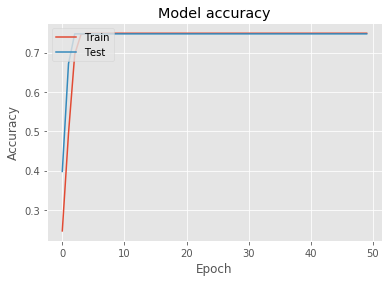

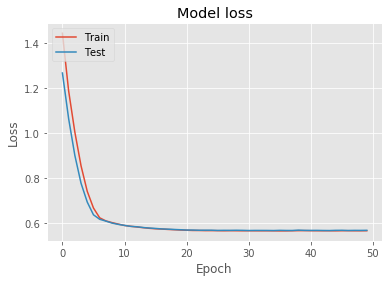

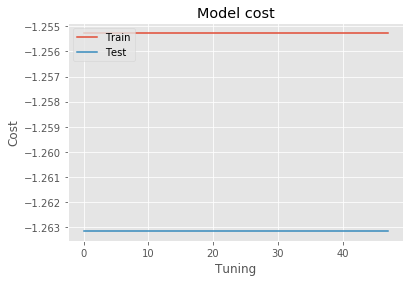

In [37]:
plt.plot(best_history.history['acc'])
plt.plot(best_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(best_history.history['loss'])
plt.plot(best_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
            
            # Plot training & validation loss values
plt.plot(cost)
plt.plot(val_cost)
plt.title('Model cost')
plt.ylabel('Cost')
plt.xlabel('Tuning')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [38]:
best_reg, best_iter, best_lr, best_val 

(0.1, 50, 0.01, -1.263157894736842)

In [39]:
from keras.layers import Dense, Dropout,Activation,BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l1_l2
cost=[]
val_cost=[]
num_iters = [50]#[500, 1000]
best_val = -100
regularization_strengths = [1e-2,1e-1,1e1]
learning_rates = [1e-2, 1e-3]
hidden_layers= [2, 4, 8, 16, 32,64]
dropout =  [0.0,0.5]
for hid in hidden_layers:
    for dr in dropout:
        for l_rate in learning_rates:
            for r in regularization_strengths:
                for iterations in num_iters:
                    input_dim= x_train.shape[1]
                    reg = l1_l2(l1=r, l2=r)
                    model = Sequential()
                    model.add(Dense(hid, input_dim=input_dim, init='uniform',
                        W_regularizer=reg,
                        bias_regularizer=reg
                    ))
                    
                    model.add(BatchNormalization())
                    model.add(Activation('relu'))
                    model.add(Dropout(dr))

                    model.add(Dense(1, activation='sigmoid', input_dim=(hid,),
                       W_regularizer=reg,
                        bias_regularizer=reg
                    ))
                    
                    opt= Adam(lr=l_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
                    model.compile(optimizer= opt, loss='binary_crossentropy',metrics=['accuracy'])
                    history=model.fit(x_train, y_train, nb_epoch=iterations,  batch_size=256,validation_data=(x_holdout, y_holdout))
                   
                    y_pred = model.predict(x_holdout).astype(int)
                    validation_cost= my_custom_loss_func(y_holdout,y_pred)
                    val_cost.append(validation_cost)
            
                    y_pred = model.predict(x_train).astype(int)
                    train_cost= my_custom_loss_func(y_train,y_pred)
                    cost.append(train_cost)
            
                    if validation_cost > best_val:
                        best_cost= cost
                        best_val_cost = val_cost
                        best_history=history
                        best_reg=r
                        best_iter=iterations
                        best_lr=l_rate
                        best_val = validation_cost 
                        best_model = model
                        best_hid=hid
                        best_dr=dr




C:\Users\ahuem\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, input_dim=20, bias_regularizer=<keras.reg..., kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
C:\Users\ahuem\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", input_dim=(2,), bias_regularizer=<keras.reg..., kernel_regularizer=<keras.reg...)`
C:\Users\ahuem\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1896 samples, validate on 475 samples
Epoch 1/50
1896/1896 [==============================] - 2s 933us/step - loss: 0.4622 - acc: 0.7178 - val_loss: 0.3813 - val_acc: 0.7474
Epoch 2/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.3633 - acc: 0.7859 - val_loss: 0.3786 - val_acc: 0.9516
Epoch 3/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.3602 - acc: 0.9562 - val_loss: 0.3662 - val_acc: 0.9474
Epoch 4/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.3358 - acc: 0.9541 - val_loss: 0.3332 - val_acc: 0.9411
Epoch 5/50
1896/1896 [==============================] - 0s 4us/step - loss: 0.3041 - acc: 0.9488 - val_loss: 0.3121 - val_acc: 0.9368
Epoch 6/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.2900 - acc: 0.9425 - val_loss: 0.3087 - val_acc: 0.9284
Epoch 7/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.2883 - acc: 0.9378 - val_loss: 0.3096 - val_acc: 0.9242
Epoch 8/50
18

Epoch 11/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.4946 - acc: 0.8238 - val_loss: 0.5082 - val_acc: 0.9242
Epoch 12/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.4990 - acc: 0.9320 - val_loss: 0.5125 - val_acc: 0.9053
Epoch 13/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.5024 - acc: 0.9288 - val_loss: 0.5163 - val_acc: 0.9053
Epoch 14/50
1896/1896 [==============================] - 0s 4us/step - loss: 0.5050 - acc: 0.9299 - val_loss: 0.5175 - val_acc: 0.8947
Epoch 15/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.5063 - acc: 0.8497 - val_loss: 0.5192 - val_acc: 0.7474
Epoch 16/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.5078 - acc: 0.8819 - val_loss: 0.5197 - val_acc: 0.8905
Epoch 17/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.5087 - acc: 0.8259 - val_loss: 0.5216 - val_acc: 0.8926
Epoch 18/50
1896/1896 [==============================] 

Epoch 21/50
1896/1896 [==============================] - 0s 5us/step - loss: 1.2733 - acc: 0.4483 - val_loss: 1.3619 - val_acc: 0.2526
Epoch 22/50
1896/1896 [==============================] - 0s 5us/step - loss: 1.3260 - acc: 0.2511 - val_loss: 1.2213 - val_acc: 0.2526
Epoch 23/50
1896/1896 [==============================] - 0s 6us/step - loss: 1.2052 - acc: 0.5970 - val_loss: 1.2054 - val_acc: 0.7474
Epoch 24/50
1896/1896 [==============================] - 0s 5us/step - loss: 1.1809 - acc: 0.5348 - val_loss: 1.1815 - val_acc: 0.2526
Epoch 25/50
1896/1896 [==============================] - 0s 5us/step - loss: 1.2094 - acc: 0.5506 - val_loss: 1.1343 - val_acc: 0.5137
Epoch 26/50
1896/1896 [==============================] - 0s 5us/step - loss: 1.1448 - acc: 0.3154 - val_loss: 1.1298 - val_acc: 0.7474
Epoch 27/50
1896/1896 [==============================] - 0s 5us/step - loss: 1.1640 - acc: 0.4757 - val_loss: 1.1710 - val_acc: 0.7474
Epoch 28/50
1896/1896 [==============================] 

1896/1896 [==============================] - 0s 5us/step - loss: 0.7202 - acc: 0.9241 - val_loss: 0.7223 - val_acc: 0.9137
Epoch 40/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.7190 - acc: 0.9235 - val_loss: 0.7212 - val_acc: 0.9137
Epoch 41/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.7178 - acc: 0.9235 - val_loss: 0.7200 - val_acc: 0.9137
Epoch 42/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.7166 - acc: 0.9235 - val_loss: 0.7189 - val_acc: 0.9137
Epoch 43/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.7156 - acc: 0.9241 - val_loss: 0.7178 - val_acc: 0.9137
Epoch 44/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.7145 - acc: 0.9246 - val_loss: 0.7167 - val_acc: 0.9137
Epoch 45/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.7133 - acc: 0.9251 - val_loss: 0.7157 - val_acc: 0.9137
Epoch 46/50
1896/1896 [==============================] - ETA: 0s - 

1896/1896 [==============================] - 0s 5us/step - loss: 0.6585 - acc: 0.9288 - val_loss: 0.6531 - val_acc: 0.8884
Epoch 8/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.6336 - acc: 0.8729 - val_loss: 0.6323 - val_acc: 0.8989
Epoch 9/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6137 - acc: 0.8919 - val_loss: 0.6156 - val_acc: 0.8863
Epoch 10/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.5976 - acc: 0.8914 - val_loss: 0.6011 - val_acc: 0.7474
Epoch 11/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.5860 - acc: 0.8660 - val_loss: 0.5912 - val_acc: 0.8905
Epoch 12/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.5769 - acc: 0.8729 - val_loss: 0.5846 - val_acc: 0.8884
Epoch 13/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.5713 - acc: 0.8787 - val_loss: 0.5805 - val_acc: 0.7474
Epoch 14/50
1896/1896 [==============================] - 0s 5us/step 

Epoch 17/50
1896/1896 [==============================] - 0s 5us/step - loss: 6.4539 - acc: 0.7489 - val_loss: 5.6823 - val_acc: 0.7474
Epoch 18/50
1896/1896 [==============================] - 0s 5us/step - loss: 5.1582 - acc: 0.7489 - val_loss: 4.4739 - val_acc: 0.7474
Epoch 19/50
1896/1896 [==============================] - 0s 5us/step - loss: 3.9808 - acc: 0.7489 - val_loss: 3.2510 - val_acc: 0.7474
Epoch 20/50
1896/1896 [==============================] - 0s 5us/step - loss: 3.0406 - acc: 0.7489 - val_loss: 2.9092 - val_acc: 0.7474
Epoch 21/50
1896/1896 [==============================] - 0s 5us/step - loss: 2.6016 - acc: 0.7489 - val_loss: 2.1617 - val_acc: 0.7474
Epoch 22/50
1896/1896 [==============================] - 0s 5us/step - loss: 1.9536 - acc: 0.7489 - val_loss: 1.6863 - val_acc: 0.7474
Epoch 23/50
1896/1896 [==============================] - 0s 6us/step - loss: 1.5283 - acc: 0.7489 - val_loss: 1.4501 - val_acc: 0.7474
Epoch 24/50
1896/1896 [==============================] 

1896/1896 [==============================] - 0s 5us/step - loss: 0.2879 - acc: 0.9451 - val_loss: 0.3077 - val_acc: 0.9368
Epoch 28/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.2879 - acc: 0.9451 - val_loss: 0.3076 - val_acc: 0.9347
Epoch 29/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.2880 - acc: 0.9451 - val_loss: 0.3079 - val_acc: 0.9347
Epoch 30/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.2880 - acc: 0.9451 - val_loss: 0.3077 - val_acc: 0.9347
Epoch 31/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.2881 - acc: 0.9451 - val_loss: 0.3080 - val_acc: 0.9347
Epoch 32/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.2882 - acc: 0.9451 - val_loss: 0.3080 - val_acc: 0.9347
Epoch 33/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.2885 - acc: 0.9451 - val_loss: 0.3084 - val_acc: 0.9347
Epoch 34/50
1896/1896 [==============================] - 0s 5us/ste

1896/1896 [==============================] - 0s 5us/step - loss: 19.3641 - acc: 0.7489 - val_loss: 19.2414 - val_acc: 0.7474
Epoch 47/50
1896/1896 [==============================] - 0s 5us/step - loss: 19.1540 - acc: 0.7489 - val_loss: 19.0321 - val_acc: 0.7474
Epoch 48/50
1896/1896 [==============================] - 0s 5us/step - loss: 18.9478 - acc: 0.7489 - val_loss: 18.8272 - val_acc: 0.7474
Epoch 49/50
1896/1896 [==============================] - 0s 6us/step - loss: 18.7398 - acc: 0.7489 - val_loss: 18.6154 - val_acc: 0.7474
Epoch 50/50
1896/1896 [==============================] - 0s 5us/step - loss: 18.5341 - acc: 0.7489 - val_loss: 18.4250 - val_acc: 0.7474
[[355   0]
 [120   0]]
[[1420    0]
 [ 476    0]]


C:\Users\ahuem\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, input_dim=20, bias_regularizer=<keras.reg..., kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
C:\Users\ahuem\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", input_dim=(4,), bias_regularizer=<keras.reg..., kernel_regularizer=<keras.reg...)`


Train on 1896 samples, validate on 475 samples
Epoch 1/50
1896/1896 [==============================] - 2s 1ms/step - loss: 0.4270 - acc: 0.8507 - val_loss: 0.3812 - val_acc: 0.9474
Epoch 2/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.3493 - acc: 0.9520 - val_loss: 0.3479 - val_acc: 0.9432
Epoch 3/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.3152 - acc: 0.9488 - val_loss: 0.3210 - val_acc: 0.9389
Epoch 4/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.2996 - acc: 0.9415 - val_loss: 0.3180 - val_acc: 0.9326
Epoch 5/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.2994 - acc: 0.9341 - val_loss: 0.3211 - val_acc: 0.9221
Epoch 6/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.3022 - acc: 0.9299 - val_loss: 0.3237 - val_acc: 0.9284
Epoch 7/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.3065 - acc: 0.9372 - val_loss: 0.3297 - val_acc: 0.9179
Epoch 8/50
1896

Epoch 11/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6012 - acc: 0.8803 - val_loss: 0.6113 - val_acc: 0.9411
Epoch 12/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.5982 - acc: 0.9146 - val_loss: 0.6085 - val_acc: 0.9432
Epoch 13/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.5971 - acc: 0.9024 - val_loss: 0.6049 - val_acc: 0.9432
Epoch 14/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.5933 - acc: 0.8956 - val_loss: 0.6044 - val_acc: 0.9389
Epoch 15/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.5916 - acc: 0.8666 - val_loss: 0.6029 - val_acc: 0.9389
Epoch 16/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.5930 - acc: 0.8840 - val_loss: 0.6036 - val_acc: 0.9368
Epoch 17/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.5924 - acc: 0.9109 - val_loss: 0.6025 - val_acc: 0.9326
Epoch 18/50
1896/1896 [==============================] 

Epoch 21/50
1896/1896 [==============================] - 0s 5us/step - loss: 1.8492 - acc: 0.5338 - val_loss: 1.6989 - val_acc: 0.2526
Epoch 22/50
1896/1896 [==============================] - 0s 6us/step - loss: 1.8017 - acc: 0.5770 - val_loss: 1.8695 - val_acc: 0.2526
Epoch 23/50
1896/1896 [==============================] - 0s 5us/step - loss: 1.7844 - acc: 0.5137 - val_loss: 1.9028 - val_acc: 0.2526
Epoch 24/50
1896/1896 [==============================] - 0s 6us/step - loss: 1.8079 - acc: 0.5090 - val_loss: 1.7236 - val_acc: 0.7474
Epoch 25/50
1896/1896 [==============================] - 0s 5us/step - loss: 1.7599 - acc: 0.5359 - val_loss: 1.9709 - val_acc: 0.7474
Epoch 26/50
1896/1896 [==============================] - 0s 5us/step - loss: 1.8384 - acc: 0.5559 - val_loss: 1.8290 - val_acc: 0.2526
Epoch 27/50
1896/1896 [==============================] - 0s 6us/step - loss: 1.8076 - acc: 0.4473 - val_loss: 1.8162 - val_acc: 0.7474
Epoch 28/50
1896/1896 [==============================] 

1896/1896 [==============================] - 0s 5us/step - loss: 0.3150 - acc: 0.9415 - val_loss: 0.3339 - val_acc: 0.9326
Epoch 32/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.3155 - acc: 0.9404 - val_loss: 0.3349 - val_acc: 0.9305
Epoch 33/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.3163 - acc: 0.9404 - val_loss: 0.3358 - val_acc: 0.9305
Epoch 34/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.3172 - acc: 0.9388 - val_loss: 0.3372 - val_acc: 0.9263
Epoch 35/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.3176 - acc: 0.9383 - val_loss: 0.3378 - val_acc: 0.9284
Epoch 36/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.3183 - acc: 0.9383 - val_loss: 0.3388 - val_acc: 0.9263
Epoch 37/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.3191 - acc: 0.9378 - val_loss: 0.3396 - val_acc: 0.9263
Epoch 38/50
1896/1896 [==============================] - 0s 5us/ste

1896/1896 [==============================] - 0s 6us/step - loss: 15.6323 - acc: 0.7489 - val_loss: 15.4710 - val_acc: 0.7474
Epoch 50/50
1896/1896 [==============================] - 0s 5us/step - loss: 15.3568 - acc: 0.7489 - val_loss: 15.1886 - val_acc: 0.7474
[[355   0]
 [120   0]]
[[1420    0]
 [ 476    0]]
Train on 1896 samples, validate on 475 samples
Epoch 1/50
1896/1896 [==============================] - 3s 1ms/step - loss: 0.7156 - acc: 0.7294 - val_loss: 0.6318 - val_acc: 0.8926
Epoch 2/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6052 - acc: 0.9246 - val_loss: 0.5687 - val_acc: 0.9305
Epoch 3/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.4948 - acc: 0.9467 - val_loss: 0.4075 - val_acc: 0.9368
Epoch 4/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.3650 - acc: 0.9499 - val_loss: 0.3486 - val_acc: 0.9368
Epoch 5/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.3269 - acc: 0.9525 - val_lo

1896/1896 [==============================] - 0s 6us/step - loss: 1.6818 - acc: 0.4641 - val_loss: 1.6998 - val_acc: 0.7474
Epoch 18/50
1896/1896 [==============================] - 0s 6us/step - loss: 1.6543 - acc: 0.4684 - val_loss: 1.6603 - val_acc: 0.7474
Epoch 19/50
1896/1896 [==============================] - 0s 6us/step - loss: 1.7152 - acc: 0.4525 - val_loss: 1.6542 - val_acc: 0.7474
Epoch 20/50
1896/1896 [==============================] - 0s 5us/step - loss: 1.6744 - acc: 0.5886 - val_loss: 1.6552 - val_acc: 0.2526
Epoch 21/50
1896/1896 [==============================] - 0s 6us/step - loss: 1.6732 - acc: 0.6472 - val_loss: 1.6681 - val_acc: 0.8421
Epoch 22/50
1896/1896 [==============================] - 0s 6us/step - loss: 1.6966 - acc: 0.5976 - val_loss: 1.6482 - val_acc: 0.2526
Epoch 23/50
1896/1896 [==============================] - 0s 6us/step - loss: 1.6610 - acc: 0.5464 - val_loss: 1.7273 - val_acc: 0.7474
Epoch 24/50
1896/1896 [==============================] - 0s 6us/ste

1896/1896 [==============================] - 0s 6us/step - loss: 0.8965 - acc: 0.9341 - val_loss: 0.9107 - val_acc: 0.9284
Epoch 37/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.8976 - acc: 0.9325 - val_loss: 0.9116 - val_acc: 0.9284
Epoch 38/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.8985 - acc: 0.9330 - val_loss: 0.9126 - val_acc: 0.9284
Epoch 39/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.8994 - acc: 0.9325 - val_loss: 0.9134 - val_acc: 0.9284
Epoch 40/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.9004 - acc: 0.9325 - val_loss: 0.9145 - val_acc: 0.9242
Epoch 41/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.9015 - acc: 0.9304 - val_loss: 0.9157 - val_acc: 0.9242
Epoch 42/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.9026 - acc: 0.9309 - val_loss: 0.9167 - val_acc: 0.9242
Epoch 43/50
1896/1896 [==============================] - ETA: 0s - 

C:\Users\ahuem\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=20, bias_regularizer=<keras.reg..., kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
C:\Users\ahuem\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", input_dim=(8,), bias_regularizer=<keras.reg..., kernel_regularizer=<keras.reg...)`


Train on 1896 samples, validate on 475 samples
Epoch 1/50
1896/1896 [==============================] - 3s 2ms/step - loss: 0.4715 - acc: 0.8481 - val_loss: 0.3431 - val_acc: 0.9453
Epoch 2/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.3020 - acc: 0.9467 - val_loss: 0.3098 - val_acc: 0.9411
Epoch 3/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.2840 - acc: 0.9488 - val_loss: 0.2962 - val_acc: 0.9432
Epoch 4/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.2772 - acc: 0.9515 - val_loss: 0.2948 - val_acc: 0.9411
Epoch 5/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.2767 - acc: 0.9499 - val_loss: 0.2938 - val_acc: 0.9411
Epoch 6/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.2745 - acc: 0.9504 - val_loss: 0.2885 - val_acc: 0.9432
Epoch 7/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.2733 - acc: 0.9509 - val_loss: 0.2871 - val_acc: 0.9411
Epoch 8/50
1896

Epoch 11/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6211 - acc: 0.9546 - val_loss: 0.6311 - val_acc: 0.9474
Epoch 12/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6202 - acc: 0.9546 - val_loss: 0.6355 - val_acc: 0.9474
Epoch 13/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6201 - acc: 0.9541 - val_loss: 0.6302 - val_acc: 0.9474
Epoch 14/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6175 - acc: 0.9546 - val_loss: 0.6303 - val_acc: 0.9474
Epoch 15/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6165 - acc: 0.9541 - val_loss: 0.6263 - val_acc: 0.9474
Epoch 16/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6131 - acc: 0.9536 - val_loss: 0.6239 - val_acc: 0.9474
Epoch 17/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6086 - acc: 0.9531 - val_loss: 0.6186 - val_acc: 0.9432
Epoch 18/50
1896/1896 [==============================] 

Epoch 21/50
1896/1896 [==============================] - 0s 6us/step - loss: 2.9608 - acc: 0.5454 - val_loss: 2.8693 - val_acc: 0.2526
Epoch 22/50
1896/1896 [==============================] - 0s 6us/step - loss: 2.9118 - acc: 0.5148 - val_loss: 2.8740 - val_acc: 0.2526
Epoch 23/50
1896/1896 [==============================] - ETA: 0s - loss: 2.8739 - acc: 0.273 - 0s 6us/step - loss: 2.9365 - acc: 0.6023 - val_loss: 2.9848 - val_acc: 0.2526
Epoch 24/50
1896/1896 [==============================] - 0s 7us/step - loss: 2.9855 - acc: 0.4694 - val_loss: 2.8803 - val_acc: 0.7474
Epoch 25/50
1896/1896 [==============================] - 0s 6us/step - loss: 2.9362 - acc: 0.4040 - val_loss: 2.8124 - val_acc: 0.7474
Epoch 26/50
1896/1896 [==============================] - 0s 7us/step - loss: 2.9707 - acc: 0.5622 - val_loss: 3.0785 - val_acc: 0.7474
Epoch 27/50
1896/1896 [==============================] - 0s 6us/step - loss: 3.0273 - acc: 0.3281 - val_loss: 2.9896 - val_acc: 0.7474
Epoch 28/50
1896/

1896/1896 [==============================] - 0s 6us/step - loss: 0.7619 - acc: 0.9488 - val_loss: 0.7766 - val_acc: 0.9411
Epoch 41/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.7635 - acc: 0.9488 - val_loss: 0.7778 - val_acc: 0.9411
Epoch 42/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.7647 - acc: 0.9499 - val_loss: 0.7787 - val_acc: 0.9411
Epoch 43/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.7659 - acc: 0.9499 - val_loss: 0.7804 - val_acc: 0.9411
Epoch 44/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.7677 - acc: 0.9504 - val_loss: 0.7824 - val_acc: 0.9411
Epoch 45/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.7697 - acc: 0.9509 - val_loss: 0.7841 - val_acc: 0.9411
Epoch 46/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.7718 - acc: 0.9515 - val_loss: 0.7862 - val_acc: 0.9411
Epoch 47/50
1896/1896 [==============================] - ETA: 0s - 

1896/1896 [==============================] - 0s 6us/step - loss: 0.7107 - acc: 0.9557 - val_loss: 0.7209 - val_acc: 0.9516
Epoch 9/50
1896/1896 [==============================] - 0s 5us/step - loss: 0.7048 - acc: 0.9552 - val_loss: 0.7083 - val_acc: 0.9453
Epoch 10/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6953 - acc: 0.9072 - val_loss: 0.7034 - val_acc: 0.7474
Epoch 11/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6923 - acc: 0.7489 - val_loss: 0.7010 - val_acc: 0.8926
Epoch 12/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6890 - acc: 0.9182 - val_loss: 0.6969 - val_acc: 0.9032
Epoch 13/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6879 - acc: 0.8687 - val_loss: 0.6981 - val_acc: 0.8968
Epoch 14/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6870 - acc: 0.8945 - val_loss: 0.6963 - val_acc: 0.7474
Epoch 15/50
1896/1896 [==============================] - 0s 6us/step

1896/1896 [==============================] - 0s 7us/step - loss: 0.3247 - acc: 0.9383 - val_loss: 0.3434 - val_acc: 0.9284
Epoch 27/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.3254 - acc: 0.9393 - val_loss: 0.3443 - val_acc: 0.9284
Epoch 28/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.3260 - acc: 0.9399 - val_loss: 0.3447 - val_acc: 0.9284
Epoch 29/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.3264 - acc: 0.9409 - val_loss: 0.3453 - val_acc: 0.9284
Epoch 30/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.3272 - acc: 0.9404 - val_loss: 0.3462 - val_acc: 0.9284
Epoch 31/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.3279 - acc: 0.9409 - val_loss: 0.3469 - val_acc: 0.9284
Epoch 32/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.3286 - acc: 0.9404 - val_loss: 0.3475 - val_acc: 0.9284
Epoch 33/50
1896/1896 [==============================] - 0s 7us/ste

Epoch 36/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6700 - acc: 0.9515 - val_loss: 0.6838 - val_acc: 0.9453
Epoch 37/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6729 - acc: 0.9515 - val_loss: 0.6865 - val_acc: 0.9453
Epoch 38/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6755 - acc: 0.9509 - val_loss: 0.6890 - val_acc: 0.9453
Epoch 39/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6782 - acc: 0.9509 - val_loss: 0.6918 - val_acc: 0.9432
Epoch 40/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6811 - acc: 0.9499 - val_loss: 0.6943 - val_acc: 0.9432
Epoch 41/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6838 - acc: 0.9499 - val_loss: 0.6975 - val_acc: 0.9432
Epoch 42/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6868 - acc: 0.9499 - val_loss: 0.7004 - val_acc: 0.9432
Epoch 43/50
1896/1896 [==============================] 

C:\Users\ahuem\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, input_dim=20, bias_regularizer=<keras.reg..., kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
C:\Users\ahuem\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", input_dim=(16,), bias_regularizer=<keras.reg..., kernel_regularizer=<keras.reg...)`


Train on 1896 samples, validate on 475 samples
Epoch 1/50
1896/1896 [==============================] - 4s 2ms/step - loss: 0.4757 - acc: 0.8824 - val_loss: 0.3412 - val_acc: 0.9326
Epoch 2/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.3109 - acc: 0.9420 - val_loss: 0.3250 - val_acc: 0.9368
Epoch 3/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.3002 - acc: 0.9478 - val_loss: 0.3157 - val_acc: 0.9368
Epoch 4/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.2958 - acc: 0.9499 - val_loss: 0.3127 - val_acc: 0.9389
Epoch 5/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.2929 - acc: 0.9488 - val_loss: 0.3067 - val_acc: 0.9389
Epoch 6/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.2888 - acc: 0.9483 - val_loss: 0.3018 - val_acc: 0.9389
Epoch 7/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.2850 - acc: 0.9488 - val_loss: 0.2973 - val_acc: 0.9411
Epoch 8/50
1896

1896/1896 [==============================] - 0s 6us/step - loss: 4.9898 - acc: 0.4430 - val_loss: 4.6761 - val_acc: 0.3411
Epoch 20/50
1896/1896 [==============================] - 0s 6us/step - loss: 5.0157 - acc: 0.5142 - val_loss: 5.3216 - val_acc: 0.2105
Epoch 21/50
1896/1896 [==============================] - 0s 6us/step - loss: 5.0186 - acc: 0.4910 - val_loss: 5.0520 - val_acc: 0.2947
Epoch 22/50
1896/1896 [==============================] - 0s 7us/step - loss: 5.0661 - acc: 0.5248 - val_loss: 5.2080 - val_acc: 0.6274
Epoch 23/50
1896/1896 [==============================] - 0s 6us/step - loss: 5.0954 - acc: 0.4357 - val_loss: 5.1876 - val_acc: 0.7474
Epoch 24/50
1896/1896 [==============================] - 0s 7us/step - loss: 5.0151 - acc: 0.5142 - val_loss: 4.6314 - val_acc: 0.2632
Epoch 25/50
1896/1896 [==============================] - 0s 6us/step - loss: 5.0160 - acc: 0.4968 - val_loss: 5.0930 - val_acc: 0.7474
Epoch 26/50
1896/1896 [==============================] - ETA: 0s - 

1896/1896 [==============================] - 0s 7us/step - loss: 0.7596 - acc: 0.9494 - val_loss: 0.7717 - val_acc: 0.9411
Epoch 39/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.7600 - acc: 0.9494 - val_loss: 0.7722 - val_acc: 0.9411
Epoch 40/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.7611 - acc: 0.9494 - val_loss: 0.7741 - val_acc: 0.9411
Epoch 41/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.7627 - acc: 0.9494 - val_loss: 0.7758 - val_acc: 0.9389
Epoch 42/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.7645 - acc: 0.9483 - val_loss: 0.7771 - val_acc: 0.9389
Epoch 43/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.7660 - acc: 0.9483 - val_loss: 0.7786 - val_acc: 0.9389
Epoch 44/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.7674 - acc: 0.9483 - val_loss: 0.7805 - val_acc: 0.9389
Epoch 45/50
1896/1896 [==============================] - 0s 6us/ste

Epoch 47/50
1896/1896 [==============================] - 0s 6us/step - loss: 11.7176 - acc: 0.7489 - val_loss: 11.4559 - val_acc: 0.7474
Epoch 48/50
1896/1896 [==============================] - 0s 6us/step - loss: 11.2689 - acc: 0.7489 - val_loss: 11.0029 - val_acc: 0.7474
Epoch 49/50
1896/1896 [==============================] - 0s 6us/step - loss: 10.8445 - acc: 0.7489 - val_loss: 10.5900 - val_acc: 0.7474
Epoch 50/50
1896/1896 [==============================] - 0s 7us/step - loss: 10.4148 - acc: 0.7489 - val_loss: 10.1747 - val_acc: 0.7474
[[355   0]
 [120   0]]
[[1420    0]
 [ 476    0]]
Train on 1896 samples, validate on 475 samples
Epoch 1/50
1896/1896 [==============================] - 4s 2ms/step - loss: 0.4709 - acc: 0.8502 - val_loss: 0.3701 - val_acc: 0.9368
Epoch 2/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.3432 - acc: 0.9499 - val_loss: 0.3559 - val_acc: 0.9453
Epoch 3/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.3338 - ac

Epoch 6/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.8006 - acc: 0.9520 - val_loss: 0.7837 - val_acc: 0.9453
Epoch 7/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.7665 - acc: 0.9557 - val_loss: 0.7636 - val_acc: 0.9516
Epoch 8/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.7364 - acc: 0.9568 - val_loss: 0.7277 - val_acc: 0.9516
Epoch 9/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.7032 - acc: 0.9557 - val_loss: 0.7039 - val_acc: 0.9516
Epoch 10/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.6814 - acc: 0.9552 - val_loss: 0.6806 - val_acc: 0.9453
Epoch 11/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6610 - acc: 0.9488 - val_loss: 0.6645 - val_acc: 0.9305
Epoch 12/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.6471 - acc: 0.9351 - val_loss: 0.6493 - val_acc: 0.9221
Epoch 13/50
1896/1896 [==============================] - 0s

Epoch 16/50
1896/1896 [==============================] - 0s 8us/step - loss: 5.1617 - acc: 0.4631 - val_loss: 5.0237 - val_acc: 0.8442
Epoch 17/50
1896/1896 [==============================] - 0s 8us/step - loss: 5.1194 - acc: 0.5517 - val_loss: 5.2307 - val_acc: 0.7474
Epoch 18/50
1896/1896 [==============================] - 0s 8us/step - loss: 5.2030 - acc: 0.5844 - val_loss: 4.9599 - val_acc: 0.2526
Epoch 19/50
1896/1896 [==============================] - 0s 8us/step - loss: 5.1735 - acc: 0.5749 - val_loss: 5.0728 - val_acc: 0.2526
Epoch 20/50
1896/1896 [==============================] - 0s 8us/step - loss: 5.1370 - acc: 0.4525 - val_loss: 5.4913 - val_acc: 0.3474
Epoch 21/50
1896/1896 [==============================] - 0s 8us/step - loss: 5.2201 - acc: 0.4568 - val_loss: 5.1273 - val_acc: 0.2505
Epoch 22/50
1896/1896 [==============================] - 0s 8us/step - loss: 5.2420 - acc: 0.6340 - val_loss: 5.0591 - val_acc: 0.2526
Epoch 23/50
1896/1896 [==============================] 

1896/1896 [==============================] - 0s 7us/step - loss: 0.3336 - acc: 0.9409 - val_loss: 0.3555 - val_acc: 0.9284
Epoch 27/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.3340 - acc: 0.9409 - val_loss: 0.3558 - val_acc: 0.9284
Epoch 28/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.3344 - acc: 0.9415 - val_loss: 0.3557 - val_acc: 0.9284
Epoch 29/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.3342 - acc: 0.9420 - val_loss: 0.3550 - val_acc: 0.9284
Epoch 30/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.3333 - acc: 0.9425 - val_loss: 0.3535 - val_acc: 0.9305
Epoch 31/50
1896/1896 [==============================] - 0s 6us/step - loss: 0.3320 - acc: 0.9436 - val_loss: 0.3521 - val_acc: 0.9326
Epoch 32/50
1896/1896 [==============================] - 0s 7us/step - loss: 0.3311 - acc: 0.9436 - val_loss: 0.3508 - val_acc: 0.9368
Epoch 33/50
1896/1896 [==============================] - 0s 6us/ste

1896/1896 [==============================] - 0s 6us/step - loss: 11.3910 - acc: 0.7489 - val_loss: 11.0345 - val_acc: 0.7474
Epoch 45/50
1896/1896 [==============================] - 0s 7us/step - loss: 10.8509 - acc: 0.7489 - val_loss: 10.5671 - val_acc: 0.7474
Epoch 46/50
1896/1896 [==============================] - 0s 7us/step - loss: 10.3515 - acc: 0.7489 - val_loss: 10.0441 - val_acc: 0.7474
Epoch 47/50
1896/1896 [==============================] - 0s 6us/step - loss: 9.8654 - acc: 0.7489 - val_loss: 9.5658 - val_acc: 0.7474
Epoch 48/50
1896/1896 [==============================] - 0s 6us/step - loss: 9.3838 - acc: 0.7489 - val_loss: 9.1143 - val_acc: 0.7474
Epoch 49/50
1896/1896 [==============================] - 0s 7us/step - loss: 8.9028 - acc: 0.7489 - val_loss: 8.6432 - val_acc: 0.7474
Epoch 50/50
1896/1896 [==============================] - 0s 6us/step - loss: 8.4635 - acc: 0.7489 - val_loss: 8.2285 - val_acc: 0.7474
[[355   0]
 [120   0]]
[[1420    0]
 [ 476    0]]


C:\Users\ahuem\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, input_dim=20, bias_regularizer=<keras.reg..., kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
C:\Users\ahuem\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", input_dim=(32,), bias_regularizer=<keras.reg..., kernel_regularizer=<keras.reg...)`


Train on 1896 samples, validate on 475 samples
Epoch 1/50
1896/1896 [==============================] - 5s 2ms/step - loss: 0.6481 - acc: 0.8085 - val_loss: 0.4427 - val_acc: 0.9347
Epoch 2/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.4001 - acc: 0.9335 - val_loss: 0.4000 - val_acc: 0.9326
Epoch 3/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.3758 - acc: 0.9409 - val_loss: 0.3820 - val_acc: 0.9305
Epoch 4/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.3620 - acc: 0.9383 - val_loss: 0.3625 - val_acc: 0.9411
Epoch 5/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.3424 - acc: 0.9467 - val_loss: 0.3435 - val_acc: 0.9411
Epoch 6/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.3264 - acc: 0.9520 - val_loss: 0.3320 - val_acc: 0.9432
Epoch 7/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.3163 - acc: 0.9499 - val_loss: 0.3243 - val_acc: 0.9453
Epoch 8/5

Epoch 10/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.6910 - acc: 0.8412 - val_loss: 0.6982 - val_acc: 0.8905
Epoch 11/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.6849 - acc: 0.8718 - val_loss: 0.6858 - val_acc: 0.7474
Epoch 12/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.6709 - acc: 0.8560 - val_loss: 0.6742 - val_acc: 0.8674
Epoch 13/50
1896/1896 [==============================] - 0s 10us/step - loss: 0.6561 - acc: 0.8623 - val_loss: 0.6592 - val_acc: 0.9011
Epoch 14/50
1896/1896 [==============================] - 0s 10us/step - loss: 0.6339 - acc: 0.8782 - val_loss: 0.6338 - val_acc: 0.9116
Epoch 15/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.6146 - acc: 0.8803 - val_loss: 0.6195 - val_acc: 0.8884
Epoch 16/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.6053 - acc: 0.9061 - val_loss: 0.6074 - val_acc: 0.9053
Epoch 17/50
1896/1896 [=========================

Epoch 27/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.2914 - acc: 0.9488 - val_loss: 0.3059 - val_acc: 0.9432
Epoch 28/50
1896/1896 [==============================] - ETA: 0s - loss: 0.2646 - acc: 0.964 - 0s 11us/step - loss: 0.2910 - acc: 0.9494 - val_loss: 0.3053 - val_acc: 0.9432
Epoch 29/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.2912 - acc: 0.9504 - val_loss: 0.3046 - val_acc: 0.9432
Epoch 30/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.2898 - acc: 0.9509 - val_loss: 0.3035 - val_acc: 0.9432
Epoch 31/50
1896/1896 [==============================] - 0s 10us/step - loss: 0.2896 - acc: 0.9509 - val_loss: 0.3029 - val_acc: 0.9432
Epoch 32/50
1896/1896 [==============================] - 0s 10us/step - loss: 0.2888 - acc: 0.9504 - val_loss: 0.3023 - val_acc: 0.9432
Epoch 33/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.2885 - acc: 0.9515 - val_loss: 0.3021 - val_acc: 0.9453
Epoch 34/5

1896/1896 [==============================] - 0s 13us/step - loss: 0.8073 - acc: 0.9541 - val_loss: 0.8174 - val_acc: 0.9453
Epoch 37/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.8030 - acc: 0.9546 - val_loss: 0.8135 - val_acc: 0.9453
Epoch 38/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.7994 - acc: 0.9546 - val_loss: 0.8099 - val_acc: 0.9474
Epoch 39/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.7959 - acc: 0.9546 - val_loss: 0.8051 - val_acc: 0.9474
Epoch 40/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.7915 - acc: 0.9546 - val_loss: 0.8017 - val_acc: 0.9474
Epoch 41/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.7880 - acc: 0.9546 - val_loss: 0.7981 - val_acc: 0.9474
Epoch 42/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.7849 - acc: 0.9546 - val_loss: 0.7947 - val_acc: 0.9474
Epoch 43/50
1896/1896 [==============================] - 0s 

Epoch 45/50
1896/1896 [==============================] - 0s 11us/step - loss: 4.3843 - acc: 0.7489 - val_loss: 4.2071 - val_acc: 0.7474
Epoch 46/50
1896/1896 [==============================] - 0s 12us/step - loss: 4.0493 - acc: 0.7489 - val_loss: 3.8633 - val_acc: 0.7474
Epoch 47/50
1896/1896 [==============================] - 0s 13us/step - loss: 3.7299 - acc: 0.7489 - val_loss: 3.5623 - val_acc: 0.7474
Epoch 48/50
1896/1896 [==============================] - 0s 13us/step - loss: 3.4387 - acc: 0.7489 - val_loss: 3.2813 - val_acc: 0.7474
Epoch 49/50
1896/1896 [==============================] - 0s 12us/step - loss: 3.1429 - acc: 0.6530 - val_loss: 2.9728 - val_acc: 0.2526
Epoch 50/50
1896/1896 [==============================] - 0s 12us/step - loss: 2.9216 - acc: 0.3866 - val_loss: 2.8274 - val_acc: 0.2526
[[355   0]
 [120   0]]
[[1420    0]
 [ 476    0]]
Train on 1896 samples, validate on 475 samples
Epoch 1/50
1896/1896 [==============================] - 5s 3ms/step - loss: 0.5818 - ac

Epoch 4/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.8730 - acc: 0.9557 - val_loss: 0.8284 - val_acc: 0.9516
Epoch 5/50
1896/1896 [==============================] - 0s 13us/step - loss: 0.7901 - acc: 0.9531 - val_loss: 0.7858 - val_acc: 0.9453
Epoch 6/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.7505 - acc: 0.9446 - val_loss: 0.7405 - val_acc: 0.9284
Epoch 7/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.7197 - acc: 0.9035 - val_loss: 0.7194 - val_acc: 0.9221
Epoch 8/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.6982 - acc: 0.9299 - val_loss: 0.7047 - val_acc: 0.9011
Epoch 9/50
1896/1896 [==============================] - 0s 15us/step - loss: 0.6858 - acc: 0.8550 - val_loss: 0.6880 - val_acc: 0.7474
Epoch 10/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.6766 - acc: 0.8660 - val_loss: 0.6899 - val_acc: 0.7474
Epoch 11/50
1896/1896 [==============================]

1896/1896 [==============================] - 0s 11us/step - loss: 0.3129 - acc: 0.9441 - val_loss: 0.3268 - val_acc: 0.9368
Epoch 23/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.3102 - acc: 0.9467 - val_loss: 0.3249 - val_acc: 0.9389
Epoch 24/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.3084 - acc: 0.9451 - val_loss: 0.3236 - val_acc: 0.9389
Epoch 25/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.3077 - acc: 0.9436 - val_loss: 0.3226 - val_acc: 0.9347
Epoch 26/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.3065 - acc: 0.9483 - val_loss: 0.3213 - val_acc: 0.9389
Epoch 27/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.3052 - acc: 0.9467 - val_loss: 0.3208 - val_acc: 0.9368
Epoch 28/50
1896/1896 [==============================] - 0s 11us/step - loss: 0.3049 - acc: 0.9451 - val_loss: 0.3195 - val_acc: 0.9368
Epoch 29/50
1896/1896 [==============================] - 0s 

Epoch 32/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.7707 - acc: 0.9536 - val_loss: 0.7804 - val_acc: 0.9432
Epoch 33/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.7694 - acc: 0.9536 - val_loss: 0.7799 - val_acc: 0.9432
Epoch 34/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.7689 - acc: 0.9531 - val_loss: 0.7793 - val_acc: 0.9432
Epoch 35/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.7684 - acc: 0.9536 - val_loss: 0.7788 - val_acc: 0.9432
Epoch 36/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.7674 - acc: 0.9536 - val_loss: 0.7782 - val_acc: 0.9432
Epoch 37/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.7671 - acc: 0.9531 - val_loss: 0.7777 - val_acc: 0.9432
Epoch 38/50
1896/1896 [==============================] - 0s 12us/step - loss: 0.7669 - acc: 0.9531 - val_loss: 0.7775 - val_acc: 0.9432
Epoch 39/50
1896/1896 [=========================

Epoch 41/50
1896/1896 [==============================] - 0s 12us/step - loss: 10.3651 - acc: 0.7489 - val_loss: 9.9061 - val_acc: 0.7474
Epoch 42/50
1896/1896 [==============================] - 0s 12us/step - loss: 9.6387 - acc: 0.7489 - val_loss: 9.1353 - val_acc: 0.7474
Epoch 43/50
1896/1896 [==============================] - 0s 12us/step - loss: 8.8542 - acc: 0.7489 - val_loss: 8.4547 - val_acc: 0.7474
Epoch 44/50
1896/1896 [==============================] - 0s 12us/step - loss: 8.1430 - acc: 0.7489 - val_loss: 7.6705 - val_acc: 0.7474
Epoch 45/50
1896/1896 [==============================] - 0s 12us/step - loss: 7.4217 - acc: 0.7489 - val_loss: 7.0171 - val_acc: 0.7474
Epoch 46/50
1896/1896 [==============================] - 0s 12us/step - loss: 6.7324 - acc: 0.7489 - val_loss: 6.3867 - val_acc: 0.7474
Epoch 47/50
1896/1896 [==============================] - 0s 12us/step - loss: 6.1601 - acc: 0.7489 - val_loss: 5.8104 - val_acc: 0.7474
Epoch 48/50
1896/1896 [========================

C:\Users\ahuem\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=20, bias_regularizer=<keras.reg..., kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
C:\Users\ahuem\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", input_dim=(64,), bias_regularizer=<keras.reg..., kernel_regularizer=<keras.reg...)`


Train on 1896 samples, validate on 475 samples
Epoch 1/50
1896/1896 [==============================] - 5s 3ms/step - loss: 0.6929 - acc: 0.7832 - val_loss: 0.4884 - val_acc: 0.9368
Epoch 2/50
1896/1896 [==============================] - 0s 17us/step - loss: 0.4495 - acc: 0.9409 - val_loss: 0.4436 - val_acc: 0.9432
Epoch 3/50
1896/1896 [==============================] - 0s 15us/step - loss: 0.4090 - acc: 0.9436 - val_loss: 0.4085 - val_acc: 0.9347
Epoch 4/50
1896/1896 [==============================] - 0s 16us/step - loss: 0.3846 - acc: 0.9473 - val_loss: 0.3818 - val_acc: 0.9389
Epoch 5/50
1896/1896 [==============================] - 0s 15us/step - loss: 0.3614 - acc: 0.9488 - val_loss: 0.3609 - val_acc: 0.9453
Epoch 6/50
1896/1896 [==============================] - 0s 15us/step - loss: 0.3456 - acc: 0.9525 - val_loss: 0.3513 - val_acc: 0.9495
Epoch 7/50
1896/1896 [==============================] - 0s 15us/step - loss: 0.3285 - acc: 0.9536 - val_loss: 0.3294 - val_acc: 0.9495
Epoch 8/5

1896/1896 [==============================] - 0s 14us/step - loss: 0.7361 - acc: 0.8708 - val_loss: 0.7411 - val_acc: 0.7474
Epoch 11/50
1896/1896 [==============================] - 0s 15us/step - loss: 0.7222 - acc: 0.8803 - val_loss: 0.7221 - val_acc: 0.8989
Epoch 12/50
1896/1896 [==============================] - 0s 15us/step - loss: 0.7087 - acc: 0.8755 - val_loss: 0.7075 - val_acc: 0.8989
Epoch 13/50
1896/1896 [==============================] - 0s 15us/step - loss: 0.6889 - acc: 0.9061 - val_loss: 0.7010 - val_acc: 0.8863
Epoch 14/50
1896/1896 [==============================] - 0s 14us/step - loss: 0.6853 - acc: 0.8687 - val_loss: 0.6948 - val_acc: 0.9011
Epoch 15/50
1896/1896 [==============================] - 0s 15us/step - loss: 0.6785 - acc: 0.9188 - val_loss: 0.6886 - val_acc: 0.8674
Epoch 16/50
1896/1896 [==============================] - 0s 15us/step - loss: 0.6761 - acc: 0.8333 - val_loss: 0.6868 - val_acc: 0.9326
Epoch 17/50
1896/1896 [==============================] - 0s 

1896/1896 [==============================] - 0s 14us/step - loss: 0.3177 - acc: 0.9525 - val_loss: 0.3275 - val_acc: 0.9432
Epoch 29/50
1896/1896 [==============================] - 0s 13us/step - loss: 0.3162 - acc: 0.9525 - val_loss: 0.3266 - val_acc: 0.9411
Epoch 30/50
1896/1896 [==============================] - 0s 14us/step - loss: 0.3153 - acc: 0.9509 - val_loss: 0.3253 - val_acc: 0.9432
Epoch 31/50
1896/1896 [==============================] - 0s 13us/step - loss: 0.3141 - acc: 0.9515 - val_loss: 0.3243 - val_acc: 0.9411
Epoch 32/50
1896/1896 [==============================] - 0s 13us/step - loss: 0.3136 - acc: 0.9515 - val_loss: 0.3237 - val_acc: 0.9411
Epoch 33/50
1896/1896 [==============================] - 0s 13us/step - loss: 0.3128 - acc: 0.9499 - val_loss: 0.3229 - val_acc: 0.9453
Epoch 34/50
1896/1896 [==============================] - 0s 14us/step - loss: 0.3119 - acc: 0.9515 - val_loss: 0.3211 - val_acc: 0.9432
Epoch 35/50
1896/1896 [==============================] - 0s 

Epoch 46/50
1896/1896 [==============================] - 0s 14us/step - loss: 2.3447 - acc: 0.5232 - val_loss: 2.3730 - val_acc: 0.7474
Epoch 47/50
1896/1896 [==============================] - 0s 14us/step - loss: 2.3717 - acc: 0.5475 - val_loss: 2.3647 - val_acc: 0.7474
Epoch 48/50
1896/1896 [==============================] - 0s 14us/step - loss: 2.3793 - acc: 0.5306 - val_loss: 2.3554 - val_acc: 0.2526
Epoch 49/50
1896/1896 [==============================] - 0s 14us/step - loss: 2.3487 - acc: 0.5823 - val_loss: 2.3560 - val_acc: 0.2526
Epoch 50/50
1896/1896 [==============================] - 0s 14us/step - loss: 2.3344 - acc: 0.4873 - val_loss: 2.3571 - val_acc: 0.7474
[[355   0]
 [120   0]]
[[1420    0]
 [ 476    0]]
Train on 1896 samples, validate on 475 samples
Epoch 1/50
1896/1896 [==============================] - 6s 3ms/step - loss: 0.6192 - acc: 0.8444 - val_loss: 0.4607 - val_acc: 0.9474
Epoch 2/50
1896/1896 [==============================] - 0s 16us/step - loss: 0.4099 - acc

1896/1896 [==============================] - 0s 15us/step - loss: 20.2395 - acc: 0.3080 - val_loss: 21.1040 - val_acc: 0.7474
Epoch 14/50
1896/1896 [==============================] - 0s 15us/step - loss: 20.1429 - acc: 0.5306 - val_loss: 21.1018 - val_acc: 0.2526
Epoch 15/50
1896/1896 [==============================] - 0s 15us/step - loss: 20.1563 - acc: 0.3782 - val_loss: 20.3591 - val_acc: 0.7095
Epoch 16/50
1896/1896 [==============================] - 0s 15us/step - loss: 19.9759 - acc: 0.6076 - val_loss: 19.1382 - val_acc: 0.6105
Epoch 17/50
1896/1896 [==============================] - 0s 15us/step - loss: 19.9540 - acc: 0.5116 - val_loss: 18.7725 - val_acc: 0.7474
Epoch 18/50
1896/1896 [==============================] - 0s 15us/step - loss: 19.8215 - acc: 0.5686 - val_loss: 18.9459 - val_acc: 0.7474
Epoch 19/50
1896/1896 [==============================] - 0s 15us/step - loss: 20.0457 - acc: 0.6282 - val_loss: 19.6570 - val_acc: 0.2526
Epoch 20/50
1896/1896 [=======================

Epoch 32/50
1896/1896 [==============================] - 0s 15us/step - loss: 0.7566 - acc: 0.9525 - val_loss: 0.7686 - val_acc: 0.9453
Epoch 33/50
1896/1896 [==============================] - 0s 15us/step - loss: 0.7575 - acc: 0.9509 - val_loss: 0.7692 - val_acc: 0.9432
Epoch 34/50
1896/1896 [==============================] - 0s 15us/step - loss: 0.7582 - acc: 0.9499 - val_loss: 0.7707 - val_acc: 0.9389
Epoch 35/50
1896/1896 [==============================] - 0s 15us/step - loss: 0.7596 - acc: 0.9494 - val_loss: 0.7716 - val_acc: 0.9389
Epoch 36/50
1896/1896 [==============================] - 0s 16us/step - loss: 0.7605 - acc: 0.9473 - val_loss: 0.7725 - val_acc: 0.9347
Epoch 37/50
1896/1896 [==============================] - 0s 15us/step - loss: 0.7604 - acc: 0.9404 - val_loss: 0.7704 - val_acc: 0.9326
Epoch 38/50
1896/1896 [==============================] - 0s 15us/step - loss: 0.7597 - acc: 0.9362 - val_loss: 0.7706 - val_acc: 0.9305
Epoch 39/50
1896/1896 [=========================

Epoch 41/50
1896/1896 [==============================] - 0s 15us/step - loss: 2.6986 - acc: 0.7489 - val_loss: 2.5437 - val_acc: 0.7474
Epoch 42/50
1896/1896 [==============================] - 0s 16us/step - loss: 2.5305 - acc: 0.4768 - val_loss: 2.4792 - val_acc: 0.2526
Epoch 43/50
1896/1896 [==============================] - 0s 16us/step - loss: 2.4524 - acc: 0.2511 - val_loss: 2.4267 - val_acc: 0.2526
Epoch 44/50
1896/1896 [==============================] - 0s 15us/step - loss: 2.4200 - acc: 0.5438 - val_loss: 2.4839 - val_acc: 0.7474
Epoch 45/50
1896/1896 [==============================] - 0s 16us/step - loss: 2.4300 - acc: 0.7236 - val_loss: 2.4300 - val_acc: 0.2526
Epoch 46/50
1896/1896 [==============================] - 0s 15us/step - loss: 2.3810 - acc: 0.2869 - val_loss: 2.3733 - val_acc: 0.7474
Epoch 47/50
1896/1896 [==============================] - 0s 15us/step - loss: 2.3564 - acc: 0.7489 - val_loss: 2.3775 - val_acc: 0.2526
Epoch 48/50
1896/1896 [=========================

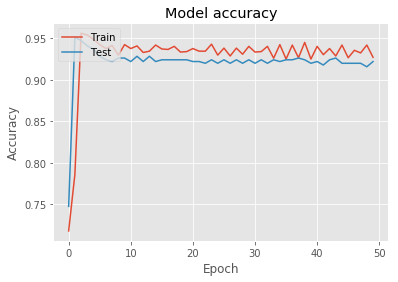

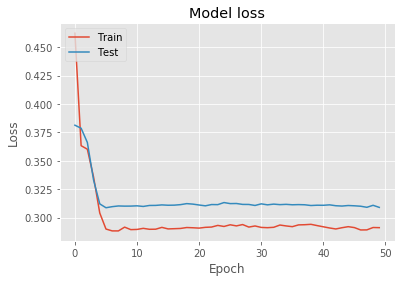

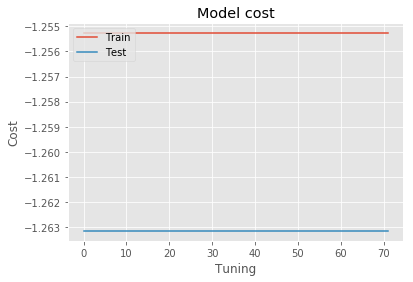

In [40]:
plt.plot(best_history.history['acc'])
plt.plot(best_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(best_history.history['loss'])
plt.plot(best_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
            
            # Plot training & validation loss values
plt.plot(cost)
plt.plot(val_cost)
plt.title('Model cost')
plt.ylabel('Cost')
plt.xlabel('Tuning')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [41]:
y_pred = model.predict(x_holdout).astype(int)
my_custom_loss_func(y_holdout,y_pred)

[[355   0]
 [120   0]]


-1.263157894736842